<a href="https://colab.research.google.com/github/annasli378/analizaAK/blob/main/wyznaczenie_statystyk_dla_cech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importy


In [60]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro, f_oneway, tukey_hsd, levene
import matplotlib.pyplot as plt

Funckje

In [61]:
# Funkcja sprawdzająca normalność rozkładu danych za pomocą testu Shapiro-Wilka
def normality(Group1, Group2, Group3):
    print('Shapiro-Wilk Test p-values:')
    print(shapiro(Group1))
    print(shapiro(Group2))
    print(shapiro(Group3))
    return [shapiro(Group1).pvalue , shapiro(Group2).pvalue, shapiro(Group3).pvalue]

In [62]:
# Funkcja sprawdzająca równość wariancji za pomocą testu Levene'a
def varin(Group1, Group2, Group3):
  return levene(Group1, Group2, Group3, center='median')

In [63]:
# Funkcja przeprowadzająca analizę wariancji (ANOVA) i wyświetlająca wyniki
def get_anova(Group1, Group2, Group3):
  alpha_anova =0.05
  #data = [Group1, Group2, Group3]
  f_val, p_val = f_oneway(Group1, Group2, Group3)
  if p_val < alpha_anova:
        print(f'One-Way ANOVA: There is a significant difference between groups (p = {round(p_val, 4)}).')
  else:
        print(f'One-Way ANOVA: No significant difference between groups (p = {round(p_val, 4)}).')
  return p_val



In [64]:
# Funkcja przeprowadzająca test Tukeya HSD i wyświetlająca wyniki
def get_tukey(Group1, Group2, Group3):
  tukey = tukey_hsd(Group1, Group2, Group3)
  print(tukey)

  return tukey.pvalue

Wczytanie i podział danych

In [65]:
# Wczytanie danych z plików CSV
CECHY = pd.read_csv('/content/drive/MyDrive/USG/analiza_AK/cechy/CECHY_RAZEM.csv')
CECHY_nowe  = pd.read_csv('/content/drive/MyDrive/USG/analiza_AK/cechy/CECHY_RAZEM.csv')

column_names = list(CECHY.columns)
CECHY = CECHY.values
Y = pd.read_csv('/content/drive/MyDrive/USG/analiza_AK/cechy/names_Y.csv', header = None).values
Y = Y[:,1]
# Określenie wymiarów macierzy danych
w,k = CECHY.shape

# Inicjalizacja pustych list dla grup
ak1, ak2, ak3 = np.zeros((95,k)), np.zeros((48,k)), np.zeros((32,k))
c1, c2, c3 = 0, 0 ,0

# Podział danych na trzy grupy na podstawie Y
for wiersz in range(0,175):
    if Y[wiersz] == 1:
        ak1[c1, :] = CECHY[wiersz, :]
        c1+=1
    elif Y[wiersz] == 2:
        ak2[c2, :] = CECHY[wiersz, :]
        c2+=1
    elif Y[wiersz] == 3:
        ak3[c3, :] = CECHY[wiersz, :]
        c3+=1

print(column_names)

['perimeter to area epi', 'max depth epi', ' median depth epi', 'mean depth epi', 'std depth epi', 'var depth epi', 'q1 depth epi', 'g3 depth epi', 'diff depth epi', 'LEP num1 epi', 'MEP num1 epi', 'HEP num1 epi', 'LEP num2 epi', 'MEP num2 epi', 'HEP num2 epi', 'LEP num3 epi', 'MEP num3 epi', 'HEP num3 epi', 'entropy 1 epi', 'mean 1 epi', 'median 1 epi', 'var 1 epi', 'std 1 epi', 'q1 1 epi', 'q3 1 epi', 'skewness 1 epi', 'kurtosis 1 epi', 'entropy 2 epi', 'mean 2 epi', 'median 2 epi', 'var 2 epi', 'std 2 epi', 'q1 2 epi', 'q3 2 epi', 'skewness 2 epi', 'kurtosis 2 epi', 'entropy 3 epi', 'mean 3 epi', 'median 3 epi', 'var 3 epi', 'std 3 epi', 'q1 3 epi', 'q3 3 epi', 'skewness 3 epi', 'kurtosis 3 epi', '2glcm1 contrast epi', '2glcm2 contrast epi', '2glcm3 contrast epi', '2glcm4 contrast epi', '2glcm1 corr epi', '2glcm2 corr epi', '2glcm3 corr epi', '2glcm4 corr epi', '2glcm1 ener epi', '2glcm2 ener epi', '2glcm3 ener epi', '2glcm4 ener epi', '2glcm1 homog epi', '2glcm2 homog epi', '2glcm3

analiza

In [66]:
path_to_save_results = '/content/drive/MyDrive/USG/analiza_AK/statystyka_wyniki/'

# Inicjalizacja tablic na wyniki
wyniki_nom = np.zeros((k,5))
wyniki_nom2 = np.zeros((k,5))
roznice_grupy = np.zeros((k,3))
cnt=0

results_df = pd.DataFrame(columns=['variable_name', 'norm1', 'norm2', 'norm3', 'vargrup', 'anova_p', 'tuk12', 'tuk13', 'tuk23'])
data_tmp=[]

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.979596734046936, pvalue=0.14476998150348663)
ShapiroResult(statistic=0.9615380167961121, pvalue=0.11649612337350845)
ShapiroResult(statistic=0.9738457202911377, pvalue=0.6115209460258484)
One-Way ANOVA: There is a significant difference between groups (p = 0.0011).


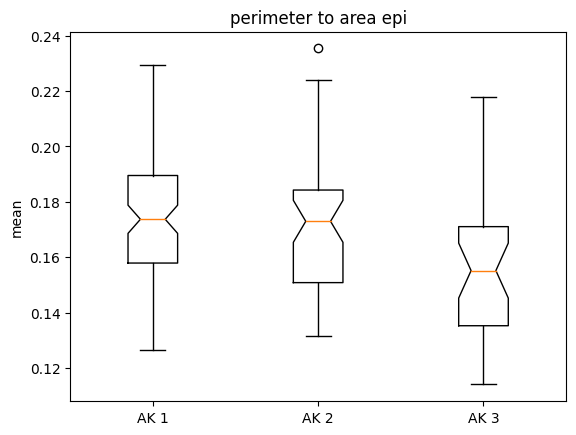

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.005     0.496    -0.005     0.015
 (0 - 2)      0.019     0.001     0.007     0.031
 (1 - 0)     -0.005     0.496    -0.015     0.005
 (1 - 2)      0.014     0.037     0.001     0.027
 (2 - 0)     -0.019     0.001    -0.031    -0.007
 (2 - 1)     -0.014     0.037    -0.027    -0.001

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.8345625996589661, pvalue=6.3930873928086385e-09)
ShapiroResult(statistic=0.8278509378433228, pvalue=5.902966677240329e-06)
ShapiroResult(statistic=0.8850116729736328, pvalue=0.0026282966136932373)
One-Way ANOVA: There is a significant difference between groups (p = 0.0477).


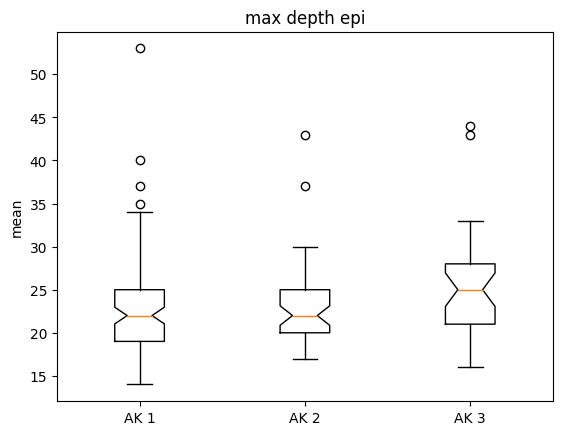

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.253     0.965    -2.596     2.090
 (0 - 2)     -2.795     0.041    -5.499    -0.090
 (1 - 0)      0.253     0.965    -2.090     2.596
 (1 - 2)     -2.542     0.118    -5.561     0.478
 (2 - 0)      2.795     0.041     0.090     5.499
 (2 - 1)      2.542     0.118    -0.478     5.561

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9278191328048706, pvalue=5.8074041589861736e-05)
ShapiroResult(statistic=0.9563890695571899, pvalue=0.07214747369289398)
ShapiroResult(statistic=0.9579230546951294, pvalue=0.24077174067497253)
One-Way ANOVA: There is a significant difference between groups (p = 0.0001).


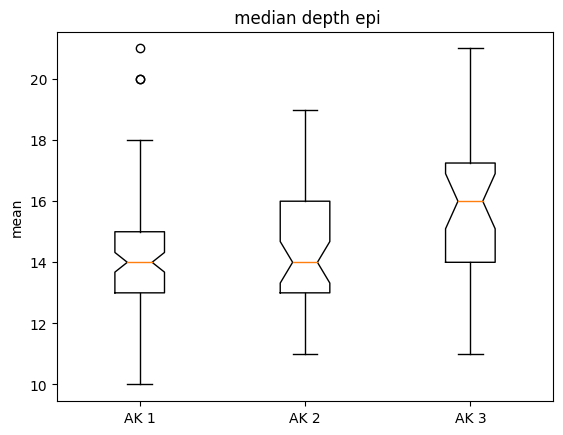

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.281     0.749    -1.195     0.634
 (0 - 2)     -1.979     0.000    -3.034    -0.923
 (1 - 0)      0.281     0.749    -0.634     1.195
 (1 - 2)     -1.698     0.002    -2.876    -0.520
 (2 - 0)      1.979     0.000     0.923     3.034
 (2 - 1)      1.698     0.002     0.520     2.876

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9572020769119263, pvalue=0.0034892517141997814)
ShapiroResult(statistic=0.971767246723175, pvalue=0.2963621914386749)
ShapiroResult(statistic=0.9827052354812622, pvalue=0.8732588887214661)
One-Way ANOVA: There is a significant difference between groups (p = 0.0001).


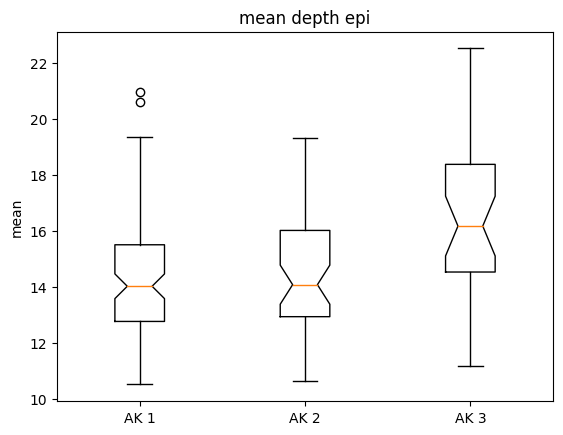

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.243     0.816    -1.190     0.704
 (0 - 2)     -2.077     0.000    -3.170    -0.984
 (1 - 0)      0.243     0.816    -0.704     1.190
 (1 - 2)     -1.834     0.001    -3.054    -0.614
 (2 - 0)      2.077     0.000     0.984     3.170
 (2 - 1)      1.834     0.001     0.614     3.054

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.8048592209815979, pvalue=7.056563111618175e-10)
ShapiroResult(statistic=0.7847326993942261, pvalue=5.968587970528461e-07)
ShapiroResult(statistic=0.9212178587913513, pvalue=0.022436073049902916)
One-Way ANOVA: No significant difference between groups (p = 0.1499).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.5329629182815552, pvalue=7.044164217383177e-16)
ShapiroResult(statistic=0.5514645576477051, pvalue=6.881829134330886e-11)
ShapiroResult(statistic=0.8065257668495178, pvalue=5.418645741883665e-05)
One-Way ANOV

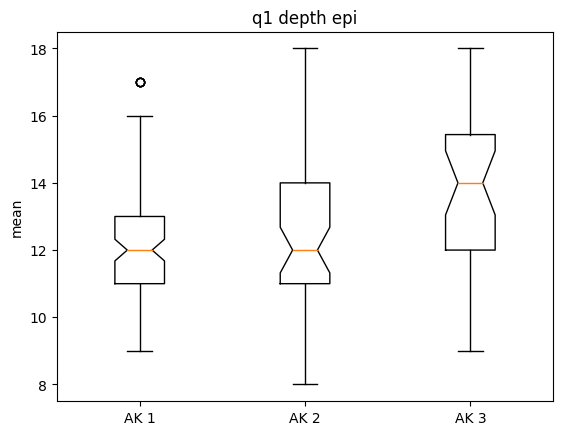

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.247     0.790    -1.139     0.645
 (0 - 2)     -1.762     0.000    -2.792    -0.733
 (1 - 0)      0.247     0.790    -0.645     1.139
 (1 - 2)     -1.516     0.006    -2.665    -0.366
 (2 - 0)      1.762     0.000     0.733     2.792
 (2 - 1)      1.516     0.006     0.366     2.665

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9344041347503662, pvalue=0.00013500277418643236)
ShapiroResult(statistic=0.9517427682876587, pvalue=0.04693138226866722)
ShapiroResult(statistic=0.9465985894203186, pvalue=0.11534082144498825)
One-Way ANOVA: There is a significant difference between groups (p = 0.0).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.8290411233901978, pvalue=4.167920675257619e-09)
ShapiroResult(statistic=0.8367926478385925, pvalue=9.876592230284587e-06)
ShapiroResult(statistic=0.9323500990867615, pvalue=0.04555273428559303)
One-Way ANO

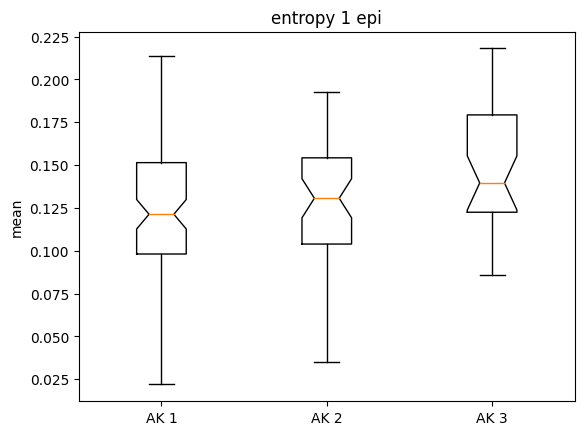

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.004     0.832    -0.019     0.012
 (0 - 2)     -0.023     0.007    -0.042    -0.005
 (1 - 0)      0.004     0.832    -0.012     0.019
 (1 - 2)     -0.020     0.058    -0.040     0.001
 (2 - 0)      0.023     0.007     0.005     0.042
 (2 - 1)      0.020     0.058    -0.001     0.040

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9710741639137268, pvalue=0.033531177788972855)
ShapiroResult(statistic=0.9394145607948303, pvalue=0.01541005540639162)
ShapiroResult(statistic=0.9566130042076111, pvalue=0.22140081226825714)
One-Way ANOVA: No significant difference between groups (p = 0.3348).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.6235424280166626, pvalue=3.007830258732608e-14)
ShapiroResult(statistic=0.5592615604400635, pvalue=8.786550653727687e-11)
ShapiroResult(statistic=0.5881685614585876, pvalue=2.6732699609510746e-08)
One-Way ANOVA: 

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


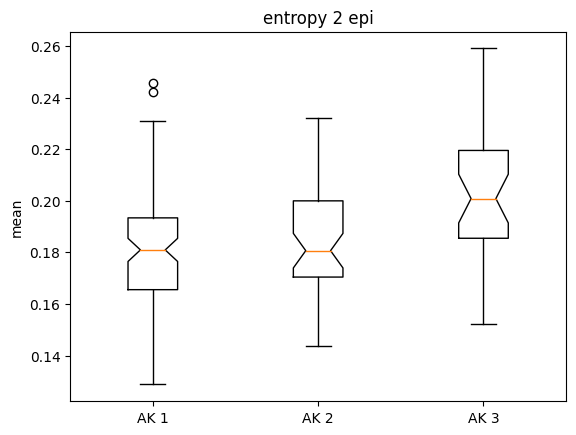

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.003     0.709    -0.012     0.006
 (0 - 2)     -0.021     0.000    -0.031    -0.010
 (1 - 0)      0.003     0.709    -0.006     0.012
 (1 - 2)     -0.017     0.002    -0.029    -0.006
 (2 - 0)      0.021     0.000     0.010     0.031
 (2 - 1)      0.017     0.002     0.006     0.029

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9761368632316589, pvalue=0.07991556078195572)
ShapiroResult(statistic=0.9419615268707275, pvalue=0.01931936852633953)
ShapiroResult(statistic=0.9553457498550415, pvalue=0.20405124127864838)
One-Way ANOVA: No significant difference between groups (p = 0.3071).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.911396861076355, pvalue=8.252307452494279e-06)
ShapiroResult(statistic=0.8744806051254272, pvalue=0.00010401273175375536)
ShapiroResult(statistic=0.8462807536125183, pvalue=0.00034499375033192337)
One-Way ANOVA: N

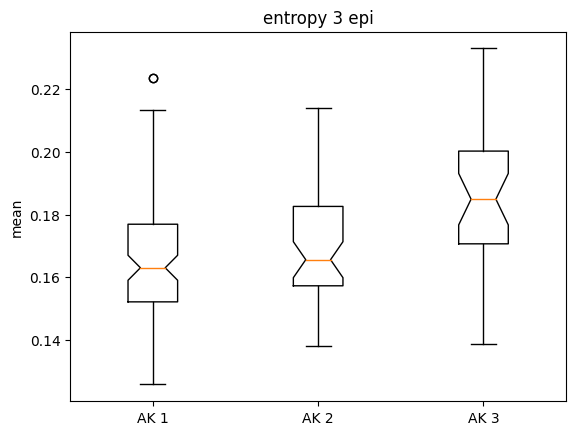

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.004     0.578    -0.012     0.005
 (0 - 2)     -0.019     0.000    -0.029    -0.009
 (1 - 0)      0.004     0.578    -0.005     0.012
 (1 - 2)     -0.016     0.003    -0.026    -0.005
 (2 - 0)      0.019     0.000     0.009     0.029
 (2 - 1)      0.016     0.003     0.005     0.026

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9797112941741943, pvalue=0.14762355387210846)
ShapiroResult(statistic=0.9707828164100647, pvalue=0.271656334400177)
ShapiroResult(statistic=0.9368916749954224, pvalue=0.061133500188589096)
One-Way ANOVA: No significant difference between groups (p = 0.2523).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.8897528052330017, pvalue=8.294909434880537e-07)
ShapiroResult(statistic=0.9363712072372437, pvalue=0.011797584593296051)
ShapiroResult(statistic=0.8575944304466248, pvalue=0.0006085964269004762)
One-Way ANOVA: No s

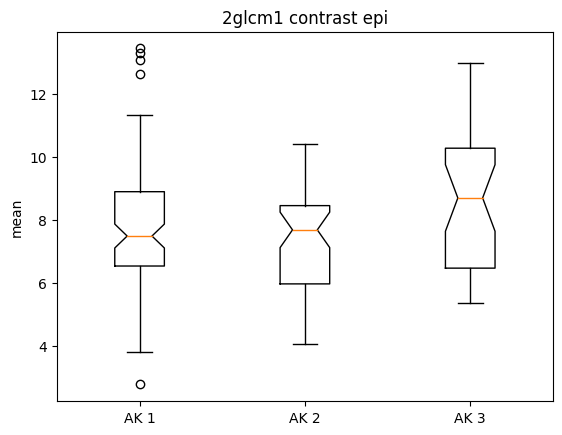

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.366     0.531    -0.440     1.173
 (0 - 2)     -0.824     0.094    -1.755     0.106
 (1 - 0)     -0.366     0.531    -1.173     0.440
 (1 - 2)     -1.191     0.020    -2.230    -0.152
 (2 - 0)      0.824     0.094    -0.106     1.755
 (2 - 1)      1.191     0.020     0.152     2.230

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9871971607208252, pvalue=0.4887438416481018)
ShapiroResult(statistic=0.9849660396575928, pvalue=0.7898170351982117)
ShapiroResult(statistic=0.9706066250801086, pvalue=0.5163114070892334)
One-Way ANOVA: There is a significant difference between groups (p = 0.0254).


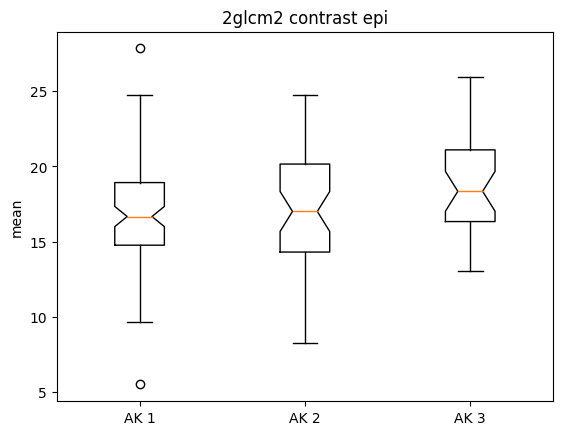

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.596     0.622    -2.110     0.918
 (0 - 2)     -2.022     0.019    -3.770    -0.274
 (1 - 0)      0.596     0.622    -0.918     2.110
 (1 - 2)     -1.426     0.198    -3.378     0.526
 (2 - 0)      2.022     0.019     0.274     3.770
 (2 - 1)      1.426     0.198    -0.526     3.378

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9790602326393127, pvalue=0.13209354877471924)
ShapiroResult(statistic=0.9408034086227417, pvalue=0.01742701604962349)
ShapiroResult(statistic=0.9561777114868164, pvalue=0.21529145538806915)
One-Way ANOVA: No significant difference between groups (p = 0.0919).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.992082417011261, pvalue=0.8496401906013489)
ShapiroResult(statistic=0.9817623496055603, pvalue=0.6535086631774902)
ShapiroResult(statistic=0.9630152583122253, pvalue=0.3314078450202942)
One-Way ANOVA: No significa

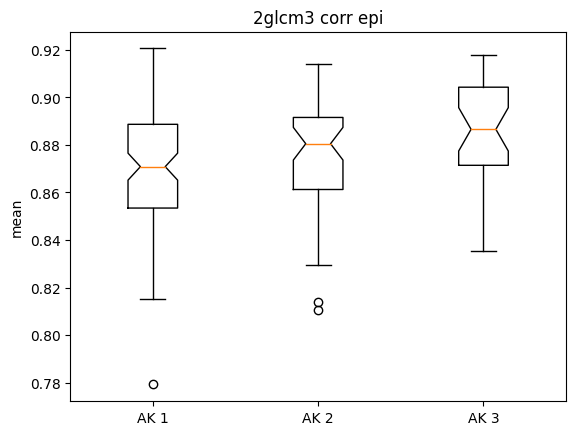

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.005     0.466    -0.016     0.005
 (0 - 2)     -0.016     0.006    -0.028    -0.004
 (1 - 0)      0.005     0.466    -0.005     0.016
 (1 - 2)     -0.011     0.148    -0.024     0.003
 (2 - 0)      0.016     0.006     0.004     0.028
 (2 - 1)      0.011     0.148    -0.003     0.024

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9863098859786987, pvalue=0.42997339367866516)
ShapiroResult(statistic=0.9294277429580688, pvalue=0.006495695095509291)
ShapiroResult(statistic=0.9717779755592346, pvalue=0.5498661994934082)
One-Way ANOVA: There is a significant difference between groups (p = 0.0069).


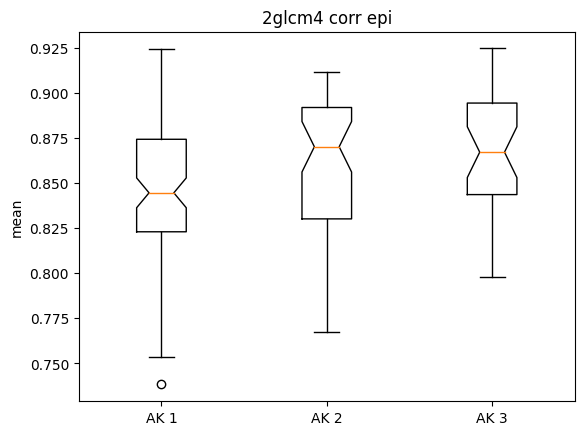

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.014     0.085    -0.030     0.001
 (0 - 2)     -0.022     0.012    -0.040    -0.004
 (1 - 0)      0.014     0.085    -0.001     0.030
 (1 - 2)     -0.008     0.619    -0.028     0.012
 (2 - 0)      0.022     0.012     0.004     0.040
 (2 - 1)      0.008     0.619    -0.012     0.028

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.963055431842804, pvalue=0.008833461441099644)
ShapiroResult(statistic=0.9769772291183472, pvalue=0.4598197638988495)
ShapiroResult(statistic=0.9884172081947327, pvalue=0.9758180975914001)
One-Way ANOVA: There is a significant difference between groups (p = 0.0).


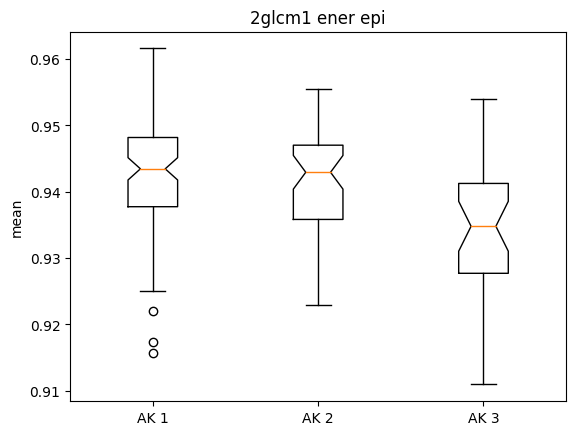

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.001     0.775    -0.003     0.005
 (0 - 2)      0.008     0.000     0.004     0.012
 (1 - 0)     -0.001     0.775    -0.005     0.003
 (1 - 2)      0.007     0.001     0.002     0.012
 (2 - 0)     -0.008     0.000    -0.012    -0.004
 (2 - 1)     -0.007     0.001    -0.012    -0.002

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9708406329154968, pvalue=0.032225921750068665)
ShapiroResult(statistic=0.9765647649765015, pvalue=0.4448566138744354)
ShapiroResult(statistic=0.9884709715843201, pvalue=0.9763618111610413)
One-Way ANOVA: There is a significant difference between groups (p = 0.0).


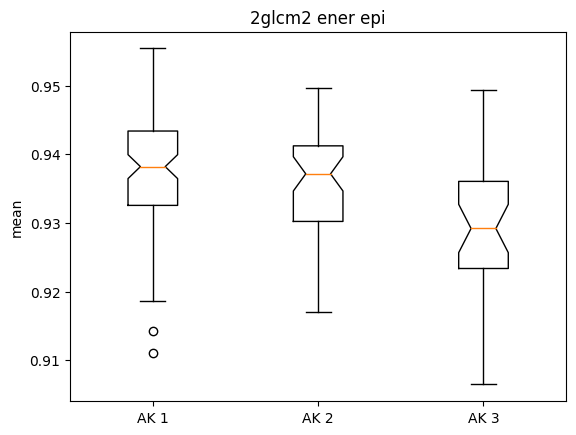

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.002     0.545    -0.002     0.005
 (0 - 2)      0.008     0.000     0.004     0.012
 (1 - 0)     -0.002     0.545    -0.005     0.002
 (1 - 2)      0.007     0.002     0.002     0.011
 (2 - 0)     -0.008     0.000    -0.012    -0.004
 (2 - 1)     -0.007     0.002    -0.011    -0.002

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.971777617931366, pvalue=0.03780118003487587)
ShapiroResult(statistic=0.9798985123634338, pvalue=0.5744799971580505)
ShapiroResult(statistic=0.9860915541648865, pvalue=0.9445662498474121)
One-Way ANOVA: There is a significant difference between groups (p = 0.0).


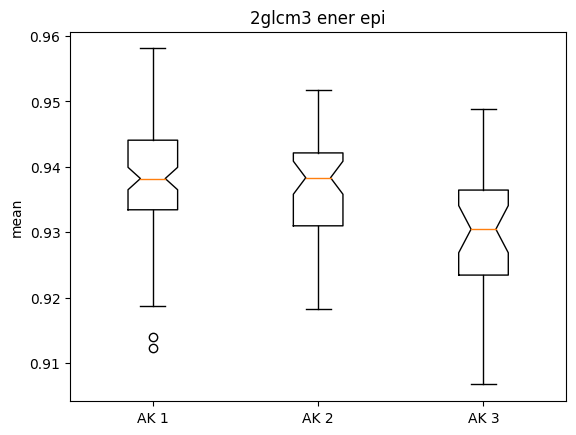

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.001     0.716    -0.002     0.005
 (0 - 2)      0.008     0.000     0.004     0.012
 (1 - 0)     -0.001     0.716    -0.005     0.002
 (1 - 2)      0.007     0.002     0.002     0.011
 (2 - 0)     -0.008     0.000    -0.012    -0.004
 (2 - 1)     -0.007     0.002    -0.011    -0.002

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9695800542831421, pvalue=0.026028253138065338)
ShapiroResult(statistic=0.9857729077339172, pvalue=0.822035551071167)
ShapiroResult(statistic=0.9852204322814941, pvalue=0.9289729595184326)
One-Way ANOVA: There is a significant difference between groups (p = 0.0001).


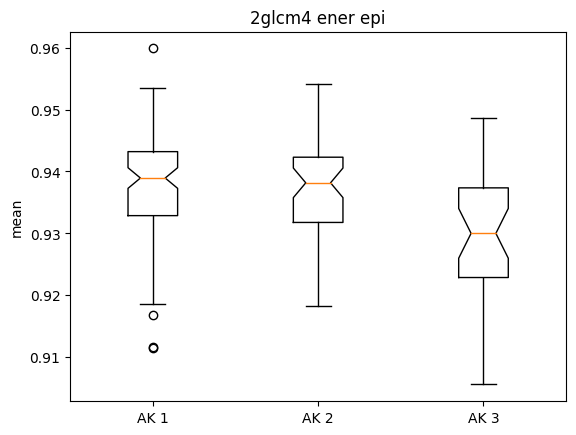

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.001     0.923    -0.003     0.004
 (0 - 2)      0.008     0.000     0.004     0.012
 (1 - 0)     -0.001     0.923    -0.004     0.003
 (1 - 2)      0.007     0.001     0.003     0.012
 (2 - 0)     -0.008     0.000    -0.012    -0.004
 (2 - 1)     -0.007     0.001    -0.012    -0.003

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9706149101257324, pvalue=0.03101368248462677)
ShapiroResult(statistic=0.907520592212677, pvalue=0.0011097514070570469)
ShapiroResult(statistic=0.9705019593238831, pvalue=0.5133697390556335)
One-Way ANOVA: No significant difference between groups (p = 0.1263).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9491544365882874, pvalue=0.0010383937042206526)
ShapiroResult(statistic=0.87606281042099, pvalue=0.00011567089677555487)
ShapiroResult(statistic=0.945305585861206, pvalue=0.1059657409787178)
One-Way ANOVA: There i

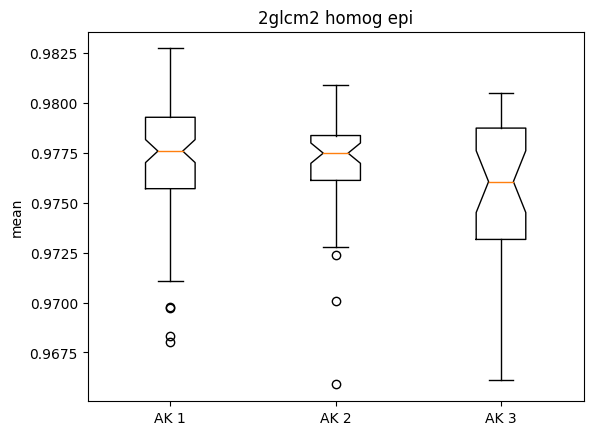

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.000     0.948    -0.001     0.001
 (0 - 2)      0.002     0.026     0.000     0.003
 (1 - 0)     -0.000     0.948    -0.001     0.001
 (1 - 2)      0.002     0.092    -0.000     0.003
 (2 - 0)     -0.002     0.026    -0.003    -0.000
 (2 - 1)     -0.002     0.092    -0.003     0.000

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9387845993041992, pvalue=0.0002418619260424748)
ShapiroResult(statistic=0.8898106217384338, pvalue=0.0002996412804350257)
ShapiroResult(statistic=0.9519535899162292, pvalue=0.16373185813426971)
One-Way ANOVA: There is a significant difference between groups (p = 0.0256).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9623857736587524, pvalue=0.007926829159259796)
ShapiroResult(statistic=0.9344919919967651, pvalue=0.010020404122769833)
ShapiroResult(statistic=0.962735652923584, pvalue=0.3257547616958618)
One-Way ANO

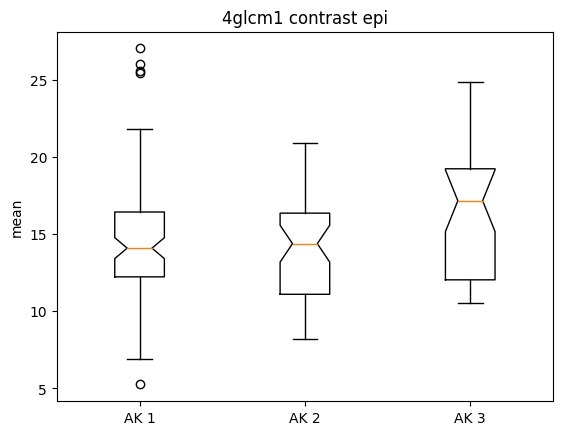

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.532     0.706    -1.048     2.112
 (0 - 2)     -1.605     0.097    -3.429     0.219
 (1 - 0)     -0.532     0.706    -2.112     1.048
 (1 - 2)     -2.137     0.037    -4.173    -0.100
 (2 - 0)      1.605     0.097    -0.219     3.429
 (2 - 1)      2.137     0.037     0.100     4.173

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9911476373672485, pvalue=0.784656822681427)
ShapiroResult(statistic=0.9755361676216125, pvalue=0.40902671217918396)
ShapiroResult(statistic=0.9524233937263489, pvalue=0.1688201129436493)
One-Way ANOVA: No significant difference between groups (p = 0.066).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.970858097076416, pvalue=0.03232153132557869)
ShapiroResult(statistic=0.9396473169326782, pvalue=0.015730272978544235)
ShapiroResult(statistic=0.9470962882041931, pvalue=0.11916595697402954)
One-Way ANOVA: No significa

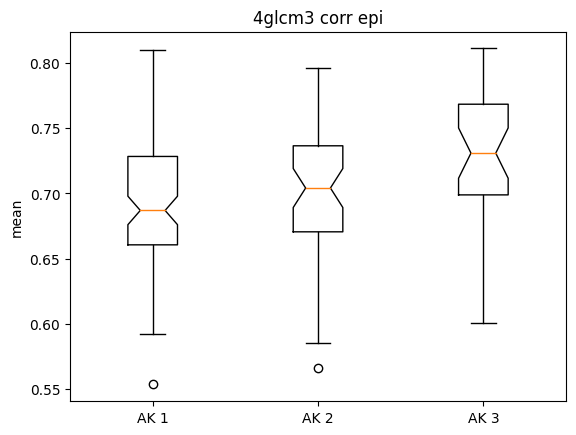

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.009     0.581    -0.031     0.013
 (0 - 2)     -0.041     0.001    -0.066    -0.016
 (1 - 0)      0.009     0.581    -0.013     0.031
 (1 - 2)     -0.031     0.023    -0.059    -0.003
 (2 - 0)      0.041     0.001     0.016     0.066
 (2 - 1)      0.031     0.023     0.003     0.059

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.982445240020752, pvalue=0.2337689995765686)
ShapiroResult(statistic=0.9502362608909607, pvalue=0.040862422436475754)
ShapiroResult(statistic=0.9473206400871277, pvalue=0.12093140184879303)
One-Way ANOVA: There is a significant difference between groups (p = 0.0041).


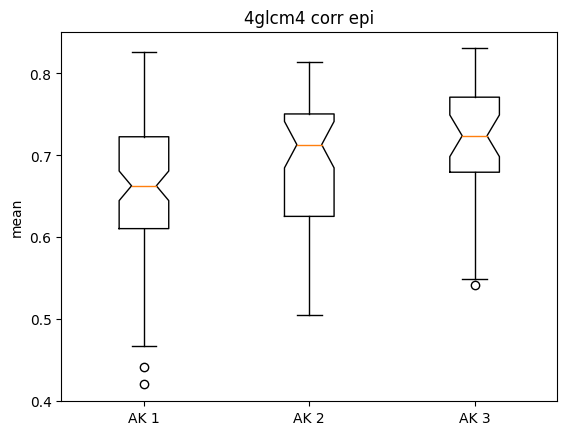

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.029     0.101    -0.062     0.004
 (0 - 2)     -0.051     0.005    -0.089    -0.013
 (1 - 0)      0.029     0.101    -0.004     0.062
 (1 - 2)     -0.022     0.440    -0.065     0.021
 (2 - 0)      0.051     0.005     0.013     0.089
 (2 - 1)      0.022     0.440    -0.021     0.065

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9588651061058044, pvalue=0.004524525720626116)
ShapiroResult(statistic=0.9768152236938477, pvalue=0.4539041221141815)
ShapiroResult(statistic=0.9842522144317627, pvalue=0.9093009829521179)
One-Way ANOVA: There is a significant difference between groups (p = 0.0).


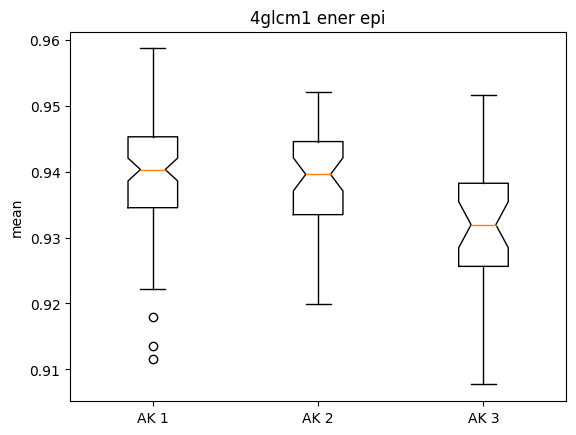

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.001     0.815    -0.003     0.005
 (0 - 2)      0.008     0.000     0.004     0.012
 (1 - 0)     -0.001     0.815    -0.005     0.003
 (1 - 2)      0.007     0.001     0.003     0.012
 (2 - 0)     -0.008     0.000    -0.012    -0.004
 (2 - 1)     -0.007     0.001    -0.012    -0.003

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9811257123947144, pvalue=0.18758872151374817)
ShapiroResult(statistic=0.9752373099327087, pvalue=0.399019330739975)
ShapiroResult(statistic=0.9880298972129822, pvalue=0.9716669321060181)
One-Way ANOVA: There is a significant difference between groups (p = 0.0).


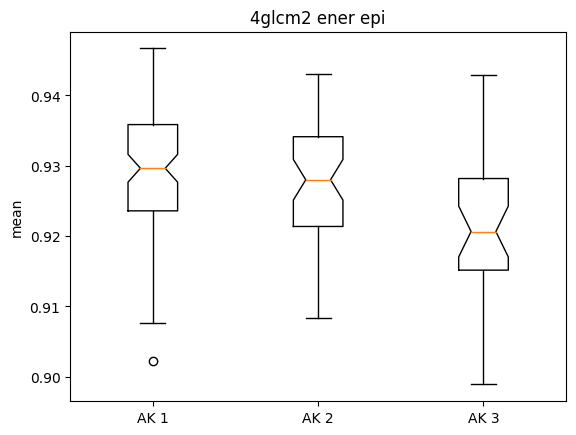

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.002     0.382    -0.002     0.006
 (0 - 2)      0.008     0.000     0.004     0.013
 (1 - 0)     -0.002     0.382    -0.006     0.002
 (1 - 2)      0.006     0.005     0.002     0.011
 (2 - 0)     -0.008     0.000    -0.013    -0.004
 (2 - 1)     -0.006     0.005    -0.011    -0.002

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9733256697654724, pvalue=0.049267351627349854)
ShapiroResult(statistic=0.9802891612052917, pvalue=0.590776801109314)
ShapiroResult(statistic=0.9860631227493286, pvalue=0.9440900683403015)
One-Way ANOVA: There is a significant difference between groups (p = 0.0).


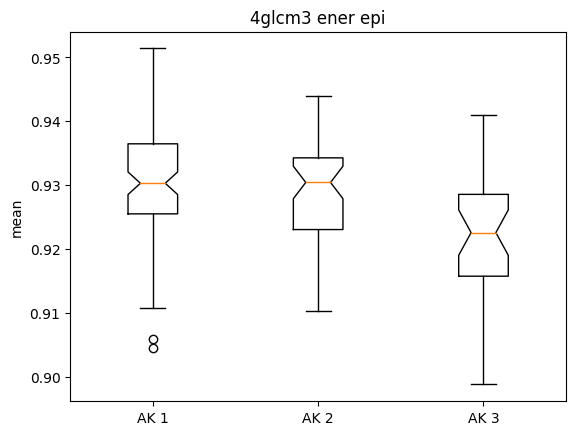

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.001     0.705    -0.002     0.005
 (0 - 2)      0.008     0.000     0.004     0.012
 (1 - 0)     -0.001     0.705    -0.005     0.002
 (1 - 2)      0.007     0.002     0.002     0.011
 (2 - 0)     -0.008     0.000    -0.012    -0.004
 (2 - 1)     -0.007     0.002    -0.011    -0.002

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9756019115447998, pvalue=0.07287831604480743)
ShapiroResult(statistic=0.9846247434616089, pvalue=0.7757845520973206)
ShapiroResult(statistic=0.9795120358467102, pvalue=0.7852919697761536)
One-Way ANOVA: There is a significant difference between groups (p = 0.0002).


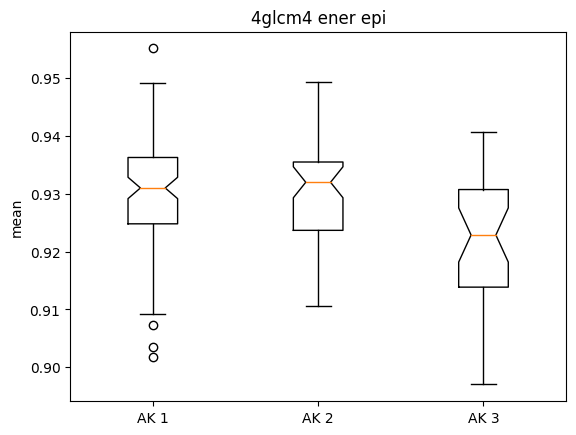

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.000     1.000    -0.004     0.004
 (0 - 2)      0.008     0.000     0.003     0.012
 (1 - 0)     -0.000     1.000    -0.004     0.004
 (1 - 2)      0.008     0.001     0.003     0.013
 (2 - 0)     -0.008     0.000    -0.012    -0.003
 (2 - 1)     -0.008     0.001    -0.013    -0.003

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9733465313911438, pvalue=0.04944392666220665)
ShapiroResult(statistic=0.9091557860374451, pvalue=0.0012588058598339558)
ShapiroResult(statistic=0.971574604511261, pvalue=0.5439607501029968)
One-Way ANOVA: No significant difference between groups (p = 0.079).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9635498523712158, pvalue=0.009571840986609459)
ShapiroResult(statistic=0.9220032691955566, pvalue=0.0035002848599106073)
ShapiroResult(statistic=0.9474033713340759, pvalue=0.12158868461847305)
One-Way ANOVA: There 

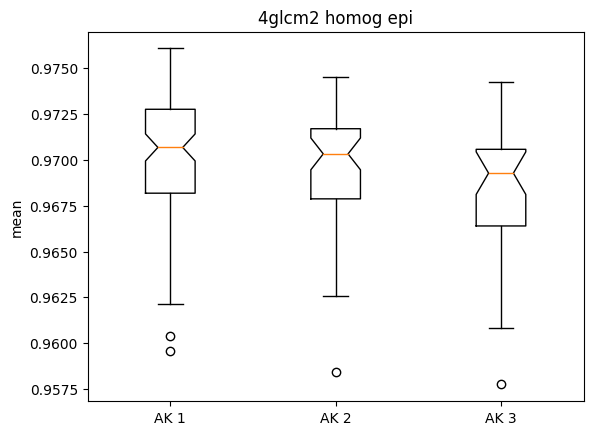

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.001     0.517    -0.001     0.002
 (0 - 2)      0.002     0.005     0.001     0.004
 (1 - 0)     -0.001     0.517    -0.002     0.001
 (1 - 2)      0.002     0.112    -0.000     0.003
 (2 - 0)     -0.002     0.005    -0.004    -0.001
 (2 - 1)     -0.002     0.112    -0.003     0.000

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9454675912857056, pvalue=0.0006106062210164964)
ShapiroResult(statistic=0.9263994693756104, pvalue=0.005035340785980225)
ShapiroResult(statistic=0.9099365472793579, pvalue=0.011195257306098938)
One-Way ANOVA: There is a significant difference between groups (p = 0.0035).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9680646657943726, pvalue=0.020172052085399628)
ShapiroResult(statistic=0.968228280544281, pvalue=0.21589395403862)
ShapiroResult(statistic=0.9475323557853699, pvalue=0.12262074649333954)
One-Way ANOVA:

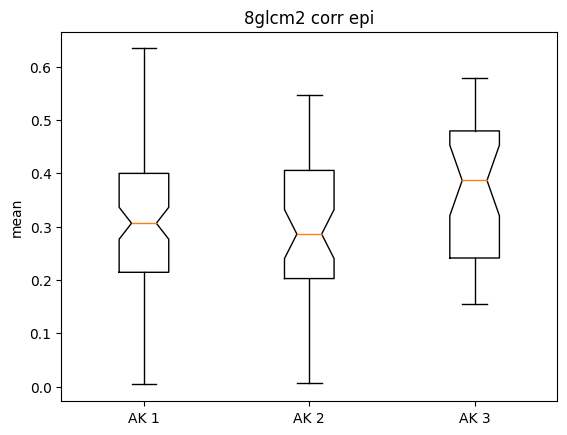

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.016     0.770    -0.039     0.072
 (0 - 2)     -0.062     0.059    -0.127     0.002
 (1 - 0)     -0.016     0.770    -0.072     0.039
 (1 - 2)     -0.079     0.028    -0.150    -0.007
 (2 - 0)      0.062     0.059    -0.002     0.127
 (2 - 1)      0.079     0.028     0.007     0.150

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9882540106773376, pvalue=0.5644908547401428)
ShapiroResult(statistic=0.9801620841026306, pvalue=0.585456907749176)
ShapiroResult(statistic=0.9718630909919739, pvalue=0.5523466467857361)
One-Way ANOVA: There is a significant difference between groups (p = 0.0003).


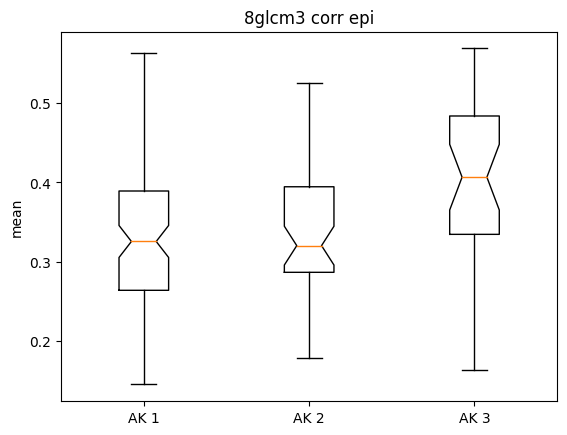

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.012     0.753    -0.050     0.027
 (0 - 2)     -0.076     0.000    -0.121    -0.032
 (1 - 0)      0.012     0.753    -0.027     0.050
 (1 - 2)     -0.065     0.006    -0.114    -0.015
 (2 - 0)      0.076     0.000     0.032     0.121
 (2 - 1)      0.065     0.006     0.015     0.114

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9886438250541687, pvalue=0.593683660030365)
ShapiroResult(statistic=0.9715887904167175, pvalue=0.2917429804801941)
ShapiroResult(statistic=0.9634993672370911, pvalue=0.3413887619972229)
One-Way ANOVA: There is a significant difference between groups (p = 0.005).


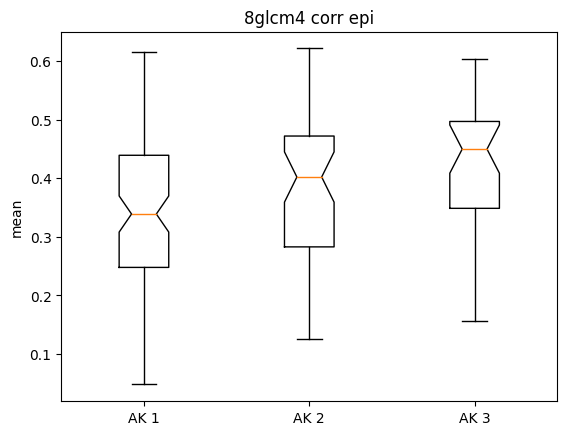

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.040     0.169    -0.092     0.012
 (0 - 2)     -0.081     0.005    -0.141    -0.021
 (1 - 0)      0.040     0.169    -0.012     0.092
 (1 - 2)     -0.041     0.325    -0.108     0.027
 (2 - 0)      0.081     0.005     0.021     0.141
 (2 - 1)      0.041     0.325    -0.027     0.108

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9530236124992371, pvalue=0.00184249272570014)
ShapiroResult(statistic=0.9768227934837341, pvalue=0.45417892932891846)
ShapiroResult(statistic=0.9723688960075378, pvalue=0.5672003626823425)
One-Way ANOVA: There is a significant difference between groups (p = 0.0001).


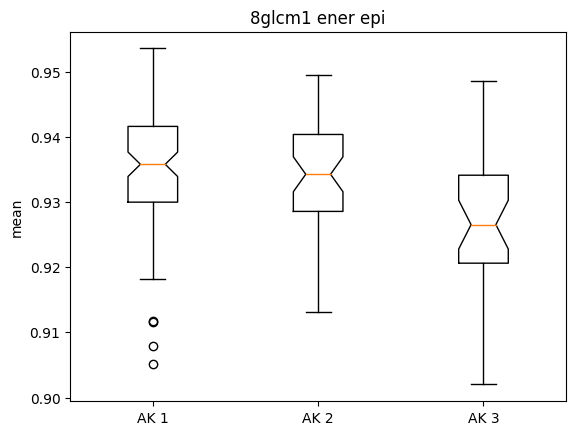

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.001     0.855    -0.003     0.005
 (0 - 2)      0.008     0.000     0.004     0.013
 (1 - 0)     -0.001     0.855    -0.005     0.003
 (1 - 2)      0.007     0.002     0.002     0.012
 (2 - 0)     -0.008     0.000    -0.013    -0.004
 (2 - 1)     -0.007     0.002    -0.012    -0.002

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9906714558601379, pvalue=0.7492455840110779)
ShapiroResult(statistic=0.976909339427948, pvalue=0.4573335349559784)
ShapiroResult(statistic=0.9826556444168091, pvalue=0.8720195293426514)
One-Way ANOVA: There is a significant difference between groups (p = 0.0001).


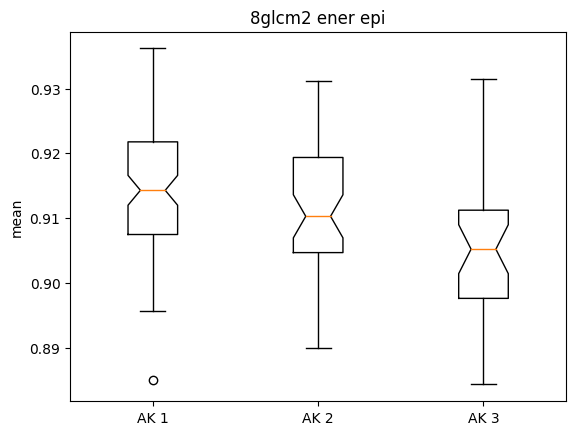

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.003     0.210    -0.001     0.007
 (0 - 2)      0.009     0.000     0.004     0.014
 (1 - 0)     -0.003     0.210    -0.007     0.001
 (1 - 2)      0.006     0.028     0.001     0.012
 (2 - 0)     -0.009     0.000    -0.014    -0.004
 (2 - 1)     -0.006     0.028    -0.012    -0.001

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9788970351219177, pvalue=0.1284557431936264)
ShapiroResult(statistic=0.9829954504966736, pvalue=0.7066937685012817)
ShapiroResult(statistic=0.9858719110488892, pvalue=0.9408292174339294)
One-Way ANOVA: There is a significant difference between groups (p = 0.0).


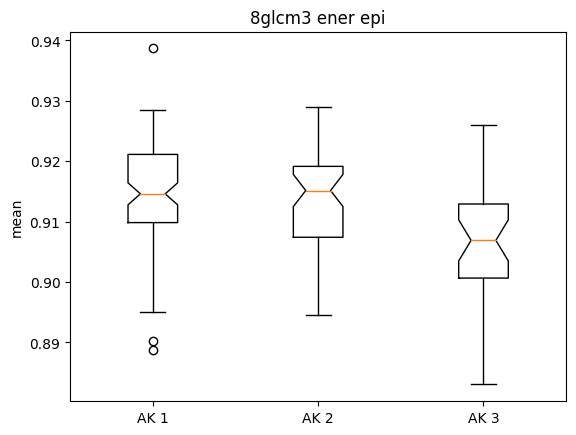

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.001     0.690    -0.002     0.005
 (0 - 2)      0.008     0.000     0.004     0.013
 (1 - 0)     -0.001     0.690    -0.005     0.002
 (1 - 2)      0.007     0.002     0.002     0.012
 (2 - 0)     -0.008     0.000    -0.013    -0.004
 (2 - 1)     -0.007     0.002    -0.012    -0.002

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.984813928604126, pvalue=0.3424249291419983)
ShapiroResult(statistic=0.9712101817131042, pvalue=0.2821505665779114)
ShapiroResult(statistic=0.9671074151992798, pvalue=0.42363423109054565)
One-Way ANOVA: There is a significant difference between groups (p = 0.0013).


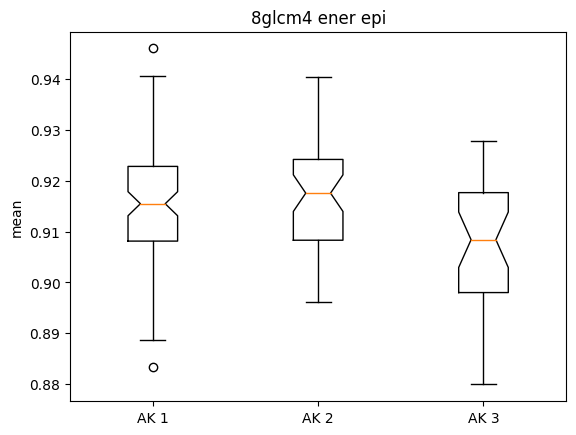

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.001     0.931    -0.005     0.004
 (0 - 2)      0.008     0.002     0.002     0.013
 (1 - 0)      0.001     0.931    -0.004     0.005
 (1 - 2)      0.009     0.003     0.003     0.015
 (2 - 0)     -0.008     0.002    -0.013    -0.002
 (2 - 1)     -0.009     0.003    -0.015    -0.003

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9720039963722229, pvalue=0.03929074481129646)
ShapiroResult(statistic=0.9190204739570618, pvalue=0.0027460099663585424)
ShapiroResult(statistic=0.9679571986198425, pvalue=0.4450153708457947)
One-Way ANOVA: No significant difference between groups (p = 0.0752).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9936273694038391, pvalue=0.9351255297660828)
ShapiroResult(statistic=0.9907964468002319, pvalue=0.9678286910057068)
ShapiroResult(statistic=0.9791147112846375, pvalue=0.7734668254852295)
One-Way ANOVA: There is a

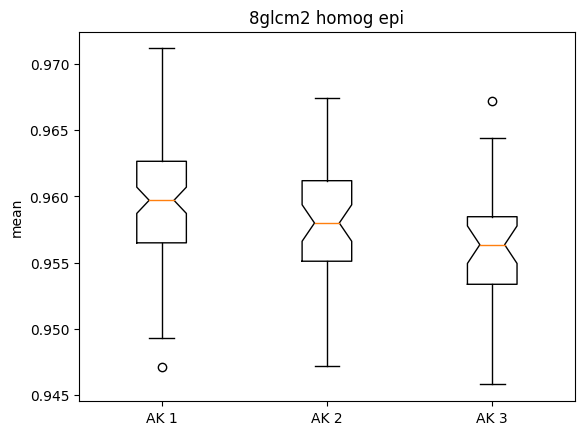

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.002     0.115    -0.000     0.004
 (0 - 2)      0.003     0.001     0.001     0.006
 (1 - 0)     -0.002     0.115    -0.004     0.000
 (1 - 2)      0.002     0.214    -0.001     0.004
 (2 - 0)     -0.003     0.001    -0.006    -0.001
 (2 - 1)     -0.002     0.214    -0.004     0.001

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.965137779712677, pvalue=0.01241010520607233)
ShapiroResult(statistic=0.9745126366615295, pvalue=0.37552565336227417)
ShapiroResult(statistic=0.9357085824012756, pvalue=0.05660976096987724)
One-Way ANOVA: There is a significant difference between groups (p = 0.0003).


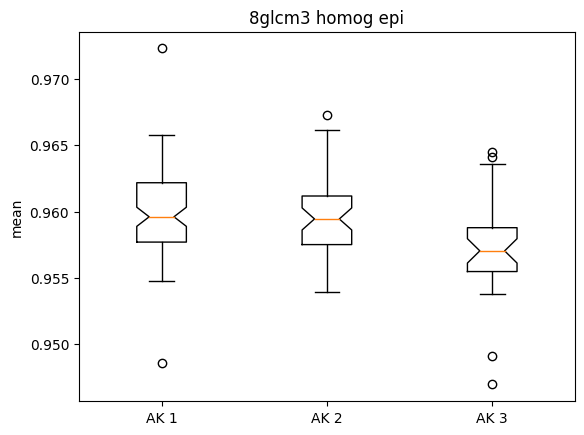

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.001     0.650    -0.001     0.002
 (0 - 2)      0.003     0.000     0.001     0.004
 (1 - 0)     -0.001     0.650    -0.002     0.001
 (1 - 2)      0.002     0.009     0.000     0.004
 (2 - 0)     -0.003     0.000    -0.004    -0.001
 (2 - 1)     -0.002     0.009    -0.004    -0.000

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9876883625984192, pvalue=0.5232574343681335)
ShapiroResult(statistic=0.969011127948761, pvalue=0.23176078498363495)
ShapiroResult(statistic=0.9547542333602905, pvalue=0.19639836251735687)
One-Way ANOVA: There is a significant difference between groups (p = 0.0238).


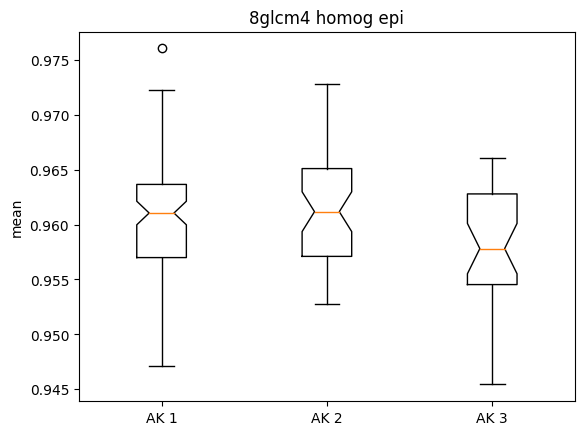

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.001     0.667    -0.003     0.001
 (0 - 2)      0.002     0.064    -0.000     0.005
 (1 - 0)      0.001     0.667    -0.001     0.003
 (1 - 2)      0.003     0.021     0.000     0.006
 (2 - 0)     -0.002     0.064    -0.005     0.000
 (2 - 1)     -0.003     0.021    -0.006    -0.000

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9335960149765015, pvalue=0.00012147193774580956)
ShapiroResult(statistic=0.8288332223892212, pvalue=6.241807113838149e-06)
ShapiroResult(statistic=0.9425884485244751, pvalue=0.08868049085140228)
One-Way ANOVA: No significant difference between groups (p = 0.5148).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.929470419883728, pvalue=7.149996963562444e-05)
ShapiroResult(statistic=0.8194525837898254, pvalue=3.6890435239911312e-06)
ShapiroResult(statistic=0.9532597064971924, pvalue=0.17825864255428314)
One-Way ANOVA:

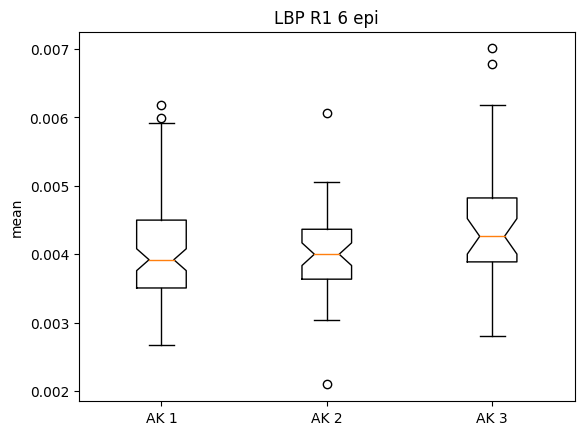

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.000     0.999    -0.000     0.000
 (0 - 2)     -0.000     0.018    -0.001    -0.000
 (1 - 0)      0.000     0.999    -0.000     0.000
 (1 - 2)     -0.000     0.041    -0.001    -0.000
 (2 - 0)      0.000     0.018     0.000     0.001
 (2 - 1)      0.000     0.041     0.000     0.001

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9429068565368652, pvalue=0.0004258983535692096)
ShapiroResult(statistic=0.8422316312789917, pvalue=1.3610284440801479e-05)
ShapiroResult(statistic=0.9112627506256104, pvalue=0.012133355252444744)
One-Way ANOVA: No significant difference between groups (p = 0.1627).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9446499347686768, pvalue=0.0005438470980152488)
ShapiroResult(statistic=0.9643732905387878, pvalue=0.15155795216560364)
ShapiroResult(statistic=0.8324238657951355, pvalue=0.00017665617633610964)
One-Way ANOV

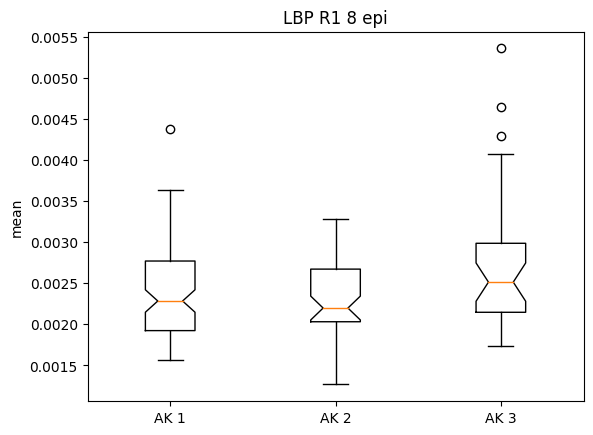

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.000     0.787    -0.000     0.000
 (0 - 2)     -0.000     0.016    -0.001    -0.000
 (1 - 0)     -0.000     0.787    -0.000     0.000
 (1 - 2)     -0.000     0.008    -0.001    -0.000
 (2 - 0)      0.000     0.016     0.000     0.001
 (2 - 1)      0.000     0.008     0.000     0.001

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9114410877227783, pvalue=8.293559403682593e-06)
ShapiroResult(statistic=0.7758873701095581, pvalue=3.8593543649767525e-07)
ShapiroResult(statistic=0.7963144183158875, pvalue=3.4776050597429276e-05)
One-Way ANOVA: No significant difference between groups (p = 0.1562).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9302123188972473, pvalue=7.856277079554275e-05)
ShapiroResult(statistic=0.8153097033500671, pvalue=2.938795432783081e-06)
ShapiroResult(statistic=0.9152777791023254, pvalue=0.015512241050601006)
One-Way AN

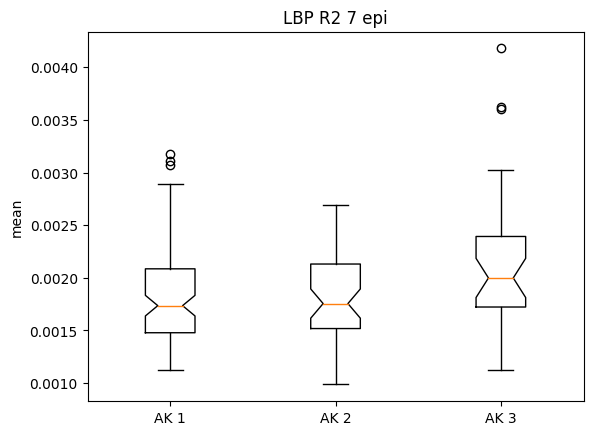

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.000     0.979    -0.000     0.000
 (0 - 2)     -0.000     0.013    -0.001    -0.000
 (1 - 0)     -0.000     0.979    -0.000     0.000
 (1 - 2)     -0.000     0.019    -0.001    -0.000
 (2 - 0)      0.000     0.013     0.000     0.001
 (2 - 1)      0.000     0.019     0.000     0.001

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9215112924575806, pvalue=2.678859709703829e-05)
ShapiroResult(statistic=0.9814348220825195, pvalue=0.6394318342208862)
ShapiroResult(statistic=0.8794119954109192, pvalue=0.0019287504255771637)
One-Way ANOVA: There is a significant difference between groups (p = 0.0025).


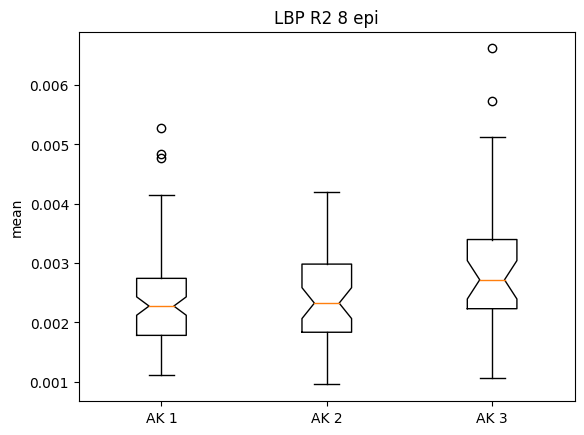

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.000     1.000    -0.000     0.000
 (0 - 2)     -0.001     0.003    -0.001    -0.000
 (1 - 0)      0.000     1.000    -0.000     0.000
 (1 - 2)     -0.001     0.008    -0.001    -0.000
 (2 - 0)      0.001     0.003     0.000     0.001
 (2 - 1)      0.001     0.008     0.000     0.001

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9268267154693604, pvalue=5.1307582907611504e-05)
ShapiroResult(statistic=0.8033548593521118, pvalue=1.5492303191422252e-06)
ShapiroResult(statistic=0.7490221261978149, pvalue=5.138719188835239e-06)
One-Way ANOVA: No significant difference between groups (p = 0.0521).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9506518840789795, pvalue=0.001293831504881382)
ShapiroResult(statistic=0.8940690159797668, pvalue=0.0004068558046128601)
ShapiroResult(statistic=0.9156249761581421, pvalue=0.01584760844707489)
One-Way ANOV

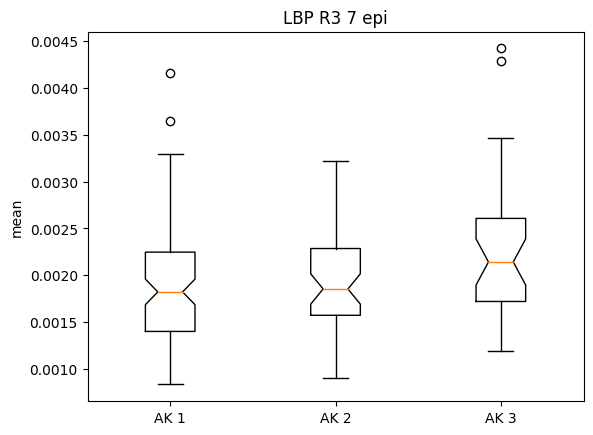

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.000     0.855    -0.000     0.000
 (0 - 2)     -0.000     0.006    -0.001    -0.000
 (1 - 0)      0.000     0.855    -0.000     0.000
 (1 - 2)     -0.000     0.047    -0.001    -0.000
 (2 - 0)      0.000     0.006     0.000     0.001
 (2 - 1)      0.000     0.047     0.000     0.001

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9197003841400146, pvalue=2.1577248844550923e-05)
ShapiroResult(statistic=0.9122310280799866, pvalue=0.001599445822648704)
ShapiroResult(statistic=0.9379923939704895, pvalue=0.06567511707544327)
One-Way ANOVA: There is a significant difference between groups (p = 0.0028).


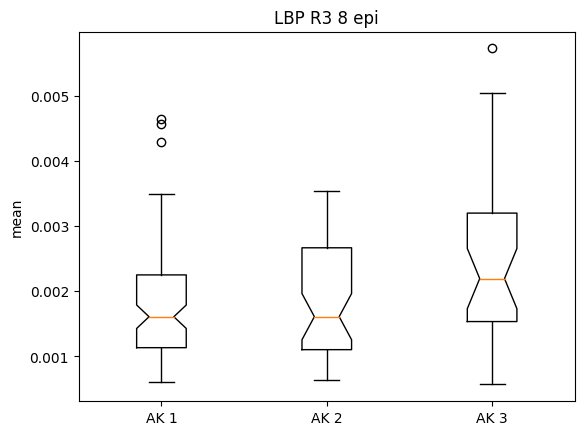

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.000     0.963    -0.000     0.000
 (0 - 2)     -0.001     0.002    -0.001    -0.000
 (1 - 0)      0.000     0.963    -0.000     0.000
 (1 - 2)     -0.001     0.014    -0.001    -0.000
 (2 - 0)      0.001     0.002     0.000     0.001
 (2 - 1)      0.001     0.014     0.000     0.001

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9362838268280029, pvalue=0.00017299578757956624)
ShapiroResult(statistic=0.849696934223175, pvalue=2.134427813871298e-05)
ShapiroResult(statistic=0.7704885601997375, pvalue=1.1913443813682534e-05)
One-Way ANOVA: There is a significant difference between groups (p = 0.0197).


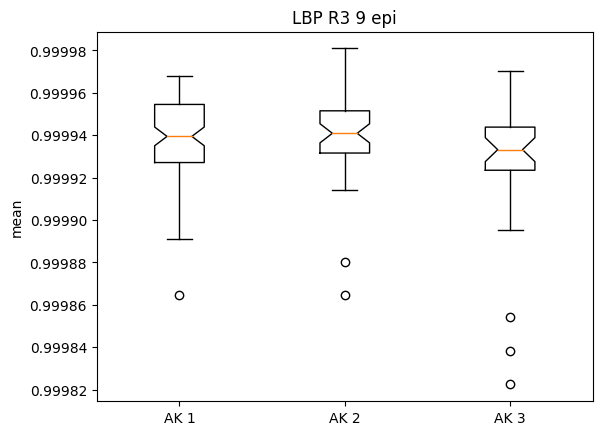

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.000     1.000    -0.000     0.000
 (0 - 2)      0.000     0.020     0.000     0.000
 (1 - 0)      0.000     1.000    -0.000     0.000
 (1 - 2)      0.000     0.041     0.000     0.000
 (2 - 0)     -0.000     0.020    -0.000    -0.000
 (2 - 1)     -0.000     0.041    -0.000    -0.000

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9768604040145874, pvalue=0.0905250757932663)
ShapiroResult(statistic=0.9480230212211609, pvalue=0.033375874161720276)
ShapiroResult(statistic=0.9351494908332825, pvalue=0.05459318682551384)
One-Way ANOVA: There is a significant difference between groups (p = 0.0354).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9499675035476685, pvalue=0.0011697455774992704)
ShapiroResult(statistic=0.9740195274353027, pvalue=0.36016538739204407)
ShapiroResult(statistic=0.947109043598175, pvalue=0.11926548182964325)
One-Way ANOVA:

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:3189: RuntimeWarning: invalid value encountered in scalar divide
  W = numer / denom
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4167: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:3189: RuntimeWarning: invalid value encountered in scalar divide
  W = numer / denom
/usr/local/lib/python3

One-Way ANOVA: No significant difference between groups (p = 0.5397).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9524556994438171, pvalue=0.0016919627087190747)
ShapiroResult(statistic=0.973342776298523, pvalue=0.3399031162261963)
ShapiroResult(statistic=0.9083051085472107, pvalue=0.010144893079996109)
One-Way ANOVA: No significant difference between groups (p = 0.2895).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9220318794250488, pvalue=2.852068246284034e-05)
ShapiroResult(statistic=0.9366434812545776, pvalue=0.012081274762749672)
ShapiroResult(statistic=0.8818994760513306, pvalue=0.002211429877206683)
One-Way ANOVA: No significant difference between groups (p = 0.4001).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.8968946933746338, pvalue=1.7176879509861465e-06)
ShapiroResult(statistic=0.8812519311904907, pvalue=0.00016465333465021104)
ShapiroResult(statistic=0.8869240283966064, pvalue=0.002925135660916567)
One-Way ANOVA: No significant difference betwe

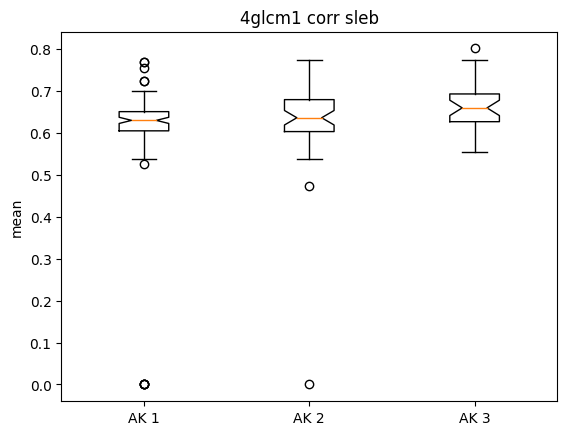

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.031     0.355    -0.084     0.022
 (0 - 2)     -0.062     0.045    -0.123    -0.001
 (1 - 0)      0.031     0.355    -0.022     0.084
 (1 - 2)     -0.031     0.522    -0.100     0.037
 (2 - 0)      0.062     0.045     0.001     0.123
 (2 - 1)      0.031     0.522    -0.037     0.100

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.6799068450927734, pvalue=4.37229652440127e-13)
ShapiroResult(statistic=0.7613914012908936, pvalue=1.9304540899156564e-07)
ShapiroResult(statistic=0.9624167084693909, pvalue=0.31940680742263794)
One-Way ANOVA: No significant difference between groups (p = 0.1608).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.6737425923347473, pvalue=3.212556360255442e-13)
ShapiroResult(statistic=0.7081456184387207, pvalue=1.8539008550533254e-08)
ShapiroResult(statistic=0.9484990835189819, pvalue=0.13063886761665344)
One-Way ANOVA:

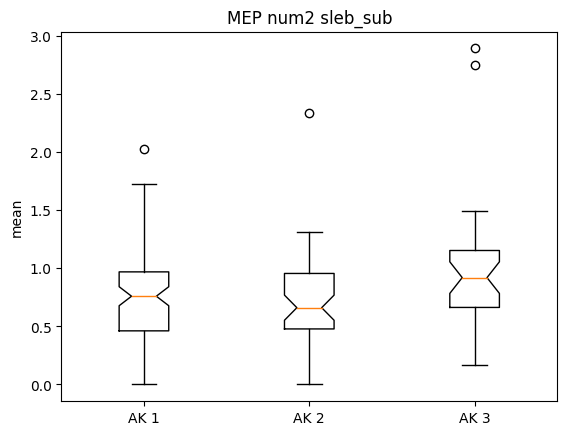

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.016     0.976    -0.168     0.201
 (0 - 2)     -0.247     0.018    -0.461    -0.034
 (1 - 0)     -0.016     0.976    -0.201     0.168
 (1 - 2)     -0.264     0.026    -0.502    -0.026
 (2 - 0)      0.247     0.018     0.034     0.461
 (2 - 1)      0.264     0.026     0.026     0.502

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.4350413680076599, pvalue=2.1256917159889757e-17)
ShapiroResult(statistic=0.48746269941329956, pvalue=1.0260820838825513e-11)
ShapiroResult(statistic=0.8184802532196045, pvalue=9.25121785257943e-05)
One-Way ANOVA: No significant difference between groups (p = 0.2433).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.954270601272583, pvalue=0.002224573167040944)
ShapiroResult(statistic=0.892063558101654, pvalue=0.0003520366153679788)
ShapiroResult(statistic=0.8920155167579651, pvalue=0.003902249503880739)
One-Way ANOVA

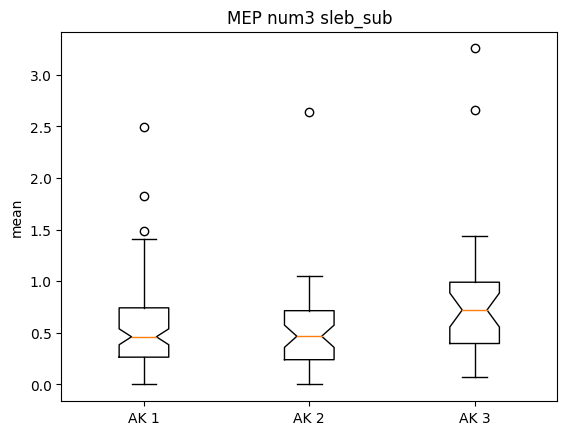

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.035     0.911    -0.167     0.237
 (0 - 2)     -0.260     0.025    -0.493    -0.027
 (1 - 0)     -0.035     0.911    -0.237     0.167
 (1 - 2)     -0.295     0.022    -0.556    -0.035
 (2 - 0)      0.260     0.025     0.027     0.493
 (2 - 1)      0.295     0.022     0.035     0.556

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.3109174966812134, pvalue=4.5724584877855385e-19)
ShapiroResult(statistic=0.569862961769104, pvalue=1.2307599384087098e-10)
ShapiroResult(statistic=0.6746945381164551, pvalue=3.715198886311555e-07)
One-Way ANOVA: No significant difference between groups (p = 0.3728).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.2530691623687744, pvalue=9.11532420141608e-20)
ShapiroResult(statistic=0.6186598539352417, pvalue=6.269241792367097e-10)
ShapiroResult(statistic=0.5808209180831909, pvalue=2.1740691025229353e-08)
One-Way AN

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:3189: RuntimeWarning: invalid value encountered in scalar divide
  W = numer / denom
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4167: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:3189: RuntimeWarning: invalid value encountered in scalar divide
  W = numer / denom
/usr/local/lib/python3

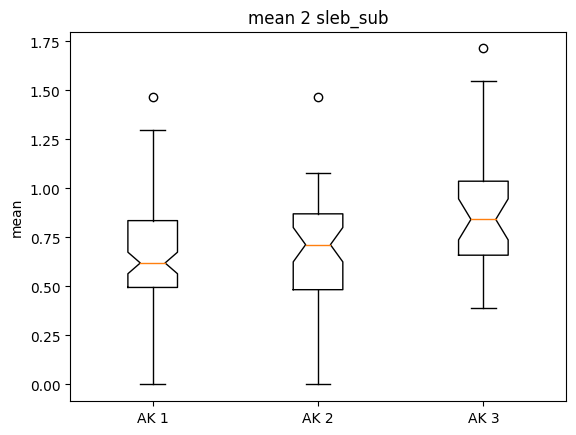

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.034     0.771    -0.152     0.083
 (0 - 2)     -0.202     0.002    -0.338    -0.067
 (1 - 0)      0.034     0.771    -0.083     0.152
 (1 - 2)     -0.168     0.025    -0.320    -0.017
 (2 - 0)      0.202     0.002     0.067     0.338
 (2 - 1)      0.168     0.025     0.017     0.320

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9629146456718445, pvalue=0.008634229190647602)
ShapiroResult(statistic=0.9604880809783936, pvalue=0.10565242916345596)
ShapiroResult(statistic=0.9141452312469482, pvalue=0.014469153247773647)
One-Way ANOVA: There is a significant difference between groups (p = 0.0004).


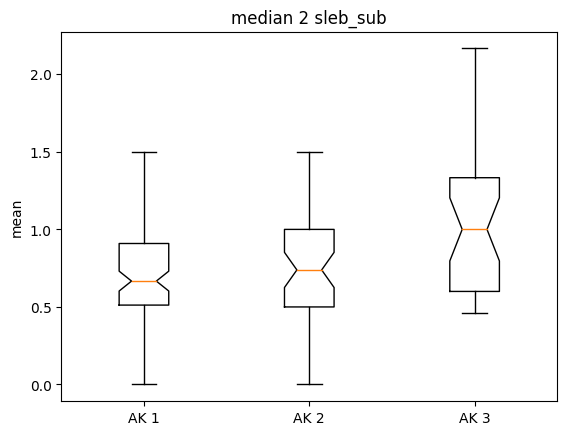

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.050     0.680    -0.190     0.091
 (0 - 2)     -0.277     0.000    -0.438    -0.115
 (1 - 0)      0.050     0.680    -0.091     0.190
 (1 - 2)     -0.227     0.009    -0.408    -0.046
 (2 - 0)      0.277     0.000     0.115     0.438
 (2 - 1)      0.227     0.009     0.046     0.408

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.8851908445358276, pvalue=5.283922632770555e-07)
ShapiroResult(statistic=0.7561763525009155, pvalue=1.5140639675337297e-07)
ShapiroResult(statistic=0.9199752807617188, pvalue=0.020758073776960373)
One-Way ANOVA: There is a significant difference between groups (p = 0.0235).


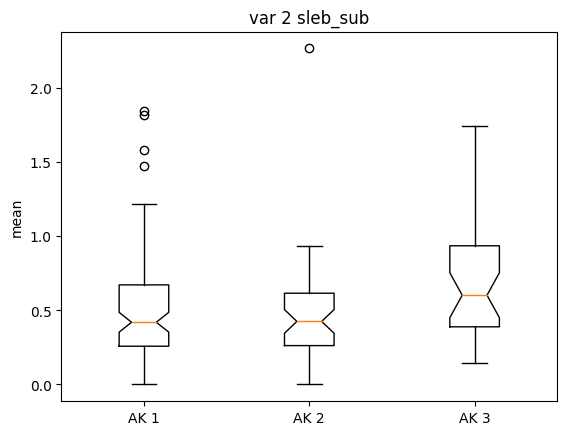

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.020     0.953    -0.138     0.177
 (0 - 2)     -0.196     0.031    -0.378    -0.014
 (1 - 0)     -0.020     0.953    -0.177     0.138
 (1 - 2)     -0.216     0.034    -0.419    -0.013
 (2 - 0)      0.196     0.031     0.014     0.378
 (2 - 1)      0.216     0.034     0.013     0.419

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9716774821281433, pvalue=0.03716101869940758)
ShapiroResult(statistic=0.9325233697891235, pvalue=0.008456937037408352)
ShapiroResult(statistic=0.9662414789199829, pvalue=0.40262869000434875)
One-Way ANOVA: There is a significant difference between groups (p = 0.0243).


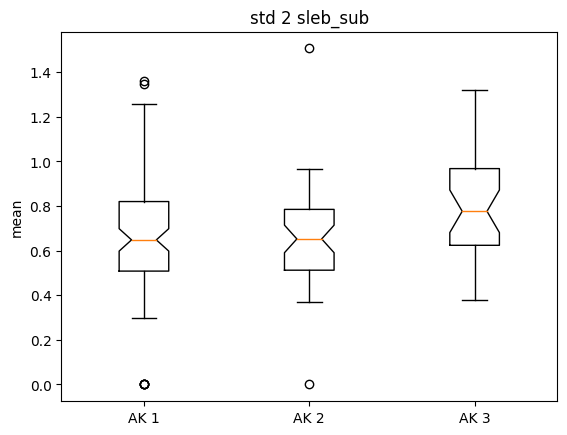

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.002     0.999    -0.110     0.107
 (0 - 2)     -0.140     0.024    -0.265    -0.015
 (1 - 0)      0.002     0.999    -0.107     0.110
 (1 - 2)     -0.139     0.053    -0.278     0.001
 (2 - 0)      0.140     0.024     0.015     0.265
 (2 - 1)      0.139     0.053    -0.001     0.278

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9566230773925781, pvalue=0.003189900191500783)
ShapiroResult(statistic=0.9123764038085938, pvalue=0.0016177849611267447)
ShapiroResult(statistic=0.9272436499595642, pvalue=0.032835353165864944)
One-Way ANOVA: There is a significant difference between groups (p = 0.0016).


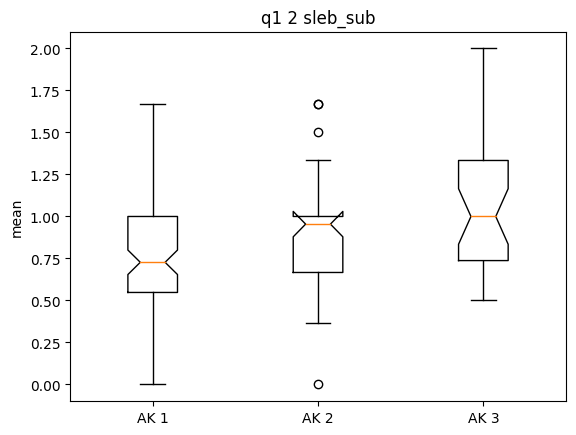

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.063     0.559    -0.207     0.081
 (0 - 2)     -0.256     0.001    -0.422    -0.090
 (1 - 0)      0.063     0.559    -0.081     0.207
 (1 - 2)     -0.194     0.038    -0.379    -0.008
 (2 - 0)      0.256     0.001     0.090     0.422
 (2 - 1)      0.194     0.038     0.008     0.379

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9515298008918762, pvalue=0.0014736163429915905)
ShapiroResult(statistic=0.9225135445594788, pvalue=0.003649843158200383)
ShapiroResult(statistic=0.8973785042762756, pvalue=0.005314551759511232)
One-Way ANOVA: There is a significant difference between groups (p = 0.0025).


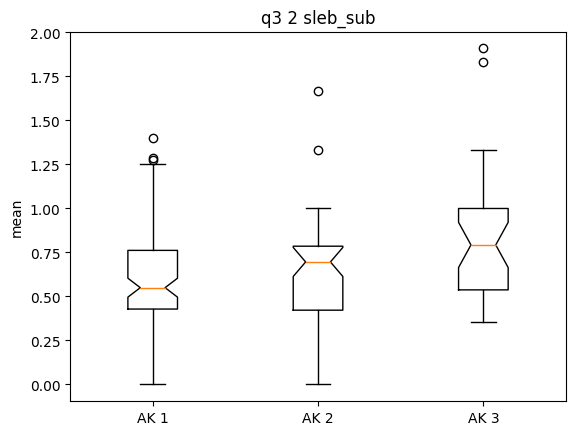

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.051     0.633    -0.182     0.080
 (0 - 2)     -0.225     0.002    -0.377    -0.074
 (1 - 0)      0.051     0.633    -0.080     0.182
 (1 - 2)     -0.175     0.041    -0.344    -0.006
 (2 - 0)      0.225     0.002     0.074     0.377
 (2 - 1)      0.175     0.041     0.006     0.344

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.12238353490829468, pvalue=3.2955610696258544e-21)
ShapiroResult(statistic=0.7443115711212158, pvalue=8.813098872906266e-08)
ShapiroResult(statistic=0.1947782039642334, pvalue=4.206272916779108e-12)
One-Way ANOVA: No significant difference between groups (p = 0.2867).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9514533281326294, pvalue=0.0014569544000551105)
ShapiroResult(statistic=0.9265990257263184, pvalue=0.005120026413351297)
ShapiroResult(statistic=0.9121389389038086, pvalue=0.012798246927559376)
One-Way ANO

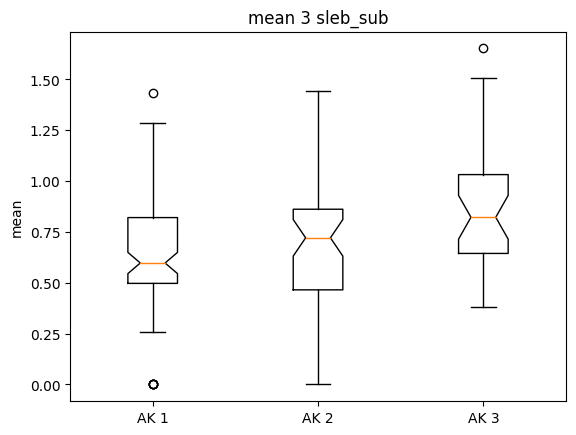

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.037     0.732    -0.154     0.079
 (0 - 2)     -0.203     0.001    -0.338    -0.069
 (1 - 0)      0.037     0.732    -0.079     0.154
 (1 - 2)     -0.166     0.026    -0.317    -0.016
 (2 - 0)      0.203     0.001     0.069     0.338
 (2 - 1)      0.166     0.026     0.016     0.317

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9653607606887817, pvalue=0.012873831205070019)
ShapiroResult(statistic=0.9579944014549255, pvalue=0.08376425504684448)
ShapiroResult(statistic=0.9107747077941895, pvalue=0.0117788789793849)
One-Way ANOVA: There is a significant difference between groups (p = 0.0015).


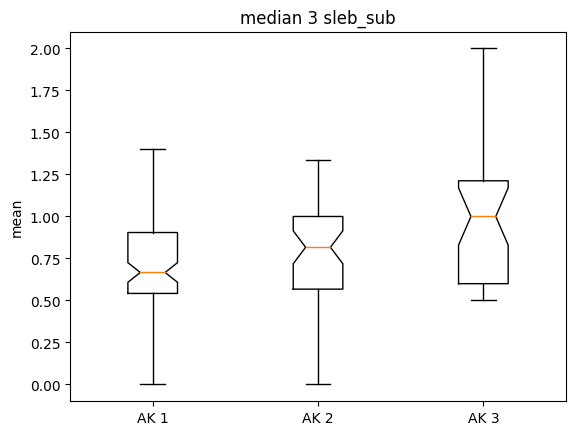

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.058     0.526    -0.186     0.069
 (0 - 2)     -0.229     0.001    -0.376    -0.082
 (1 - 0)      0.058     0.526    -0.069     0.186
 (1 - 2)     -0.170     0.040    -0.334    -0.006
 (2 - 0)      0.229     0.001     0.082     0.376
 (2 - 1)      0.170     0.040     0.006     0.334

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.7728331089019775, pvalue=8.275435198212833e-11)
ShapiroResult(statistic=0.6599730253219604, pvalue=2.7838622518316924e-09)
ShapiroResult(statistic=0.871921956539154, pvalue=0.0012862347066402435)
One-Way ANOVA: There is a significant difference between groups (p = 0.0282).


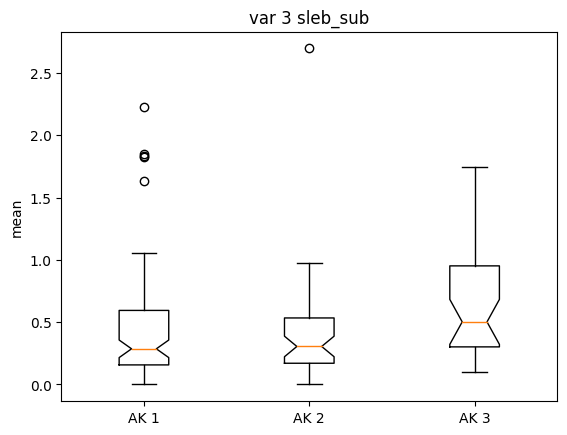

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.006     0.996    -0.177     0.190
 (0 - 2)     -0.229     0.031    -0.441    -0.017
 (1 - 0)     -0.006     0.996    -0.190     0.177
 (1 - 2)     -0.236     0.051    -0.472     0.001
 (2 - 0)      0.229     0.031     0.017     0.441
 (2 - 1)      0.236     0.051    -0.001     0.472

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.956784725189209, pvalue=0.0032706770580261946)
ShapiroResult(statistic=0.9049018025398254, pvalue=0.000908625137526542)
ShapiroResult(statistic=0.9400433897972107, pvalue=0.07507934421300888)
One-Way ANOVA: There is a significant difference between groups (p = 0.0146).


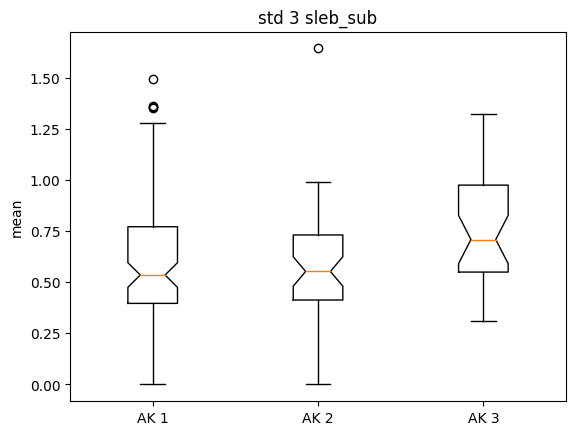

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.014     0.961    -0.135     0.107
 (0 - 2)     -0.170     0.012    -0.310    -0.031
 (1 - 0)      0.014     0.961    -0.107     0.135
 (1 - 2)     -0.156     0.049    -0.312    -0.001
 (2 - 0)      0.170     0.012     0.031     0.310
 (2 - 1)      0.156     0.049     0.001     0.312

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9378161430358887, pvalue=0.00021227497200015932)
ShapiroResult(statistic=0.9394479393959045, pvalue=0.015455539338290691)
ShapiroResult(statistic=0.9583538770675659, pvalue=0.24747546017169952)
One-Way ANOVA: There is a significant difference between groups (p = 0.0036).


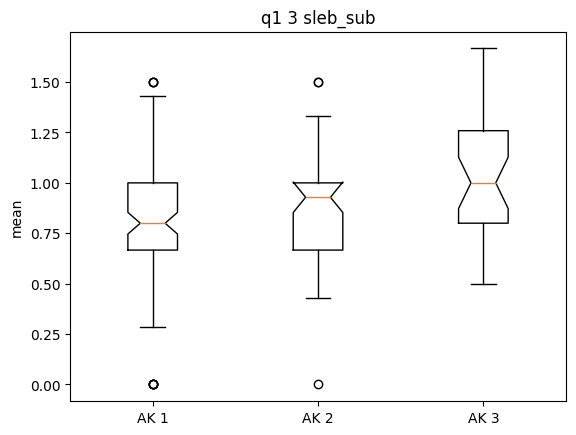

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.022     0.914    -0.151     0.107
 (0 - 2)     -0.211     0.003    -0.360    -0.063
 (1 - 0)      0.022     0.914    -0.107     0.151
 (1 - 2)     -0.189     0.021    -0.355    -0.023
 (2 - 0)      0.211     0.003     0.063     0.360
 (2 - 1)      0.189     0.021     0.023     0.355

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9483540058135986, pvalue=0.0009241717052645981)
ShapiroResult(statistic=0.9558656215667725, pvalue=0.06872354447841644)
ShapiroResult(statistic=0.9146413803100586, pvalue=0.014916759915649891)
One-Way ANOVA: There is a significant difference between groups (p = 0.0023).


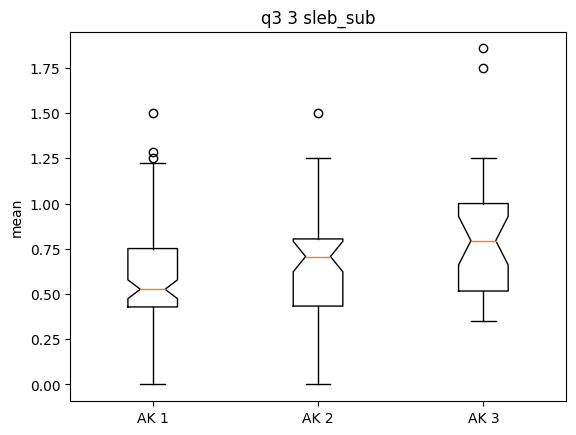

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.050     0.636    -0.180     0.080
 (0 - 2)     -0.225     0.001    -0.375    -0.075
 (1 - 0)      0.050     0.636    -0.080     0.180
 (1 - 2)     -0.175     0.038    -0.343    -0.008
 (2 - 0)      0.225     0.001     0.075     0.375
 (2 - 1)      0.175     0.038     0.008     0.343

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9635027050971985, pvalue=0.009498711675405502)
ShapiroResult(statistic=0.9353609681129456, pvalue=0.010804505087435246)
ShapiroResult(statistic=0.9350007772445679, pvalue=0.054069261997938156)
One-Way ANOVA: No significant difference between groups (p = 0.3515).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9024384617805481, pvalue=3.0824896839476423e-06)
ShapiroResult(statistic=0.92210853099823, pvalue=0.0035305991768836975)
ShapiroResult(statistic=0.9162722229957581, pvalue=0.01649327389895916)
One-Way ANOVA: No

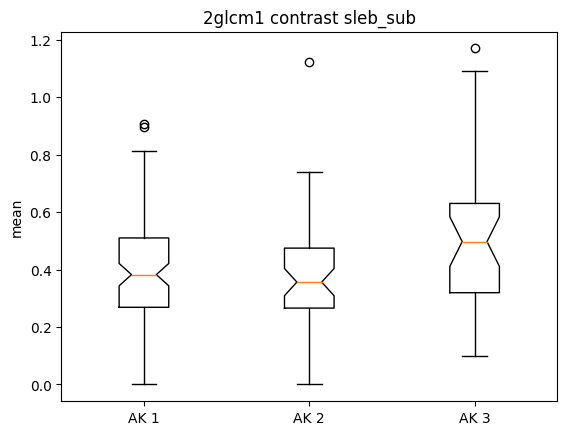

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.009     0.966    -0.080     0.099
 (0 - 2)     -0.124     0.014    -0.227    -0.021
 (1 - 0)     -0.009     0.966    -0.099     0.080
 (1 - 2)     -0.133     0.018    -0.248    -0.019
 (2 - 0)      0.124     0.014     0.021     0.227
 (2 - 1)      0.133     0.018     0.019     0.248

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9732178449630737, pvalue=0.04836439713835716)
ShapiroResult(statistic=0.902157187461853, pvalue=0.0007386369397863746)
ShapiroResult(statistic=0.9511014819145203, pvalue=0.15487870573997498)
One-Way ANOVA: There is a significant difference between groups (p = 0.0082).


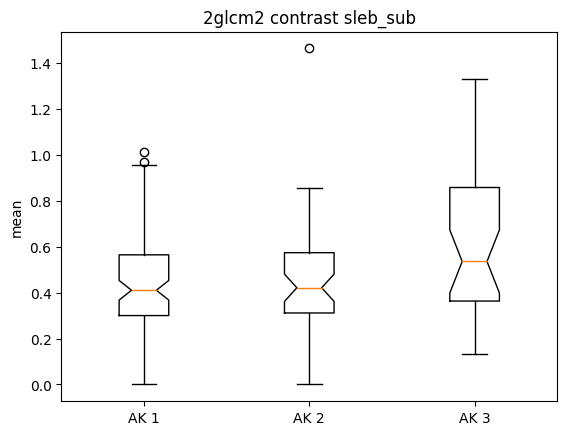

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.009     0.978    -0.113     0.095
 (0 - 2)     -0.155     0.007    -0.275    -0.035
 (1 - 0)      0.009     0.978    -0.095     0.113
 (1 - 2)     -0.147     0.028    -0.281    -0.013
 (2 - 0)      0.155     0.007     0.035     0.275
 (2 - 1)      0.147     0.028     0.013     0.281

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9566346406936646, pvalue=0.0031956173479557037)
ShapiroResult(statistic=0.8323570489883423, pvalue=7.636619557160884e-06)
ShapiroResult(statistic=0.9475922584533691, pvalue=0.12310324609279633)
One-Way ANOVA: There is a significant difference between groups (p = 0.0015).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9773414134979248, pvalue=0.09834102541208267)
ShapiroResult(statistic=0.8864225149154663, pvalue=0.00023581768618896604)
ShapiroResult(statistic=0.956371545791626, pvalue=0.21799211204051971)
One-Way A

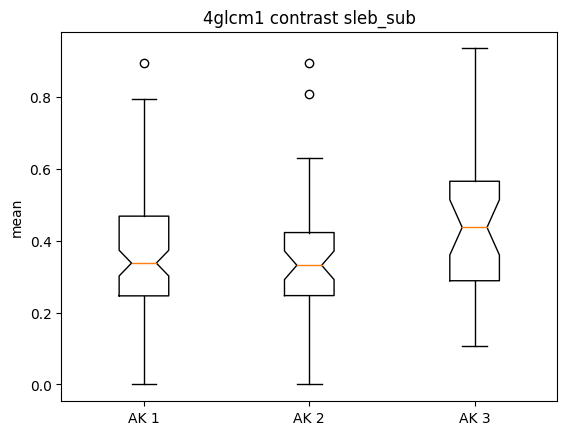

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.020     0.799    -0.055     0.096
 (0 - 2)     -0.083     0.068    -0.170     0.005
 (1 - 0)     -0.020     0.799    -0.096     0.055
 (1 - 2)     -0.103     0.035    -0.201    -0.006
 (2 - 0)      0.083     0.068    -0.005     0.170
 (2 - 1)      0.103     0.035     0.006     0.201

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9780406355857849, pvalue=0.1109069287776947)
ShapiroResult(statistic=0.912948727607727, pvalue=0.0016921886708587408)
ShapiroResult(statistic=0.9673942923545837, pvalue=0.4307684004306793)
One-Way ANOVA: There is a significant difference between groups (p = 0.0165).


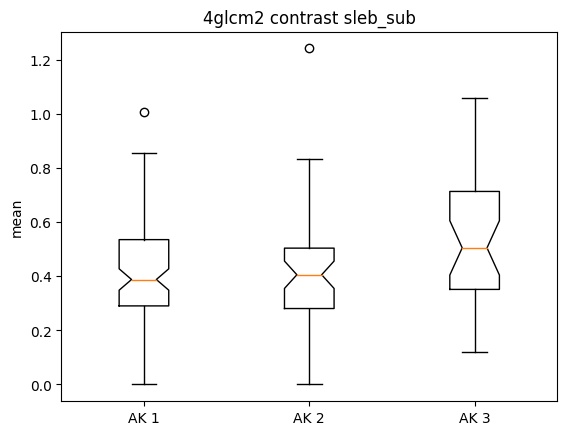

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.005     0.991    -0.085     0.095
 (0 - 2)     -0.120     0.019    -0.224    -0.016
 (1 - 0)     -0.005     0.991    -0.095     0.085
 (1 - 2)     -0.125     0.031    -0.241    -0.009
 (2 - 0)      0.120     0.019     0.016     0.224
 (2 - 1)      0.125     0.031     0.009     0.241

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9717315435409546, pvalue=0.03750503435730934)
ShapiroResult(statistic=0.8972738981246948, pvalue=0.0005140391294844449)
ShapiroResult(statistic=0.9600619077682495, pvalue=0.2757486402988434)
One-Way ANOVA: There is a significant difference between groups (p = 0.0031).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9717065691947937, pvalue=0.0373455286026001)
ShapiroResult(statistic=0.9086405038833618, pvalue=0.0012096749851480126)
ShapiroResult(statistic=0.9597411155700684, pvalue=0.2702276408672333)
One-Way ANOVA:

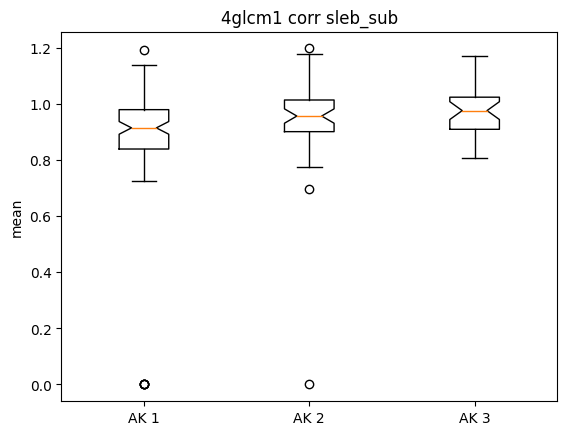

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.072     0.092    -0.152     0.009
 (0 - 2)     -0.106     0.021    -0.198    -0.013
 (1 - 0)      0.072     0.092    -0.009     0.152
 (1 - 2)     -0.034     0.717    -0.138     0.070
 (2 - 0)      0.106     0.021     0.013     0.198
 (2 - 1)      0.034     0.717    -0.070     0.138

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.7175410985946655, pvalue=3.1597144605627348e-12)
ShapiroResult(statistic=0.7967986464500427, pvalue=1.1009203717549099e-06)
ShapiroResult(statistic=0.9130042195320129, pvalue=0.013492556288838387)
One-Way ANOVA: There is a significant difference between groups (p = 0.0245).


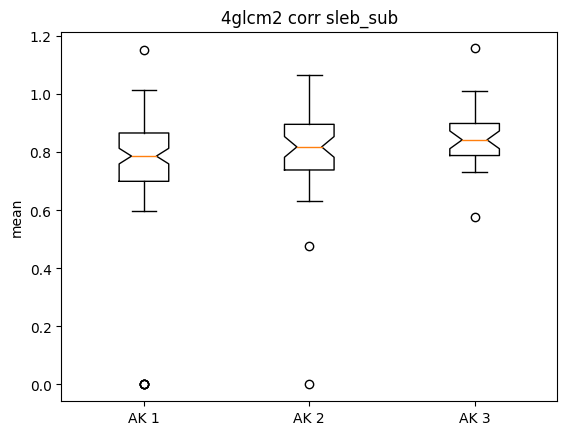

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.049     0.272    -0.124     0.026
 (0 - 2)     -0.096     0.025    -0.182    -0.010
 (1 - 0)      0.049     0.272    -0.026     0.124
 (1 - 2)     -0.047     0.482    -0.143     0.049
 (2 - 0)      0.096     0.025     0.010     0.182
 (2 - 1)      0.047     0.482    -0.049     0.143

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.7095041275024414, pvalue=2.0408921948267267e-12)
ShapiroResult(statistic=0.713769257068634, pvalue=2.3429086226656182e-08)
ShapiroResult(statistic=0.9830724000930786, pvalue=0.8822832107543945)
One-Way ANOVA: No significant difference between groups (p = 0.2148).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.769087553024292, pvalue=6.527733908967548e-11)
ShapiroResult(statistic=0.7661734223365784, pvalue=2.4191083980440453e-07)
ShapiroResult(statistic=0.9642173051834106, pvalue=0.35664698481559753)
One-Way ANOVA: 

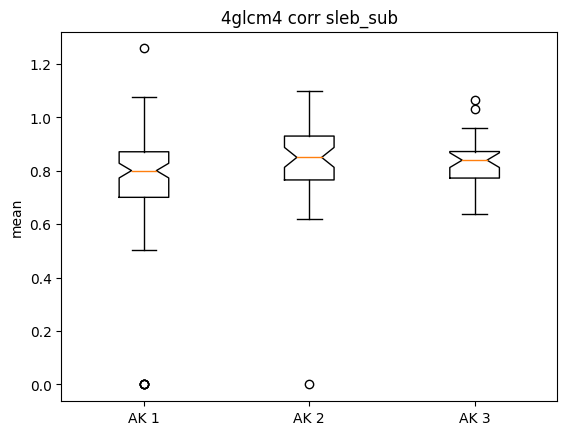

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.075     0.056    -0.152     0.002
 (0 - 2)     -0.077     0.107    -0.166     0.012
 (1 - 0)      0.075     0.056    -0.002     0.152
 (1 - 2)     -0.001     1.000    -0.100     0.098
 (2 - 0)      0.077     0.107    -0.012     0.166
 (2 - 1)      0.001     1.000    -0.098     0.100

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.4029862880706787, pvalue=7.455853662612044e-18)
ShapiroResult(statistic=0.40644192695617676, pvalue=1.153890026063531e-12)
ShapiroResult(statistic=0.9593108296394348, pvalue=0.2629760801792145)
One-Way ANOVA: No significant difference between groups (p = 0.3758).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.4092334508895874, pvalue=9.11416798386549e-18)
ShapiroResult(statistic=0.4175565838813782, pvalue=1.537197018980363e-12)
ShapiroResult(statistic=0.9643261432647705, pvalue=0.3590073585510254)
One-Way ANOVA: No

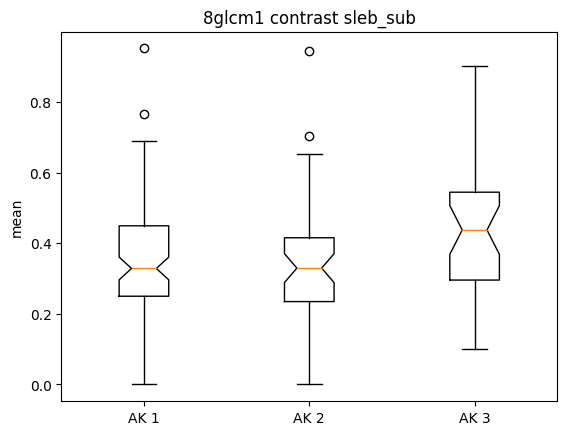

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.012     0.923    -0.061     0.085
 (0 - 2)     -0.096     0.021    -0.181    -0.012
 (1 - 0)     -0.012     0.923    -0.085     0.061
 (1 - 2)     -0.108     0.020    -0.203    -0.014
 (2 - 0)      0.096     0.021     0.012     0.181
 (2 - 1)      0.108     0.020     0.014     0.203

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9690958261489868, pvalue=0.023986751213669777)
ShapiroResult(statistic=0.8832799792289734, pvalue=0.00018939656729344279)
ShapiroResult(statistic=0.9742227792739868, pvalue=0.6230242848396301)
One-Way ANOVA: There is a significant difference between groups (p = 0.0052).


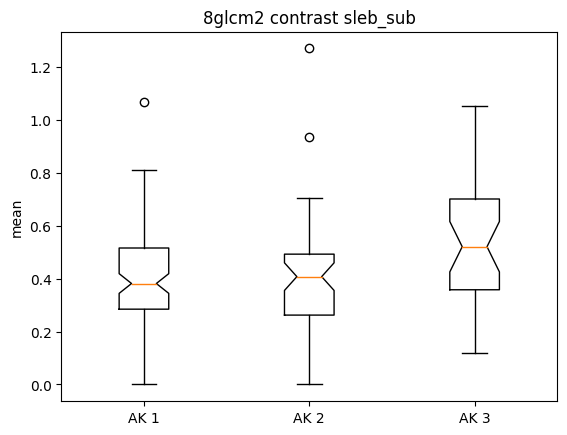

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.003     0.997    -0.092     0.086
 (0 - 2)     -0.138     0.005    -0.241    -0.035
 (1 - 0)      0.003     0.997    -0.086     0.092
 (1 - 2)     -0.135     0.016    -0.250    -0.020
 (2 - 0)      0.138     0.005     0.035     0.241
 (2 - 1)      0.135     0.016     0.020     0.250

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9673042297363281, pvalue=0.01776500791311264)
ShapiroResult(statistic=0.9200451374053955, pvalue=0.002983672311529517)
ShapiroResult(statistic=0.9665589332580566, pvalue=0.4102366268634796)
One-Way ANOVA: There is a significant difference between groups (p = 0.0048).


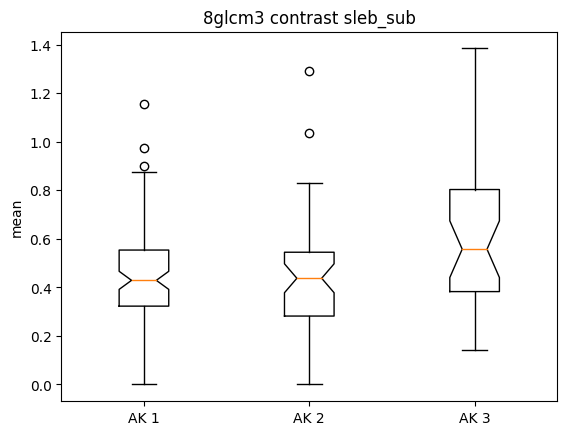

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.001     0.999    -0.100     0.102
 (0 - 2)     -0.156     0.005    -0.273    -0.039
 (1 - 0)     -0.001     0.999    -0.102     0.100
 (1 - 2)     -0.158     0.013    -0.288    -0.027
 (2 - 0)      0.156     0.005     0.039     0.273
 (2 - 1)      0.158     0.013     0.027     0.288

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9706426858901978, pvalue=0.03116011805832386)
ShapiroResult(statistic=0.8838608264923096, pvalue=0.0001971863821381703)
ShapiroResult(statistic=0.9711565971374512, pvalue=0.531924843788147)
One-Way ANOVA: There is a significant difference between groups (p = 0.0037).


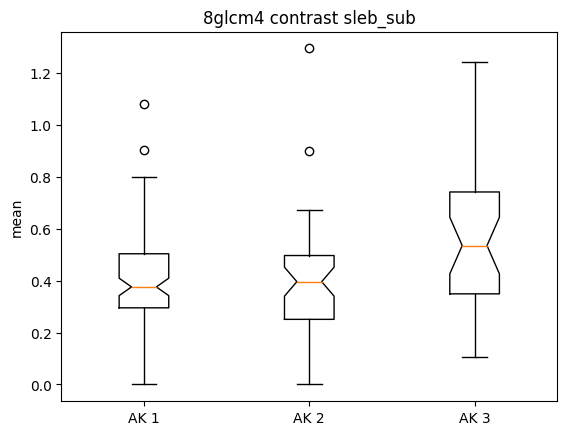

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.006     0.985    -0.085     0.098
 (0 - 2)     -0.143     0.005    -0.249    -0.038
 (1 - 0)     -0.006     0.985    -0.098     0.085
 (1 - 2)     -0.150     0.009    -0.268    -0.032
 (2 - 0)      0.143     0.005     0.038     0.249
 (2 - 1)      0.150     0.009     0.032     0.268

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.7287074327468872, pvalue=5.884077513423902e-12)
ShapiroResult(statistic=0.8513802886009216, pvalue=2.3662103558308445e-05)
ShapiroResult(statistic=0.9574486017227173, pvalue=0.2335832715034485)
One-Way ANOVA: There is a significant difference between groups (p = 0.0169).


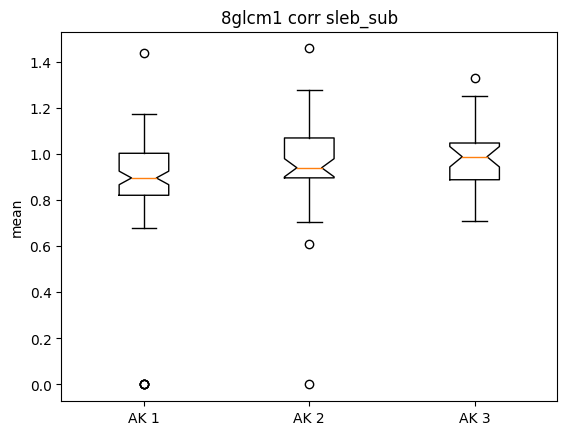

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.081     0.089    -0.171     0.009
 (0 - 2)     -0.110     0.036    -0.214    -0.006
 (1 - 0)      0.081     0.089    -0.009     0.171
 (1 - 2)     -0.029     0.823    -0.145     0.087
 (2 - 0)      0.110     0.036     0.006     0.214
 (2 - 1)      0.029     0.823    -0.087     0.145

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.8897488117218018, pvalue=8.291597737297707e-07)
ShapiroResult(statistic=0.9337587952613831, pvalue=0.009405320510268211)
ShapiroResult(statistic=0.960590660572052, pvalue=0.285068541765213)
One-Way ANOVA: No significant difference between groups (p = 0.1761).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.8451930284500122, pvalue=1.4953378979498666e-08)
ShapiroResult(statistic=0.8574175834655762, pvalue=3.442364322836511e-05)
ShapiroResult(statistic=0.9667338728904724, pvalue=0.414476215839386)
One-Way ANOVA: No si

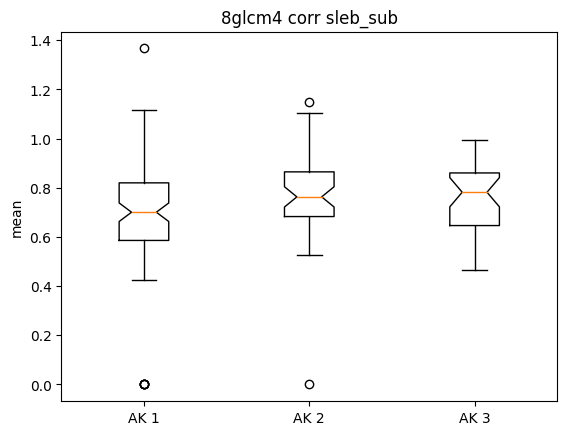

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.084     0.052    -0.169     0.001
 (0 - 2)     -0.069     0.217    -0.167     0.028
 (1 - 0)      0.084     0.052    -0.001     0.169
 (1 - 2)      0.015     0.946    -0.094     0.124
 (2 - 0)      0.069     0.217    -0.028     0.167
 (2 - 1)     -0.015     0.946    -0.124     0.094

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.40437018871307373, pvalue=7.793979454424732e-18)
ShapiroResult(statistic=0.41021448373794556, pvalue=1.2713247338549949e-12)
ShapiroResult(statistic=0.9592038989067078, pvalue=0.26120153069496155)
One-Way ANOVA: No significant difference between groups (p = 0.3859).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.4188094139099121, pvalue=1.2438213954925146e-17)
ShapiroResult(statistic=0.434839129447937, pvalue=2.419901301911609e-12)
ShapiroResult(statistic=0.9685725569725037, pvalue=0.4609624743461609)
One-Way ANOVA

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1879: UserWarning: Input d

ShapiroResult(statistic=0.8101089596748352, pvalue=1.024608509148095e-09)
ShapiroResult(statistic=0.8881139159202576, pvalue=0.0002656604629009962)
ShapiroResult(statistic=0.9311980605125427, pvalue=0.04229532554745674)
One-Way ANOVA: No significant difference between groups (p = 0.7659).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.803550660610199, pvalue=6.436746691207418e-10)
ShapiroResult(statistic=0.8822195529937744, pvalue=0.0001760019949870184)
ShapiroResult(statistic=0.949662983417511, pvalue=0.14098092913627625)
One-Way ANOVA: No significant difference between groups (p = 0.2733).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.8152475357055664, pvalue=1.4856973429289155e-09)
ShapiroResult(statistic=0.8913502097129822, pvalue=0.00033446887391619384)
ShapiroResult(statistic=0.9243983030319214, pvalue=0.02740967646241188)
One-Way ANOVA: No significant difference between groups (p = 0.7797).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9658507108688354, pv

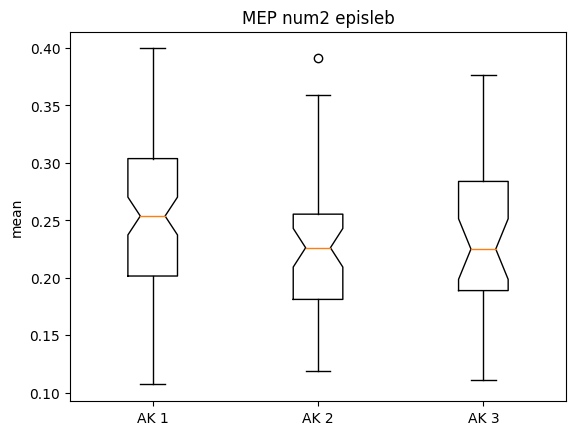

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.030     0.036     0.002     0.058
 (0 - 2)      0.015     0.537    -0.018     0.047
 (1 - 0)     -0.030     0.036    -0.058    -0.002
 (1 - 2)     -0.015     0.589    -0.051     0.021
 (2 - 0)     -0.015     0.537    -0.047     0.018
 (2 - 1)      0.015     0.589    -0.021     0.051

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.828525960445404, pvalue=4.006635023756644e-09)
ShapiroResult(statistic=0.8919541835784912, pvalue=0.0003492803662084043)
ShapiroResult(statistic=0.927078902721405, pvalue=0.03249264135956764)
One-Way ANOVA: No significant difference between groups (p = 0.77).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9740177392959595, pvalue=0.055485256016254425)
ShapiroResult(statistic=0.9617714285850525, pvalue=0.11905208975076675)
ShapiroResult(statistic=0.9743539094924927, pvalue=0.6270388960838318)
One-Way ANOVA: No signi

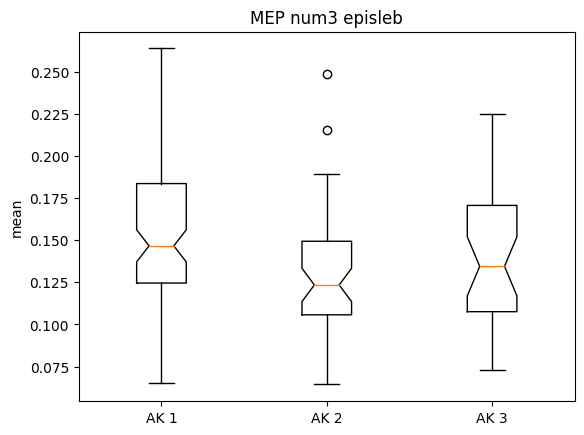

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.022     0.009     0.005     0.040
 (0 - 2)      0.012     0.332    -0.008     0.033
 (1 - 0)     -0.022     0.009    -0.040    -0.005
 (1 - 2)     -0.010     0.557    -0.033     0.013
 (2 - 0)     -0.012     0.332    -0.033     0.008
 (2 - 1)      0.010     0.557    -0.013     0.033

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.8243046998977661, pvalue=2.9077917851338952e-09)
ShapiroResult(statistic=0.8834939002990723, pvalue=0.00019222732225898653)
ShapiroResult(statistic=0.9096642732620239, pvalue=0.011012304574251175)
One-Way ANOVA: No significant difference between groups (p = 0.7681).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9923762083053589, pvalue=0.8683316111564636)
ShapiroResult(statistic=0.9828683137893677, pvalue=0.7012151479721069)
ShapiroResult(statistic=0.9473978877067566, pvalue=0.12154503166675568)
One-Way ANOVA: The

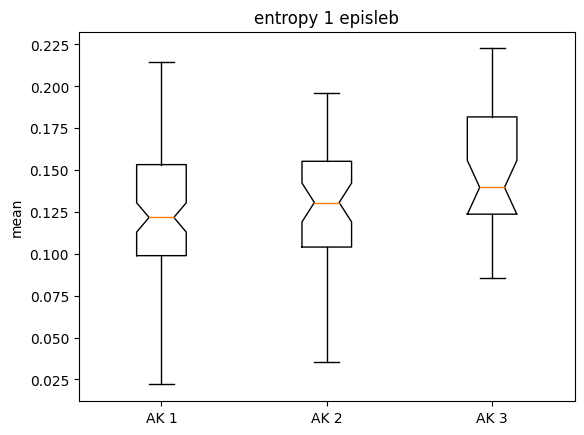

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.003     0.870    -0.019     0.012
 (0 - 2)     -0.023     0.008    -0.042    -0.005
 (1 - 0)      0.003     0.870    -0.012     0.019
 (1 - 2)     -0.020     0.057    -0.040     0.000
 (2 - 0)      0.023     0.008     0.005     0.042
 (2 - 1)      0.020     0.057    -0.000     0.040

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.8128817081451416, pvalue=1.2510610325477955e-09)
ShapiroResult(statistic=0.8900211453437805, pvalue=0.00030416910885833204)
ShapiroResult(statistic=0.9280297756195068, pvalue=0.03452356904745102)
One-Way ANOVA: No significant difference between groups (p = 0.7756).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.2606644630432129, pvalue=1.1202857295096282e-19)
ShapiroResult(statistic=0.2613699436187744, pvalue=3.724647814565968e-14)
ShapiroResult(statistic=0.1718098521232605, pvalue=2.79498494661079e-12)
One-Way ANO

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


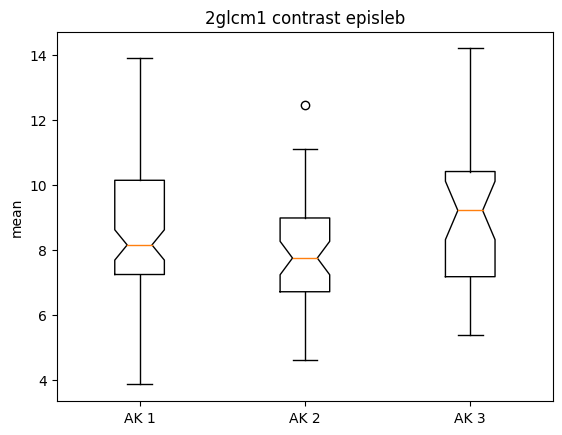

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.770     0.093    -0.098     1.638
 (0 - 2)     -0.399     0.614    -1.402     0.603
 (1 - 0)     -0.770     0.093    -1.638     0.098
 (1 - 2)     -1.169     0.038    -2.289    -0.050
 (2 - 0)      0.399     0.614    -0.603     1.402
 (2 - 1)      1.169     0.038     0.050     2.289

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9904204607009888, pvalue=0.7301880121231079)
ShapiroResult(statistic=0.9764722585678101, pvalue=0.44154682755470276)
ShapiroResult(statistic=0.9645383358001709, pvalue=0.36364635825157166)
One-Way ANOVA: No significant difference between groups (p = 0.1519).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9871810078620911, pvalue=0.4876317083835602)
ShapiroResult(statistic=0.9589813947677612, pvalue=0.09182440489530563)
ShapiroResult(statistic=0.9669686555862427, pvalue=0.4202158749103546)
One-Way ANOVA: No signific

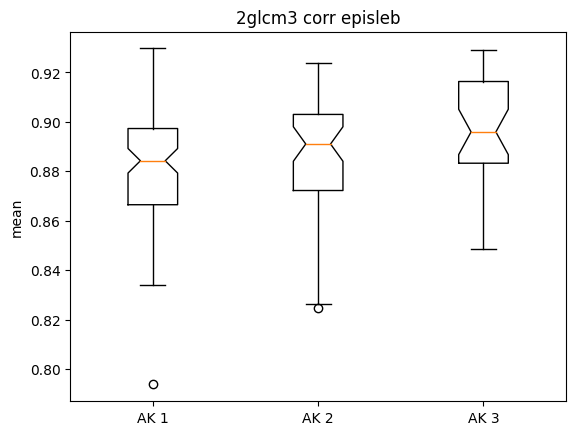

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.005     0.431    -0.015     0.005
 (0 - 2)     -0.016     0.003    -0.027    -0.004
 (1 - 0)      0.005     0.431    -0.005     0.015
 (1 - 2)     -0.010     0.119    -0.023     0.002
 (2 - 0)      0.016     0.003     0.004     0.027
 (2 - 1)      0.010     0.119    -0.002     0.023

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9804767966270447, pvalue=0.16812622547149658)
ShapiroResult(statistic=0.9187568426132202, pvalue=0.0026881592348217964)
ShapiroResult(statistic=0.9555454254150391, pvalue=0.206697478890419)
One-Way ANOVA: There is a significant difference between groups (p = 0.0041).


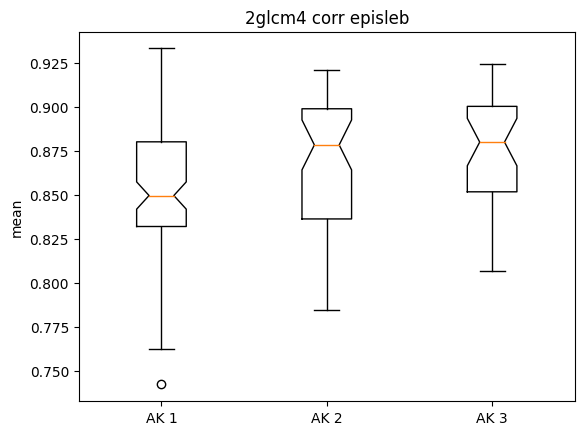

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.014     0.083    -0.029     0.001
 (0 - 2)     -0.023     0.006    -0.040    -0.006
 (1 - 0)      0.014     0.083    -0.001     0.029
 (1 - 2)     -0.009     0.506    -0.029     0.010
 (2 - 0)      0.023     0.006     0.006     0.040
 (2 - 1)      0.009     0.506    -0.010     0.029

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9852282404899597, pvalue=0.3651728630065918)
ShapiroResult(statistic=0.9458217620849609, pvalue=0.0273289792239666)
ShapiroResult(statistic=0.959448516368866, pvalue=0.2652773857116699)
One-Way ANOVA: No significant difference between groups (p = 0.2311).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9852461814880371, pvalue=0.3661845326423645)
ShapiroResult(statistic=0.9482051134109497, pvalue=0.03393455222249031)
ShapiroResult(statistic=0.9608163833618164, pvalue=0.2891315221786499)
One-Way ANOVA: No significant

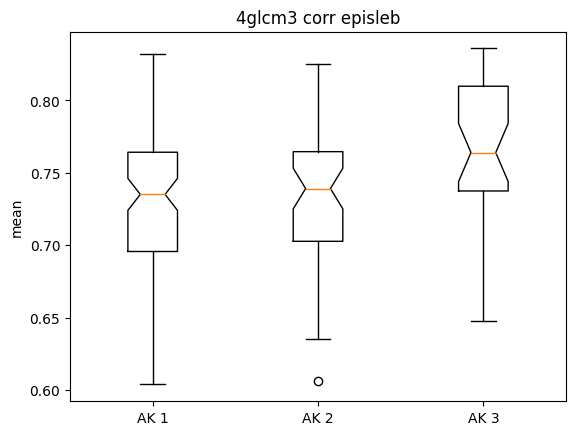

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.006     0.756    -0.026     0.014
 (0 - 2)     -0.037     0.001    -0.061    -0.014
 (1 - 0)      0.006     0.756    -0.014     0.026
 (1 - 2)     -0.031     0.015    -0.057    -0.005
 (2 - 0)      0.037     0.001     0.014     0.061
 (2 - 1)      0.031     0.015     0.005     0.057

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9859221577644348, pvalue=0.4058540463447571)
ShapiroResult(statistic=0.9424000382423401, pvalue=0.02009071595966816)
ShapiroResult(statistic=0.9650701284408569, pvalue=0.3754848837852478)
One-Way ANOVA: There is a significant difference between groups (p = 0.0032).


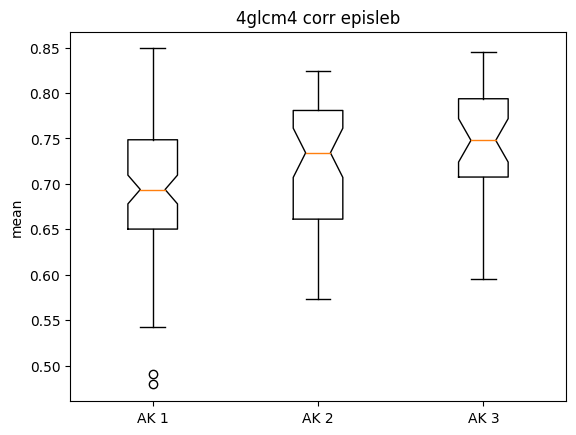

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.023     0.158    -0.053     0.007
 (0 - 2)     -0.048     0.003    -0.083    -0.014
 (1 - 0)      0.023     0.158    -0.007     0.053
 (1 - 2)     -0.025     0.273    -0.064     0.013
 (2 - 0)      0.048     0.003     0.014     0.083
 (2 - 1)      0.025     0.273    -0.013     0.064

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.984926700592041, pvalue=0.34850308299064636)
ShapiroResult(statistic=0.9463182091712952, pvalue=0.02858547866344452)
ShapiroResult(statistic=0.9600042700767517, pvalue=0.27474918961524963)
One-Way ANOVA: No significant difference between groups (p = 0.2432).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9849743843078613, pvalue=0.3510980010032654)
ShapiroResult(statistic=0.9508060216903687, pvalue=0.043056800961494446)
ShapiroResult(statistic=0.963019609451294, pvalue=0.33149635791778564)
One-Way ANOVA: No signifi

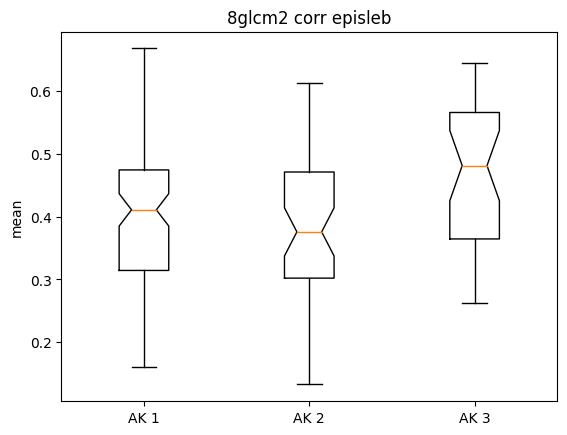

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.022     0.532    -0.027     0.071
 (0 - 2)     -0.054     0.064    -0.110     0.002
 (1 - 0)     -0.022     0.532    -0.071     0.027
 (1 - 2)     -0.076     0.013    -0.139    -0.013
 (2 - 0)      0.054     0.064    -0.002     0.110
 (2 - 1)      0.076     0.013     0.013     0.139

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9803968071937561, pvalue=0.1658627837896347)
ShapiroResult(statistic=0.9609758853912354, pvalue=0.11055958271026611)
ShapiroResult(statistic=0.9282824993133545, pvalue=0.03508523851633072)
One-Way ANOVA: There is a significant difference between groups (p = 0.0005).


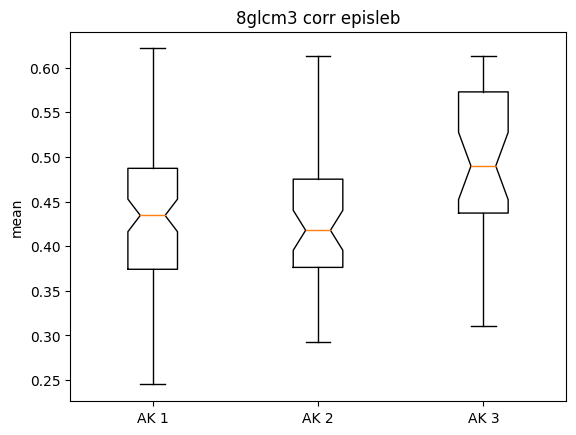

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.002     0.988    -0.038     0.033
 (0 - 2)     -0.067     0.000    -0.107    -0.026
 (1 - 0)      0.002     0.988    -0.033     0.038
 (1 - 2)     -0.064     0.003    -0.110    -0.019
 (2 - 0)      0.067     0.000     0.026     0.107
 (2 - 1)      0.064     0.003     0.019     0.110

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9871709942817688, pvalue=0.48694443702697754)
ShapiroResult(statistic=0.9763191342353821, pvalue=0.4361076056957245)
ShapiroResult(statistic=0.9712231755256653, pvalue=0.5338322520256042)
One-Way ANOVA: There is a significant difference between groups (p = 0.0071).


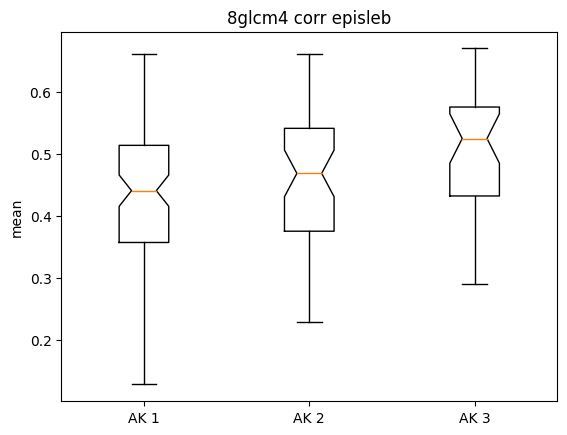

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.027     0.356    -0.074     0.020
 (0 - 2)     -0.072     0.005    -0.126    -0.018
 (1 - 0)      0.027     0.356    -0.020     0.074
 (1 - 2)     -0.045     0.187    -0.105     0.015
 (2 - 0)      0.072     0.005     0.018     0.126
 (2 - 1)      0.045     0.187    -0.015     0.105

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9841221570968628, pvalue=0.3069930672645569)
ShapiroResult(statistic=0.9464099407196045, pvalue=0.02882419526576996)
ShapiroResult(statistic=0.9603354334831238, pvalue=0.2805361747741699)
One-Way ANOVA: No significant difference between groups (p = 0.2609).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9861519932746887, pvalue=0.4200332760810852)
ShapiroResult(statistic=0.9568478465080261, pvalue=0.07529056072235107)
ShapiroResult(statistic=0.9665703773498535, pvalue=0.41051337122917175)
One-Way ANOVA: No signific

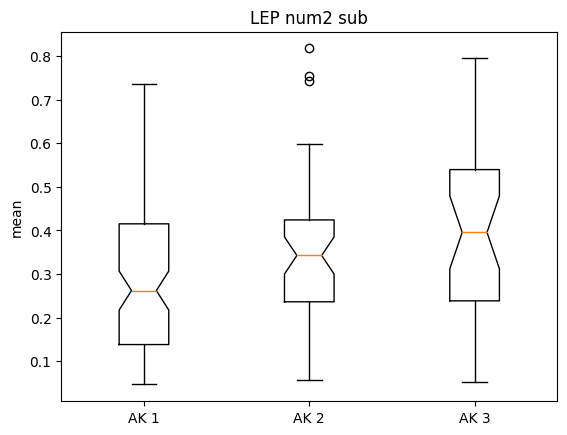

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.057     0.181    -0.133     0.019
 (0 - 2)     -0.103     0.017    -0.191    -0.015
 (1 - 0)      0.057     0.181    -0.019     0.133
 (1 - 2)     -0.046     0.509    -0.144     0.052
 (2 - 0)      0.103     0.017     0.015     0.191
 (2 - 1)      0.046     0.509    -0.052     0.144

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9197329878807068, pvalue=2.1661020582541823e-05)
ShapiroResult(statistic=0.9733693599700928, pvalue=0.3406809866428375)
ShapiroResult(statistic=0.9437420964241028, pvalue=0.09564289450645447)
One-Way ANOVA: There is a significant difference between groups (p = 0.0186).


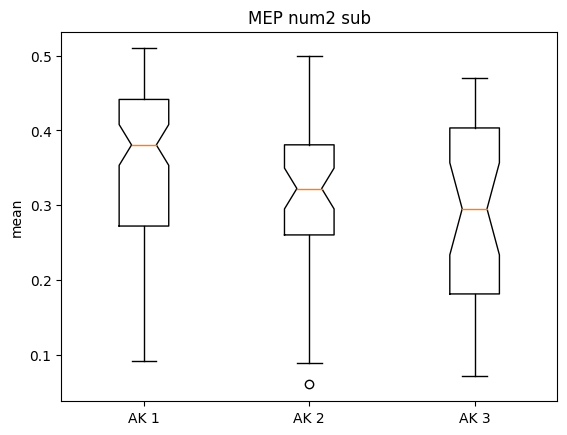

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.031     0.268    -0.016     0.078
 (0 - 2)      0.063     0.018     0.009     0.117
 (1 - 0)     -0.031     0.268    -0.078     0.016
 (1 - 2)      0.032     0.426    -0.028     0.092
 (2 - 0)     -0.063     0.018    -0.117    -0.009
 (2 - 1)     -0.032     0.426    -0.092     0.028

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.7804436683654785, pvalue=1.3511025631629536e-10)
ShapiroResult(statistic=0.7900097370147705, pvalue=7.781220006108924e-07)
ShapiroResult(statistic=0.6892476081848145, pvalue=6.02697468821134e-07)
One-Way ANOVA: There is a significant difference between groups (p = 0.0061).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9469709396362305, pvalue=0.0007568626897409558)
ShapiroResult(statistic=0.9823280572891235, pvalue=0.6779035925865173)
ShapiroResult(statistic=0.9568462371826172, pvalue=0.22474068403244019)
One-Way 

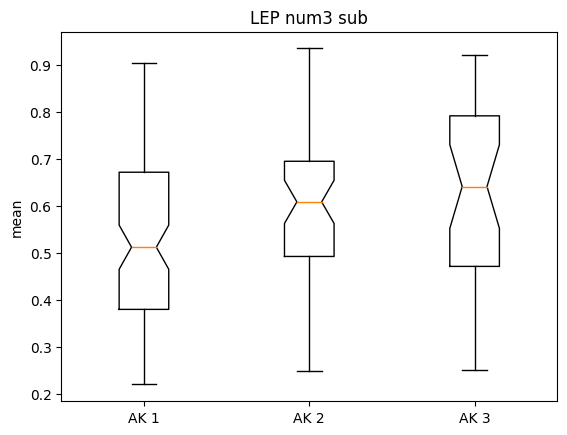

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.068     0.086    -0.144     0.007
 (0 - 2)     -0.106     0.013    -0.193    -0.018
 (1 - 0)      0.068     0.086    -0.007     0.144
 (1 - 2)     -0.037     0.640    -0.135     0.060
 (2 - 0)      0.106     0.013     0.018     0.193
 (2 - 1)      0.037     0.640    -0.060     0.135

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.956107497215271, pvalue=0.002945995656773448)
ShapiroResult(statistic=0.9694328308105469, pvalue=0.24074482917785645)
ShapiroResult(statistic=0.9268016815185547, pvalue=0.031924229115247726)
One-Way ANOVA: There is a significant difference between groups (p = 0.0125).


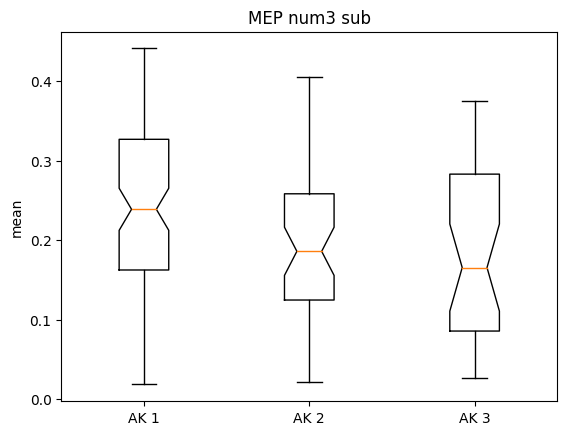

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.040     0.091    -0.005     0.085
 (0 - 2)      0.058     0.024     0.006     0.110
 (1 - 0)     -0.040     0.091    -0.085     0.005
 (1 - 2)      0.018     0.740    -0.040     0.076
 (2 - 0)     -0.058     0.024    -0.110    -0.006
 (2 - 1)     -0.018     0.740    -0.076     0.040

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.46540653705596924, pvalue=5.9784948610858e-17)
ShapiroResult(statistic=0.551020622253418, pvalue=6.787362338833702e-11)
ShapiroResult(statistic=0.43457430601119995, pvalue=5.390449753228665e-10)
One-Way ANOVA: There is a significant difference between groups (p = 0.0443).


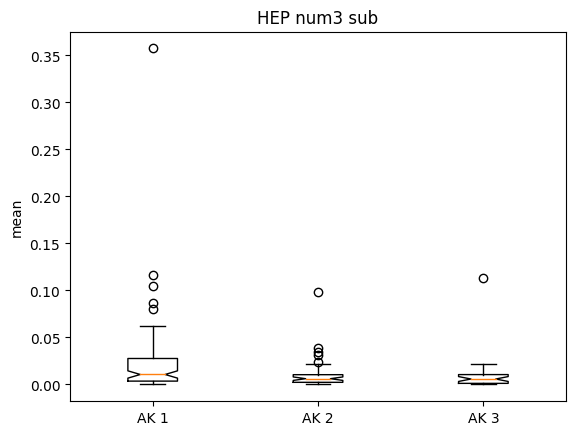

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.013     0.081    -0.001     0.026
 (0 - 2)      0.013     0.152    -0.003     0.028
 (1 - 0)     -0.013     0.081    -0.026     0.001
 (1 - 2)     -0.000     1.000    -0.018     0.018
 (2 - 0)     -0.013     0.152    -0.028     0.003
 (2 - 1)      0.000     1.000    -0.018     0.018

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.7663847804069519, pvalue=5.5095067397203934e-11)
ShapiroResult(statistic=0.6419785022735596, pvalue=1.4341743348467162e-09)
ShapiroResult(statistic=0.5095345973968506, pvalue=3.2736511279551905e-09)
One-Way ANOVA: There is a significant difference between groups (p = 0.0028).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.5786306858062744, pvalue=4.346120546647658e-15)
ShapiroResult(statistic=0.4882761836051941, pvalue=1.0500894424836371e-11)
ShapiroResult(statistic=0.35288918018341064, pvalue=8.998418676853248e-11

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:3189: RuntimeWarning: invalid value encountered in scalar divide
  W = numer / denom
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4167: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


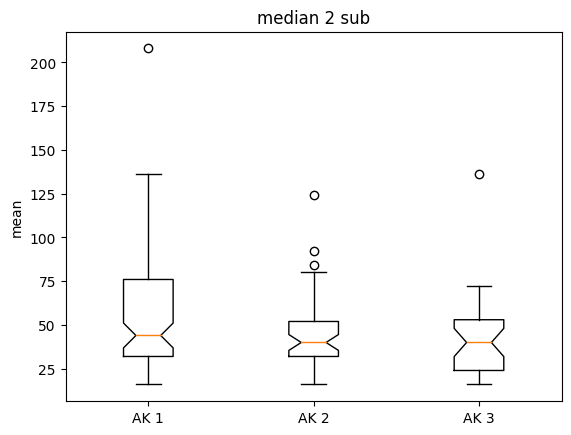

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     11.838     0.038     0.529    23.146
 (0 - 2)     14.671     0.023     1.619    27.723
 (1 - 0)    -11.838     0.038   -23.146    -0.529
 (1 - 2)      2.833     0.890   -11.740    17.407
 (2 - 0)    -14.671     0.023   -27.723    -1.619
 (2 - 1)     -2.833     0.890   -17.407    11.740

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9777897596359253, pvalue=0.10622559487819672)
ShapiroResult(statistic=0.9797897934913635, pvalue=0.569977343082428)
ShapiroResult(statistic=0.9473573565483093, pvalue=0.12122263014316559)
One-Way ANOVA: There is a significant difference between groups (p = 0.0025).


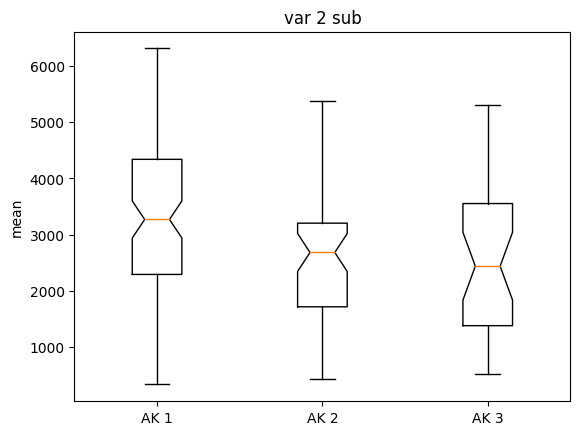

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)    644.892     0.020    81.862  1207.923
 (0 - 2)    807.279     0.010   157.431  1457.127
 (1 - 0)   -644.892     0.020 -1207.923   -81.862
 (1 - 2)    162.386     0.857  -563.211   887.984
 (2 - 0)   -807.279     0.010 -1457.127  -157.431
 (2 - 1)   -162.386     0.857  -887.984   563.211

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9462961554527283, pvalue=0.0006871139630675316)
ShapiroResult(statistic=0.9806762933731079, pvalue=0.6070922613143921)
ShapiroResult(statistic=0.954526424407959, pvalue=0.1935242861509323)
One-Way ANOVA: There is a significant difference between groups (p = 0.0062).


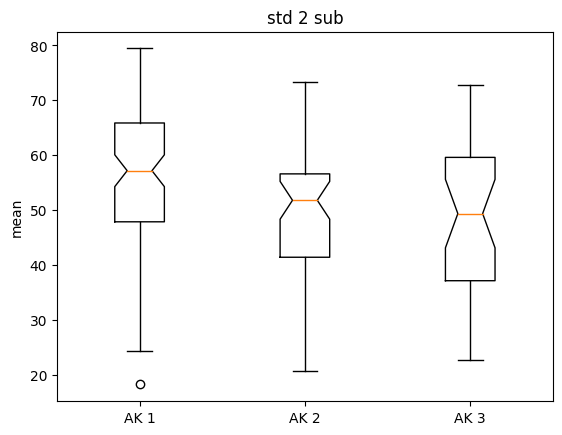

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      5.711     0.047     0.055    11.366
 (0 - 2)      7.690     0.016     1.162    14.218
 (1 - 0)     -5.711     0.047   -11.366    -0.055
 (1 - 2)      1.980     0.797    -5.309     9.269
 (2 - 0)     -7.690     0.016   -14.218    -1.162
 (2 - 1)     -1.980     0.797    -9.269     5.309

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.8502864837646484, pvalue=2.2760408668887067e-08)
ShapiroResult(statistic=0.8440701961517334, pvalue=1.5188890756689943e-05)
ShapiroResult(statistic=0.7268418669700623, pvalue=2.2476681351690786e-06)
One-Way ANOVA: There is a significant difference between groups (p = 0.0141).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9535519480705261, pvalue=0.001995206344872713)
ShapiroResult(statistic=0.9321650266647339, pvalue=0.00820103194564581)
ShapiroResult(statistic=0.8939482569694519, pvalue=0.004358995705842972)
One-

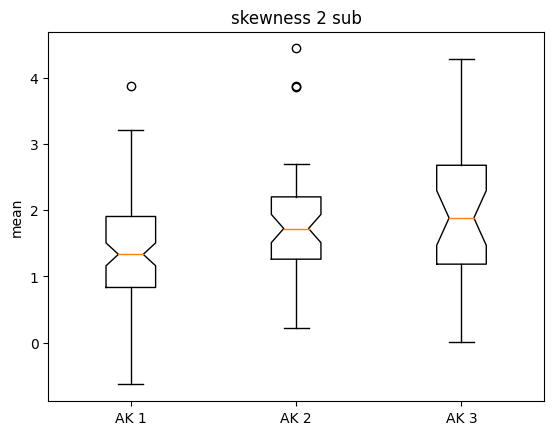

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.350     0.066    -0.718     0.018
 (0 - 2)     -0.576     0.005    -1.001    -0.151
 (1 - 0)      0.350     0.066    -0.018     0.718
 (1 - 2)     -0.226     0.499    -0.700     0.248
 (2 - 0)      0.576     0.005     0.151     1.001
 (2 - 1)      0.226     0.499    -0.248     0.700

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.7749357223510742, pvalue=9.46514949751176e-11)
ShapiroResult(statistic=0.7132307887077332, pvalue=2.290685863215458e-08)
ShapiroResult(statistic=0.7996830344200134, pvalue=4.020207416033372e-05)
One-Way ANOVA: There is a significant difference between groups (p = 0.0117).


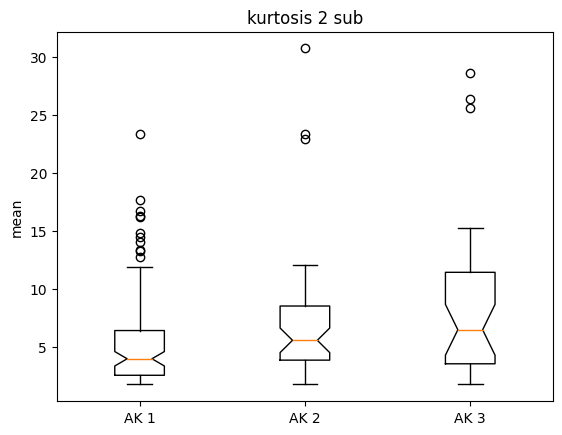

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -1.530     0.235    -3.747     0.687
 (0 - 2)     -3.148     0.011    -5.707    -0.590
 (1 - 0)      1.530     0.235    -0.687     3.747
 (1 - 2)     -1.618     0.376    -4.475     1.239
 (2 - 0)      3.148     0.011     0.590     5.707
 (2 - 1)      1.618     0.376    -1.239     4.475

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.7285736799240112, pvalue=5.839788288358738e-12)
ShapiroResult(statistic=0.5076317191123962, pvalue=1.8346508340316703e-11)
ShapiroResult(statistic=0.35784655809402466, pvalue=9.985504090259667e-11)
One-Way ANOVA: There is a significant difference between groups (p = 0.0028).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9500346183776855, pvalue=0.0011813355376943946)
ShapiroResult(statistic=0.946534276008606, pvalue=0.02915087714791298)
ShapiroResult(statistic=0.9043068885803223, pvalue=0.007986151613295078)
One-W

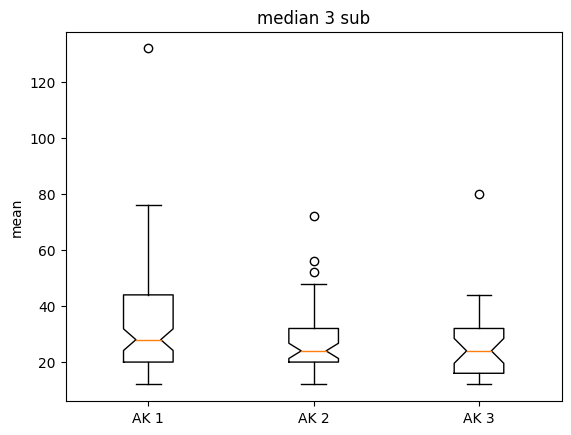

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      6.899     0.038     0.292    13.506
 (0 - 2)      8.316     0.029     0.690    15.941
 (1 - 0)     -6.899     0.038   -13.506    -0.292
 (1 - 2)      1.417     0.918    -7.098     9.931
 (2 - 0)     -8.316     0.029   -15.941    -0.690
 (2 - 1)     -1.417     0.918    -9.931     7.098

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.8622817397117615, pvalue=6.346266445689253e-08)
ShapiroResult(statistic=0.881862461566925, pvalue=0.0001717206760076806)
ShapiroResult(statistic=0.8117908239364624, pvalue=6.843391747679561e-05)
One-Way ANOVA: There is a significant difference between groups (p = 0.0034).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9797797799110413, pvalue=0.1493559032678604)
ShapiroResult(statistic=0.9783980846405029, pvalue=0.5138161778450012)
ShapiroResult(statistic=0.9399240016937256, pvalue=0.07449600100517273)
One-Way ANOV

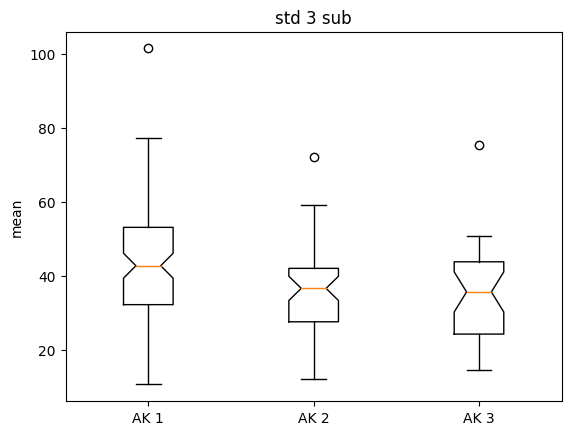

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      6.931     0.021     0.840    13.022
 (0 - 2)      8.399     0.015     1.369    15.429
 (1 - 0)     -6.931     0.021   -13.022    -0.840
 (1 - 2)      1.468     0.898    -6.382     9.317
 (2 - 0)     -8.399     0.015   -15.429    -1.369
 (2 - 1)     -1.468     0.898    -9.317     6.382

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9247119426727295, pvalue=3.951033795601688e-05)
ShapiroResult(statistic=0.8630885481834412, pvalue=4.932486262987368e-05)
ShapiroResult(statistic=0.8999637961387634, pvalue=0.006180073134601116)
One-Way ANOVA: There is a significant difference between groups (p = 0.0223).


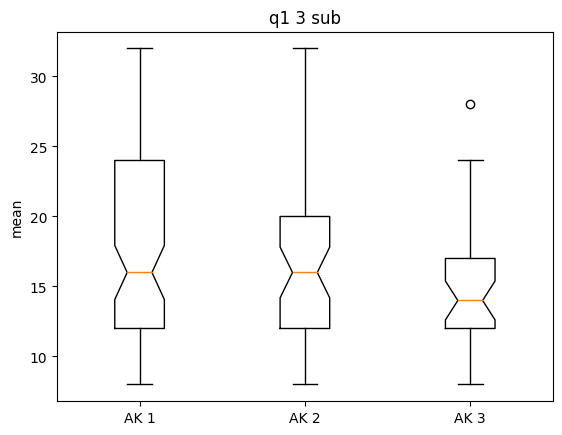

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      1.731     0.201    -0.650     4.111
 (0 - 2)      3.022     0.027     0.275     5.770
 (1 - 0)     -1.731     0.201    -4.111     0.650
 (1 - 2)      1.292     0.581    -1.776     4.360
 (2 - 0)     -3.022     0.027    -5.770    -0.275
 (2 - 1)     -1.292     0.581    -4.360     1.776

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.8737766742706299, pvalue=1.7862822687675362e-07)
ShapiroResult(statistic=0.8774608373641968, pvalue=0.00012712448369711637)
ShapiroResult(statistic=0.8213748931884766, pvalue=0.00010558698704699054)
One-Way ANOVA: There is a significant difference between groups (p = 0.0054).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9688848257064819, pvalue=0.023149708285927773)
ShapiroResult(statistic=0.9687735438346863, pvalue=0.22683559358119965)
ShapiroResult(statistic=0.9691986441612244, pvalue=0.47757723927497864)
One-W

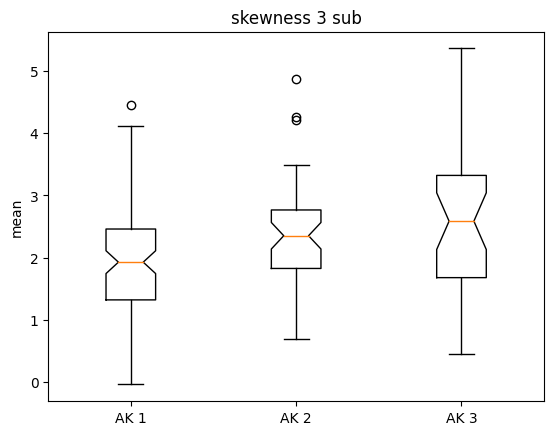

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.377     0.061    -0.767     0.014
 (0 - 2)     -0.633     0.003    -1.083    -0.182
 (1 - 0)      0.377     0.061    -0.014     0.767
 (1 - 2)     -0.256     0.452    -0.759     0.247
 (2 - 0)      0.633     0.003     0.182     1.083
 (2 - 1)      0.256     0.452    -0.247     0.759

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.8153306245803833, pvalue=1.4947328930148274e-09)
ShapiroResult(statistic=0.8279394507408142, pvalue=5.932677140663145e-06)
ShapiroResult(statistic=0.8511360883712769, pvalue=0.00043909315718337893)
One-Way ANOVA: There is a significant difference between groups (p = 0.0055).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.944193422794342, pvalue=0.0005099634872749448)
ShapiroResult(statistic=0.9336599707603455, pvalue=0.009325508028268814)
ShapiroResult(statistic=0.8490993976593018, pvalue=0.0003966699878219515)
One

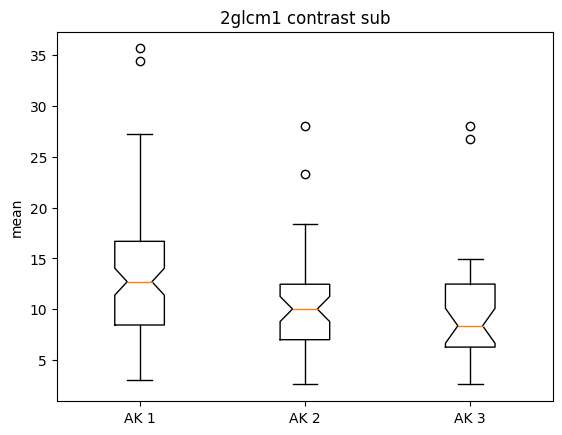

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      2.499     0.045     0.047     4.951
 (0 - 2)      3.229     0.021     0.399     6.059
 (1 - 0)     -2.499     0.045    -4.951    -0.047
 (1 - 2)      0.730     0.849    -2.430     3.889
 (2 - 0)     -3.229     0.021    -6.059    -0.399
 (2 - 1)     -0.730     0.849    -3.889     2.430

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9396819472312927, pvalue=0.0002731716085691005)
ShapiroResult(statistic=0.9688270092010498, pvalue=0.22793500125408173)
ShapiroResult(statistic=0.8336272835731506, pvalue=0.00018702745728660375)
One-Way ANOVA: There is a significant difference between groups (p = 0.0091).


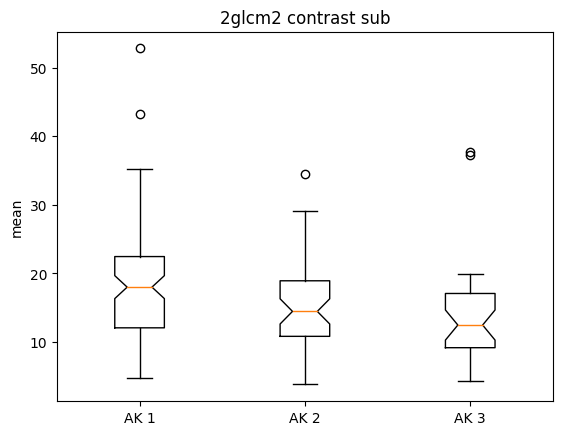

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      3.071     0.064    -0.139     6.281
 (0 - 2)      4.232     0.021     0.527     7.937
 (1 - 0)     -3.071     0.064    -6.281     0.139
 (1 - 2)      1.161     0.785    -2.976     5.298
 (2 - 0)     -4.232     0.021    -7.937    -0.527
 (2 - 1)     -1.161     0.785    -5.298     2.976

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9324998259544373, pvalue=0.00010536016634432599)
ShapiroResult(statistic=0.9439365267753601, pvalue=0.023056548088788986)
ShapiroResult(statistic=0.8383257389068604, pvalue=0.00023414127645082772)
One-Way ANOVA: There is a significant difference between groups (p = 0.0032).


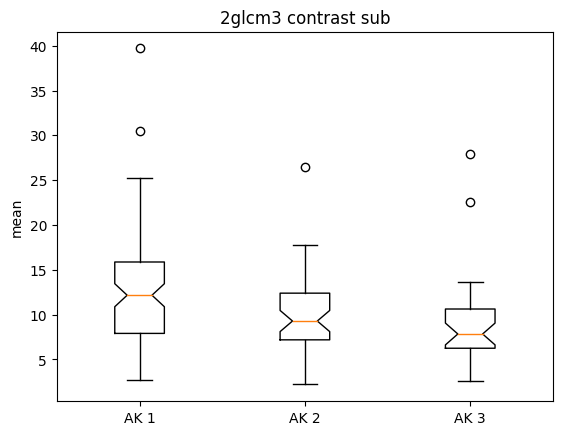

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      2.571     0.030     0.199     4.942
 (0 - 2)      3.417     0.010     0.680     6.154
 (1 - 0)     -2.571     0.030    -4.942    -0.199
 (1 - 2)      0.846     0.790    -2.210     3.902
 (2 - 0)     -3.417     0.010    -6.154    -0.680
 (2 - 1)     -0.846     0.790    -3.902     2.210

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9487135410308838, pvalue=0.0009737503132782876)
ShapiroResult(statistic=0.94230717420578, pvalue=0.01992470771074295)
ShapiroResult(statistic=0.867117166519165, pvalue=0.0009969526436179876)
One-Way ANOVA: There is a significant difference between groups (p = 0.0061).


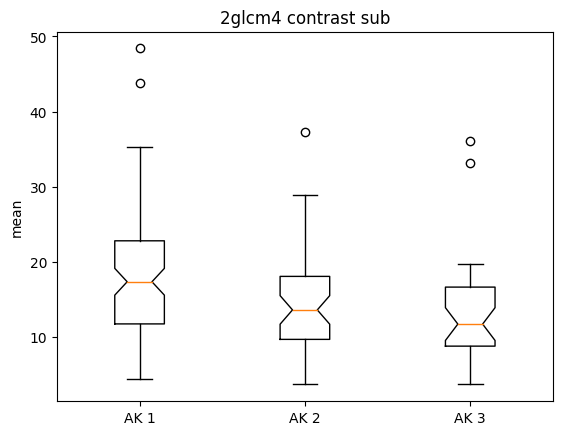

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      3.221     0.045     0.054     6.388
 (0 - 2)      4.292     0.017     0.636     7.947
 (1 - 0)     -3.221     0.045    -6.388    -0.054
 (1 - 2)      1.071     0.809    -3.011     5.152
 (2 - 0)     -4.292     0.017    -7.947    -0.636
 (2 - 1)     -1.071     0.809    -5.152     3.011

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9863789677619934, pvalue=0.4343714714050293)
ShapiroResult(statistic=0.9759092330932617, pvalue=0.42177465558052063)
ShapiroResult(statistic=0.9599865078926086, pvalue=0.27444174885749817)
One-Way ANOVA: No significant difference between groups (p = 0.5357).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9889744520187378, pvalue=0.6188215017318726)
ShapiroResult(statistic=0.9777858257293701, pvalue=0.4900986850261688)
ShapiroResult(statistic=0.922096848487854, pvalue=0.02370840311050415)
One-Way ANOVA: No significa

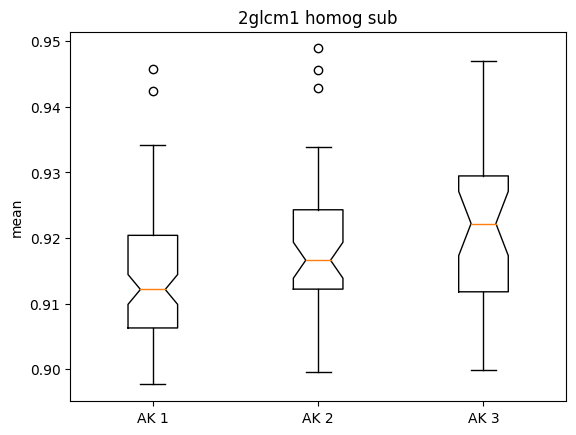

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.004     0.088    -0.009     0.000
 (0 - 2)     -0.008     0.002    -0.013    -0.002
 (1 - 0)      0.004     0.088    -0.000     0.009
 (1 - 2)     -0.003     0.343    -0.009     0.002
 (2 - 0)      0.008     0.002     0.002     0.013
 (2 - 1)      0.003     0.343    -0.002     0.009

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9393578767776489, pvalue=0.00026139788678847253)
ShapiroResult(statistic=0.9325771331787109, pvalue=0.008496014401316643)
ShapiroResult(statistic=0.9593150615692139, pvalue=0.26304683089256287)
One-Way ANOVA: There is a significant difference between groups (p = 0.0017).


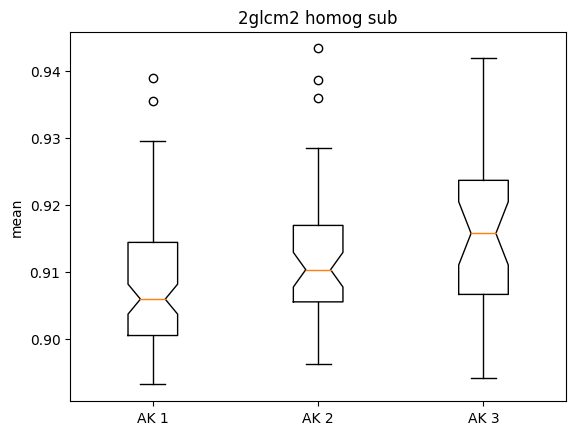

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.004     0.121    -0.008     0.001
 (0 - 2)     -0.008     0.002    -0.013    -0.002
 (1 - 0)      0.004     0.121    -0.001     0.008
 (1 - 2)     -0.004     0.248    -0.010     0.002
 (2 - 0)      0.008     0.002     0.002     0.013
 (2 - 1)      0.004     0.248    -0.002     0.010

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9523496031761169, pvalue=0.0016652954509481788)
ShapiroResult(statistic=0.9538659453392029, pvalue=0.0570947602391243)
ShapiroResult(statistic=0.9696301817893982, pvalue=0.4892514944076538)
One-Way ANOVA: There is a significant difference between groups (p = 0.0015).


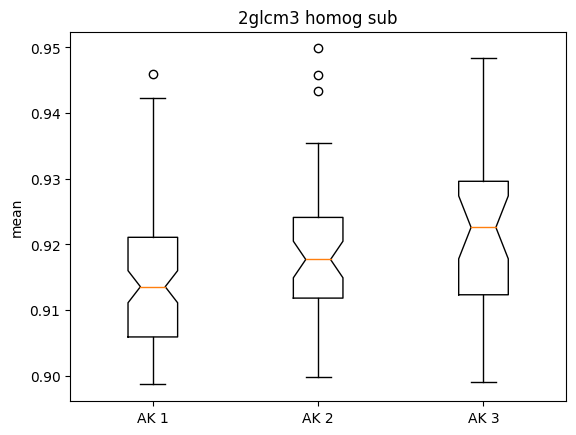

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.004     0.086    -0.009     0.000
 (0 - 2)     -0.008     0.002    -0.013    -0.003
 (1 - 0)      0.004     0.086    -0.000     0.009
 (1 - 2)     -0.004     0.312    -0.010     0.002
 (2 - 0)      0.008     0.002     0.003     0.013
 (2 - 1)      0.004     0.312    -0.002     0.010

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9393531680107117, pvalue=0.0002612302196212113)
ShapiroResult(statistic=0.9445473551750183, pvalue=0.024359002709388733)
ShapiroResult(statistic=0.96236652135849, pvalue=0.31841719150543213)
One-Way ANOVA: There is a significant difference between groups (p = 0.0014).


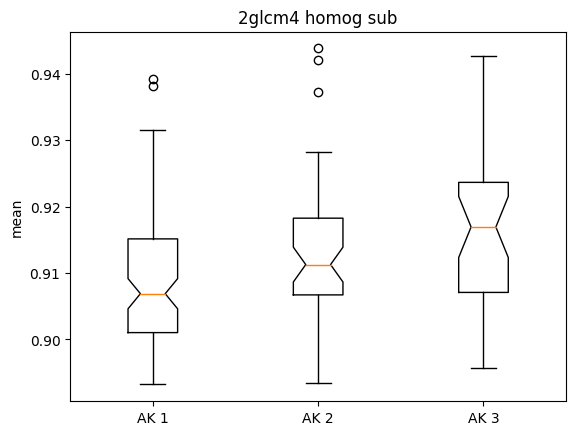

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.004     0.076    -0.009     0.000
 (0 - 2)     -0.008     0.002    -0.013    -0.002
 (1 - 0)      0.004     0.076    -0.000     0.009
 (1 - 2)     -0.004     0.332    -0.009     0.002
 (2 - 0)      0.008     0.002     0.002     0.013
 (2 - 1)      0.004     0.332    -0.002     0.009

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9446980953216553, pvalue=0.0005475611542351544)
ShapiroResult(statistic=0.9547109603881836, pvalue=0.061742544174194336)
ShapiroResult(statistic=0.8654643297195435, pvalue=0.0009141261107288301)
One-Way ANOVA: There is a significant difference between groups (p = 0.0144).


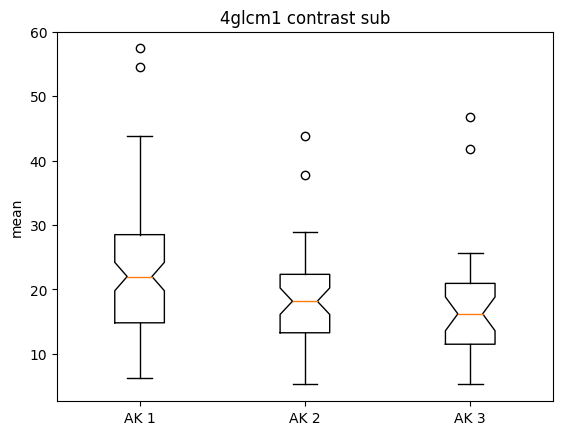

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      3.398     0.091    -0.412     7.209
 (0 - 2)      4.807     0.028     0.408     9.205
 (1 - 0)     -3.398     0.091    -7.209     0.412
 (1 - 2)      1.408     0.777    -3.503     6.319
 (2 - 0)     -4.807     0.028    -9.205    -0.408
 (2 - 1)     -1.408     0.777    -6.319     3.503

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9239552021026611, pvalue=3.601568459998816e-05)
ShapiroResult(statistic=0.977642834186554, pvalue=0.4846549928188324)
ShapiroResult(statistic=0.8452276587486267, pvalue=0.00032756346627138555)
One-Way ANOVA: There is a significant difference between groups (p = 0.0151).


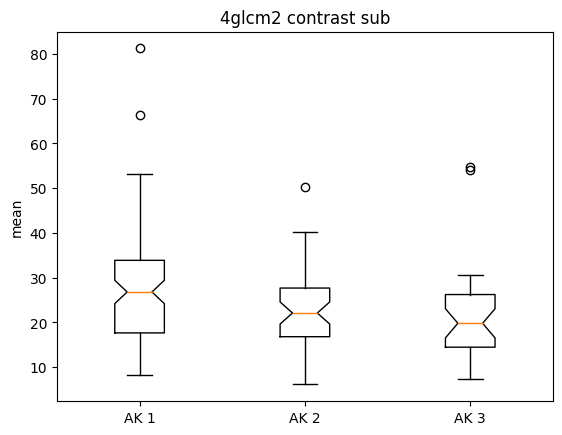

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      4.265     0.084    -0.432     8.962
 (0 - 2)      5.808     0.033     0.387    11.229
 (1 - 0)     -4.265     0.084    -8.962     0.432
 (1 - 2)      1.543     0.819    -4.510     7.596
 (2 - 0)     -5.808     0.033   -11.229    -0.387
 (2 - 1)     -1.543     0.819    -7.596     4.510

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9386373162269592, pvalue=0.00023709620290901512)
ShapiroResult(statistic=0.9619613885879517, pvalue=0.1211734265089035)
ShapiroResult(statistic=0.8558962941169739, pvalue=0.0005581827135756612)
One-Way ANOVA: There is a significant difference between groups (p = 0.0054).


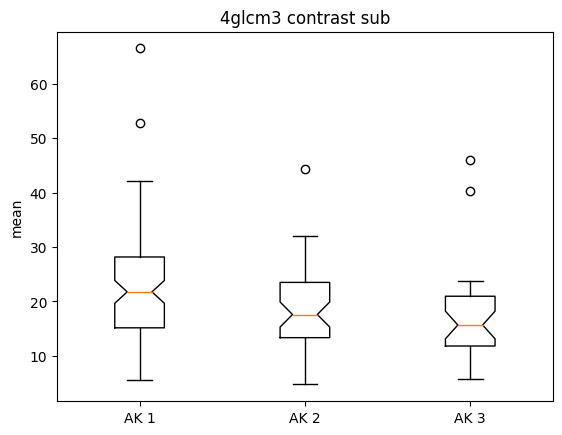

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      3.945     0.048     0.032     7.859
 (0 - 2)      5.448     0.013     0.931     9.965
 (1 - 0)     -3.945     0.048    -7.859    -0.032
 (1 - 2)      1.503     0.761    -3.541     6.546
 (2 - 0)     -5.448     0.013    -9.965    -0.931
 (2 - 1)     -1.503     0.761    -6.546     3.541

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9425418376922607, pvalue=0.00040480250027030706)
ShapiroResult(statistic=0.9453191161155701, pvalue=0.02611497975885868)
ShapiroResult(statistic=0.8589577078819275, pvalue=0.0006525620119646192)
One-Way ANOVA: There is a significant difference between groups (p = 0.0096).


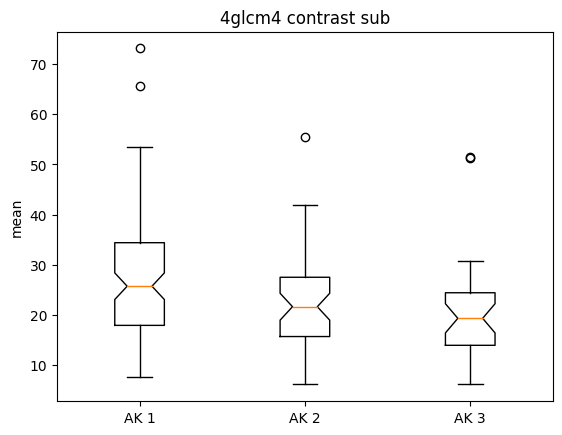

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      4.491     0.061    -0.161     9.144
 (0 - 2)      6.033     0.023     0.663    11.403
 (1 - 0)     -4.491     0.061    -9.144     0.161
 (1 - 2)      1.541     0.816    -4.455     7.537
 (2 - 0)     -6.033     0.023   -11.403    -0.663
 (2 - 1)     -1.541     0.816    -7.537     4.455

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9902836084365845, pvalue=0.7197189927101135)
ShapiroResult(statistic=0.9710686206817627, pvalue=0.2786356210708618)
ShapiroResult(statistic=0.9419993162155151, pvalue=0.08532486110925674)
One-Way ANOVA: There is a significant difference between groups (p = 0.0478).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9847472906112671, pvalue=0.33887431025505066)
ShapiroResult(statistic=0.9519617557525635, pvalue=0.04788784310221672)
ShapiroResult(statistic=0.9647114872932434, pvalue=0.3674675226211548)
One-Way ANOVA: The

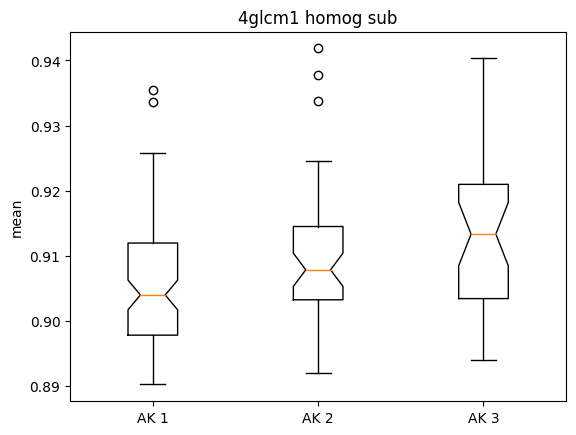

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.004     0.117    -0.008     0.001
 (0 - 2)     -0.007     0.002    -0.012    -0.002
 (1 - 0)      0.004     0.117    -0.001     0.008
 (1 - 2)     -0.004     0.265    -0.009     0.002
 (2 - 0)      0.007     0.002     0.002     0.012
 (2 - 1)      0.004     0.265    -0.002     0.009

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9412087202072144, pvalue=0.000336649565724656)
ShapiroResult(statistic=0.9124653339385986, pvalue=0.0016291147330775857)
ShapiroResult(statistic=0.954908013343811, pvalue=0.19836115837097168)
One-Way ANOVA: There is a significant difference between groups (p = 0.0026).


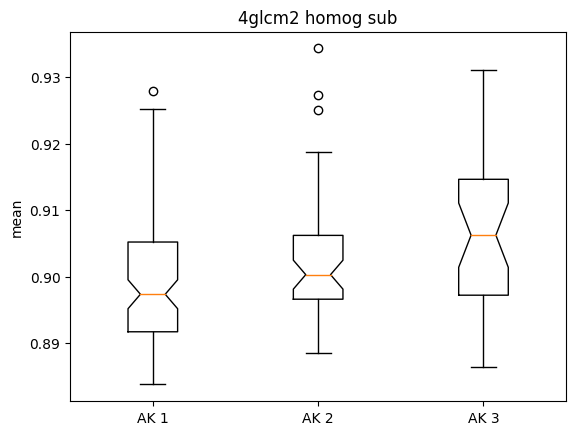

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.003     0.213    -0.007     0.001
 (0 - 2)     -0.007     0.002    -0.012    -0.002
 (1 - 0)      0.003     0.213    -0.001     0.007
 (1 - 2)     -0.004     0.185    -0.010     0.001
 (2 - 0)      0.007     0.002     0.002     0.012
 (2 - 1)      0.004     0.185    -0.001     0.010

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9370697736740112, pvalue=0.00019208529556635767)
ShapiroResult(statistic=0.9329425692558289, pvalue=0.00876695103943348)
ShapiroResult(statistic=0.9600850939750671, pvalue=0.2761516571044922)
One-Way ANOVA: There is a significant difference between groups (p = 0.0015).


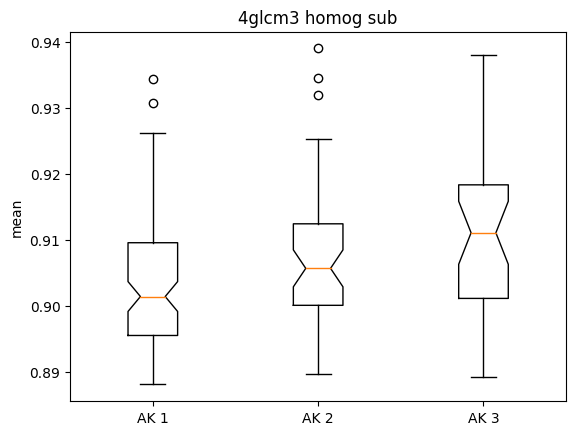

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.004     0.112    -0.008     0.001
 (0 - 2)     -0.008     0.002    -0.013    -0.003
 (1 - 0)      0.004     0.112    -0.001     0.008
 (1 - 2)     -0.004     0.254    -0.010     0.002
 (2 - 0)      0.008     0.002     0.003     0.013
 (2 - 1)      0.004     0.254    -0.002     0.010

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9330739974975586, pvalue=0.0001134976846515201)
ShapiroResult(statistic=0.9324206709861755, pvalue=0.008382728323340416)
ShapiroResult(statistic=0.9636491537094116, pvalue=0.34452709555625916)
One-Way ANOVA: There is a significant difference between groups (p = 0.0021).


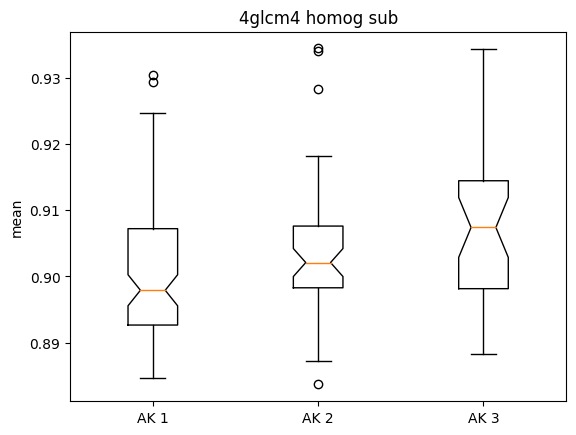

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.004     0.083    -0.009     0.000
 (0 - 2)     -0.007     0.003    -0.013    -0.002
 (1 - 0)      0.004     0.083    -0.000     0.009
 (1 - 2)     -0.003     0.370    -0.009     0.002
 (2 - 0)      0.007     0.003     0.002     0.013
 (2 - 1)      0.003     0.370    -0.002     0.009

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9418915510177612, pvalue=0.00036990331136621535)
ShapiroResult(statistic=0.9643546342849731, pvalue=0.1512964814901352)
ShapiroResult(statistic=0.8464443683624268, pvalue=0.00034778963890857995)
One-Way ANOVA: There is a significant difference between groups (p = 0.0152).


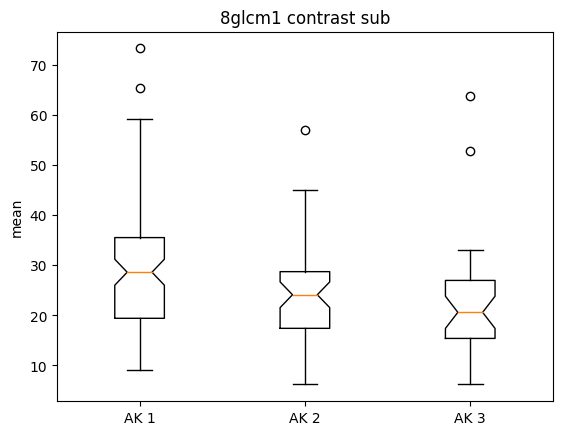

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      4.284     0.096    -0.571     9.139
 (0 - 2)      6.099     0.029     0.495    11.703
 (1 - 0)     -4.284     0.096    -9.139     0.571
 (1 - 2)      1.815     0.772    -4.442     8.073
 (2 - 0)     -6.099     0.029   -11.703    -0.495
 (2 - 1)     -1.815     0.772    -8.073     4.442

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.8929065465927124, pvalue=1.1400835546737653e-06)
ShapiroResult(statistic=0.9726478457450867, pvalue=0.3200781047344208)
ShapiroResult(statistic=0.8274248838424683, pvalue=0.00013967766426503658)
One-Way ANOVA: There is a significant difference between groups (p = 0.0121).


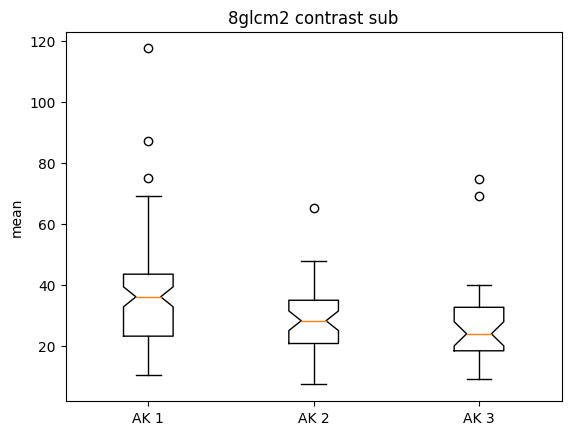

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      6.198     0.057    -0.136    12.531
 (0 - 2)      7.782     0.034     0.472    15.093
 (1 - 0)     -6.198     0.057   -12.531     0.136
 (1 - 2)      1.584     0.890    -6.578     9.747
 (2 - 0)     -7.782     0.034   -15.093    -0.472
 (2 - 1)     -1.584     0.890    -9.747     6.578

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9051676392555237, pvalue=4.138590611546533e-06)
ShapiroResult(statistic=0.9464298486709595, pvalue=0.028876185417175293)
ShapiroResult(statistic=0.8486033082008362, pvalue=0.0003870105429086834)
One-Way ANOVA: There is a significant difference between groups (p = 0.0069).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9250853657722473, pvalue=4.136483767069876e-05)
ShapiroResult(statistic=0.9110859632492065, pvalue=0.0014624334871768951)
ShapiroResult(statistic=0.8400354385375977, pvalue=0.00025428476510569453)
One

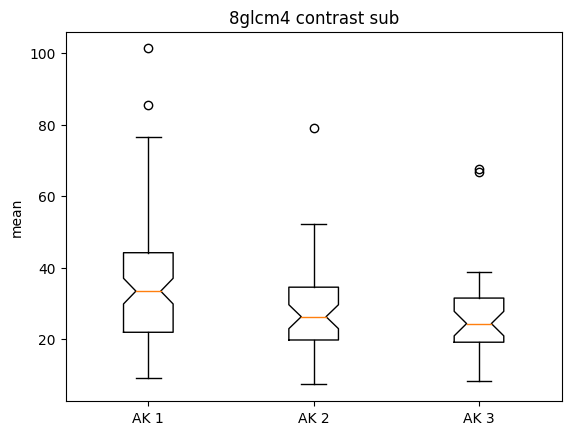

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      6.102     0.059    -0.187    12.392
 (0 - 2)      7.975     0.027     0.716    15.234
 (1 - 0)     -6.102     0.059   -12.392     0.187
 (1 - 2)      1.873     0.849    -6.233     9.978
 (2 - 0)     -7.975     0.027   -15.234    -0.716
 (2 - 1)     -1.873     0.849    -9.978     6.233

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9925440549850464, pvalue=0.8785529732704163)
ShapiroResult(statistic=0.9720596671104431, pvalue=0.30406540632247925)
ShapiroResult(statistic=0.9773077964782715, pvalue=0.718386173248291)
One-Way ANOVA: There is a significant difference between groups (p = 0.0436).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9905173182487488, pvalue=0.737569272518158)
ShapiroResult(statistic=0.959255039691925, pvalue=0.09419383853673935)
ShapiroResult(statistic=0.958246111869812, pvalue=0.24578292667865753)
One-Way ANOVA: There i

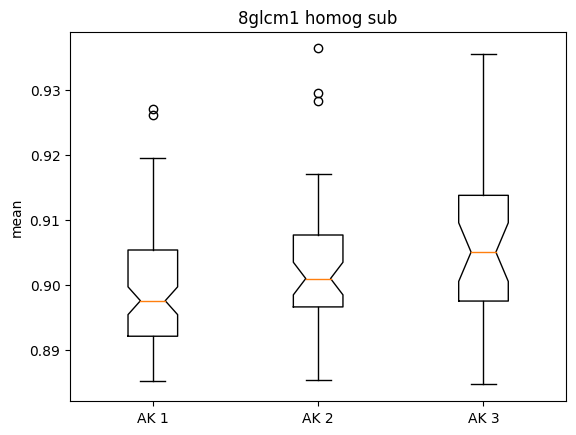

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.004     0.109    -0.008     0.001
 (0 - 2)     -0.007     0.002    -0.012    -0.002
 (1 - 0)      0.004     0.109    -0.001     0.008
 (1 - 2)     -0.003     0.309    -0.009     0.002
 (2 - 0)      0.007     0.002     0.002     0.012
 (2 - 1)      0.003     0.309    -0.002     0.009

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9557220339775085, pvalue=0.002776473294943571)
ShapiroResult(statistic=0.9129647016525269, pvalue=0.001694316859357059)
ShapiroResult(statistic=0.9683400392532349, pvalue=0.4548918902873993)
One-Way ANOVA: There is a significant difference between groups (p = 0.0064).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9407129883766174, pvalue=0.00031448708614334464)
ShapiroResult(statistic=0.9260960817337036, pvalue=0.004909419920295477)
ShapiroResult(statistic=0.9543511867523193, pvalue=0.19134019315242767)
One-Way AN

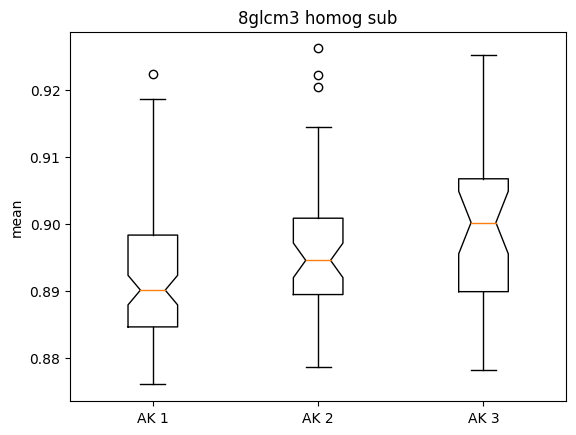

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.004     0.144    -0.008     0.001
 (0 - 2)     -0.008     0.002    -0.013    -0.002
 (1 - 0)      0.004     0.144    -0.001     0.008
 (1 - 2)     -0.004     0.221    -0.010     0.002
 (2 - 0)      0.008     0.002     0.002     0.013
 (2 - 1)      0.004     0.221    -0.002     0.010

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9429466128349304, pvalue=0.00042826321441680193)
ShapiroResult(statistic=0.9508730173110962, pvalue=0.04332267493009567)
ShapiroResult(statistic=0.958496630191803, pvalue=0.2497340887784958)
One-Way ANOVA: There is a significant difference between groups (p = 0.0052).


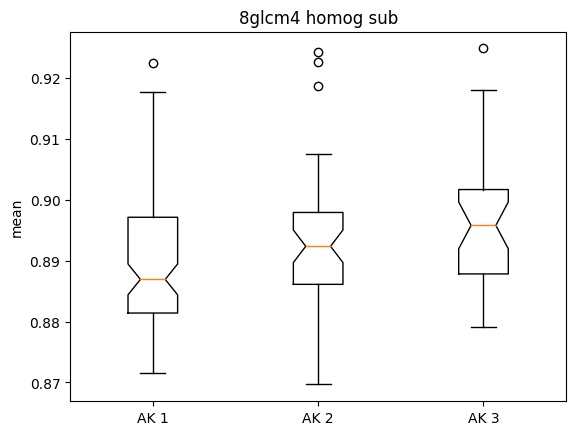

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.004     0.071    -0.009     0.000
 (0 - 2)     -0.007     0.009    -0.012    -0.001
 (1 - 0)      0.004     0.071    -0.000     0.009
 (1 - 2)     -0.002     0.615    -0.008     0.004
 (2 - 0)      0.007     0.009     0.001     0.012
 (2 - 1)      0.002     0.615    -0.004     0.008

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.938269317150116, pvalue=0.0002256157749798149)
ShapiroResult(statistic=0.9037538766860962, pvalue=0.0008329749689437449)
ShapiroResult(statistic=0.9164279699325562, pvalue=0.01665271259844303)
One-Way ANOVA: There is a significant difference between groups (p = 0.0004).


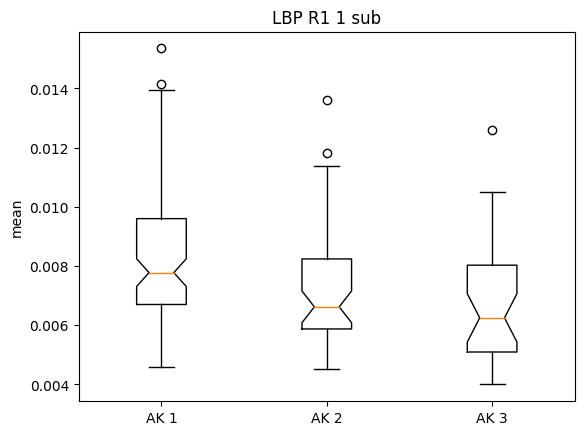

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.001     0.006     0.000     0.002
 (0 - 2)      0.002     0.002     0.000     0.003
 (1 - 0)     -0.001     0.006    -0.002    -0.000
 (1 - 2)      0.000     0.778    -0.001     0.002
 (2 - 0)     -0.002     0.002    -0.003    -0.000
 (2 - 1)     -0.000     0.778    -0.002     0.001

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9799525141716003, pvalue=0.15381324291229248)
ShapiroResult(statistic=0.9639571905136108, pvalue=0.1458314210176468)
ShapiroResult(statistic=0.9474247694015503, pvalue=0.12175927311182022)
One-Way ANOVA: There is a significant difference between groups (p = 0.0242).


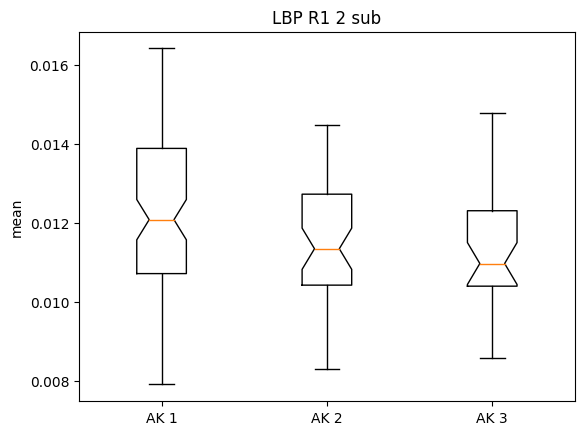

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.001     0.093    -0.000     0.001
 (0 - 2)      0.001     0.055    -0.000     0.002
 (1 - 0)     -0.001     0.093    -0.001     0.000
 (1 - 2)      0.000     0.893    -0.001     0.001
 (2 - 0)     -0.001     0.055    -0.002     0.000
 (2 - 1)     -0.000     0.893    -0.001     0.001

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9843508005142212, pvalue=0.3183523118495941)
ShapiroResult(statistic=0.9501707553863525, pvalue=0.040617529302835464)
ShapiroResult(statistic=0.979401707649231, pvalue=0.7820212841033936)
One-Way ANOVA: There is a significant difference between groups (p = 0.001).


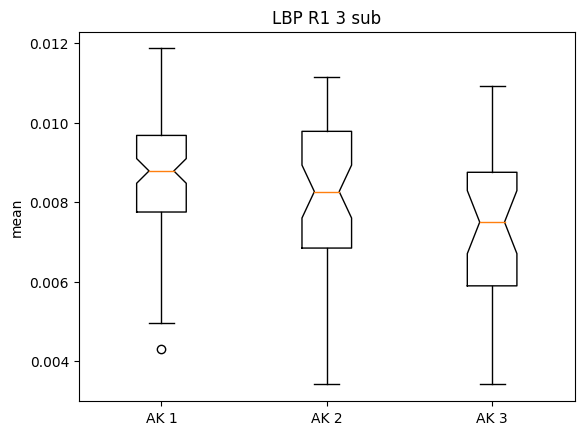

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.000     0.245    -0.000     0.001
 (0 - 2)      0.001     0.001     0.000     0.002
 (1 - 0)     -0.000     0.245    -0.001     0.000
 (1 - 2)      0.001     0.092    -0.000     0.002
 (2 - 0)     -0.001     0.001    -0.002    -0.000
 (2 - 1)     -0.001     0.092    -0.002     0.000

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9893081784248352, pvalue=0.6444512009620667)
ShapiroResult(statistic=0.9329928755760193, pvalue=0.008804962038993835)
ShapiroResult(statistic=0.9576166272163391, pvalue=0.2361062914133072)
One-Way ANOVA: There is a significant difference between groups (p = 0.0064).


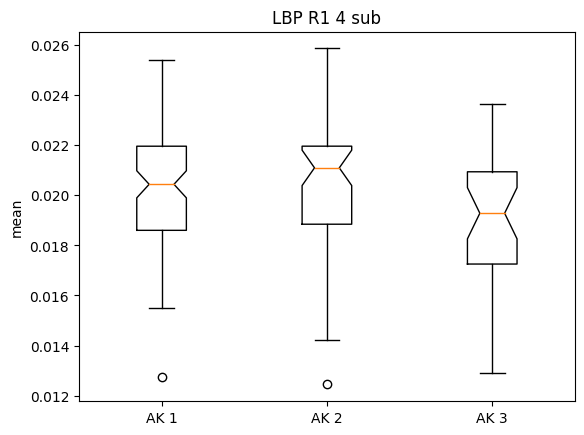

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.000     0.998    -0.001     0.001
 (0 - 2)      0.002     0.007     0.000     0.003
 (1 - 0)      0.000     0.998    -0.001     0.001
 (1 - 2)      0.002     0.016     0.000     0.003
 (2 - 0)     -0.002     0.007    -0.003    -0.000
 (2 - 1)     -0.002     0.016    -0.003    -0.000

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9520167112350464, pvalue=0.0015844879671931267)
ShapiroResult(statistic=0.9300838708877563, pvalue=0.0068672699853777885)
ShapiroResult(statistic=0.9505484700202942, pvalue=0.14938417077064514)
One-Way ANOVA: There is a significant difference between groups (p = 0.0057).


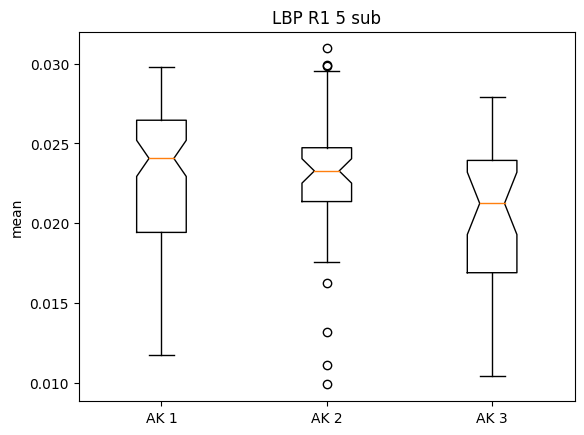

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.000     0.997    -0.002     0.002
 (0 - 2)      0.003     0.006     0.001     0.005
 (1 - 0)     -0.000     0.997    -0.002     0.002
 (1 - 2)      0.003     0.018     0.000     0.005
 (2 - 0)     -0.003     0.006    -0.005    -0.001
 (2 - 1)     -0.003     0.018    -0.005    -0.000

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9853007197380066, pvalue=0.3692716658115387)
ShapiroResult(statistic=0.9904410243034363, pvalue=0.9615684747695923)
ShapiroResult(statistic=0.9658757448196411, pvalue=0.39399591088294983)
One-Way ANOVA: There is a significant difference between groups (p = 0.0495).


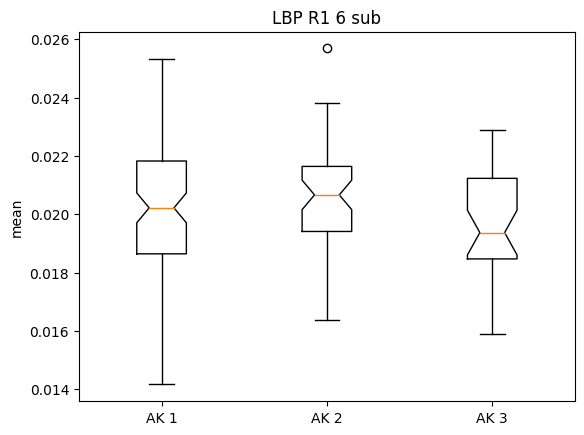

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.001     0.279    -0.001     0.000
 (0 - 2)      0.001     0.336    -0.000     0.001
 (1 - 0)      0.001     0.279    -0.000     0.001
 (1 - 2)      0.001     0.040     0.000     0.002
 (2 - 0)     -0.001     0.336    -0.001     0.000
 (2 - 1)     -0.001     0.040    -0.002    -0.000

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9623820185661316, pvalue=0.007922097109258175)
ShapiroResult(statistic=0.9239541888237, pvalue=0.004109649918973446)
ShapiroResult(statistic=0.9463050365447998, pvalue=0.11314218491315842)
One-Way ANOVA: There is a significant difference between groups (p = 0.0102).


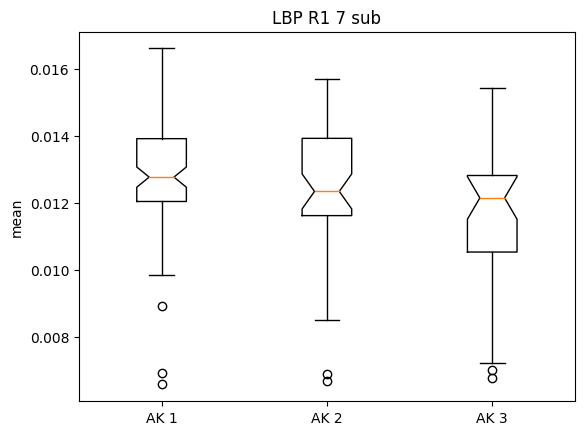

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.000     0.845    -0.001     0.001
 (0 - 2)      0.001     0.007     0.000     0.002
 (1 - 0)     -0.000     0.845    -0.001     0.001
 (1 - 2)      0.001     0.058    -0.000     0.002
 (2 - 0)     -0.001     0.007    -0.002    -0.000
 (2 - 1)     -0.001     0.058    -0.002     0.000

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9684784412384033, pvalue=0.021621260792016983)
ShapiroResult(statistic=0.9705566763877869, pvalue=0.2662433087825775)
ShapiroResult(statistic=0.9680323600769043, pvalue=0.44694188237190247)
One-Way ANOVA: There is a significant difference between groups (p = 0.043).


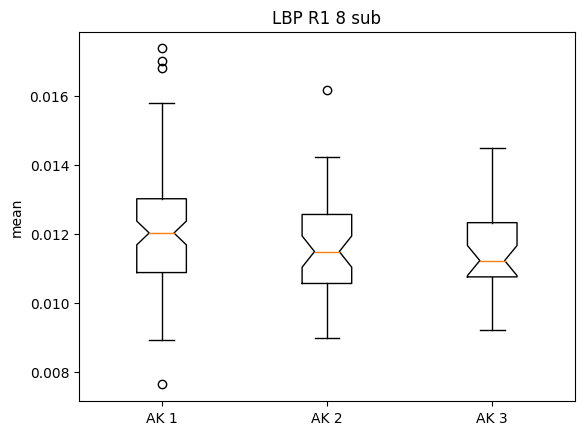

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.001     0.149    -0.000     0.001
 (0 - 2)      0.001     0.079    -0.000     0.002
 (1 - 0)     -0.001     0.149    -0.001     0.000
 (1 - 2)      0.000     0.875    -0.001     0.001
 (2 - 0)     -0.001     0.079    -0.002     0.000
 (2 - 1)     -0.000     0.875    -0.001     0.001

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9908030033111572, pvalue=0.7591392993927002)
ShapiroResult(statistic=0.9797422885894775, pvalue=0.5680138468742371)
ShapiroResult(statistic=0.9760806560516357, pvalue=0.6803653836250305)
One-Way ANOVA: There is a significant difference between groups (p = 0.0018).


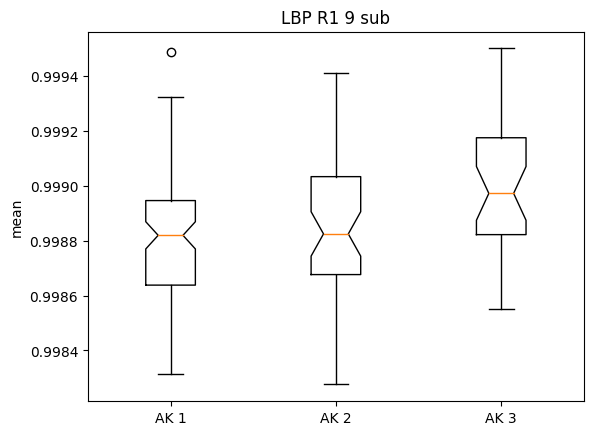

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.000     0.581    -0.000     0.000
 (0 - 2)     -0.000     0.001    -0.000    -0.000
 (1 - 0)      0.000     0.581    -0.000     0.000
 (1 - 2)     -0.000     0.038    -0.000    -0.000
 (2 - 0)      0.000     0.001     0.000     0.000
 (2 - 1)      0.000     0.038     0.000     0.000

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9782761931419373, pvalue=0.11548545956611633)
ShapiroResult(statistic=0.9854738712310791, pvalue=0.8102720379829407)
ShapiroResult(statistic=0.9609305262565613, pvalue=0.2912049889564514)
One-Way ANOVA: There is a significant difference between groups (p = 0.0473).


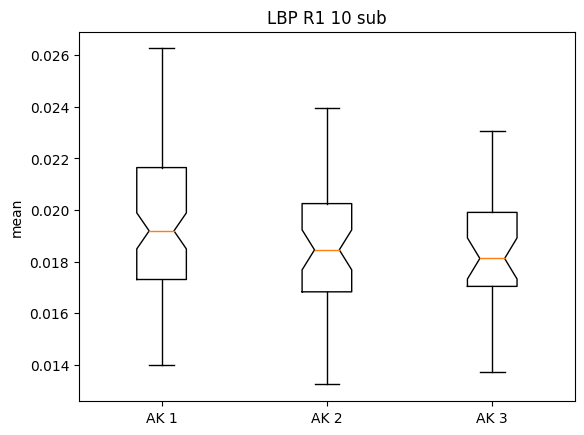

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.001     0.089    -0.000     0.002
 (0 - 2)      0.001     0.151    -0.000     0.002
 (1 - 0)     -0.001     0.089    -0.002     0.000
 (1 - 2)      0.000     1.000    -0.001     0.001
 (2 - 0)     -0.001     0.151    -0.002     0.000
 (2 - 1)     -0.000     1.000    -0.001     0.001

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9768193364143372, pvalue=0.0898871198296547)
ShapiroResult(statistic=0.9482296705245972, pvalue=0.03401055186986923)
ShapiroResult(statistic=0.9320528507232666, pvalue=0.04468822479248047)
One-Way ANOVA: There is a significant difference between groups (p = 0.0009).


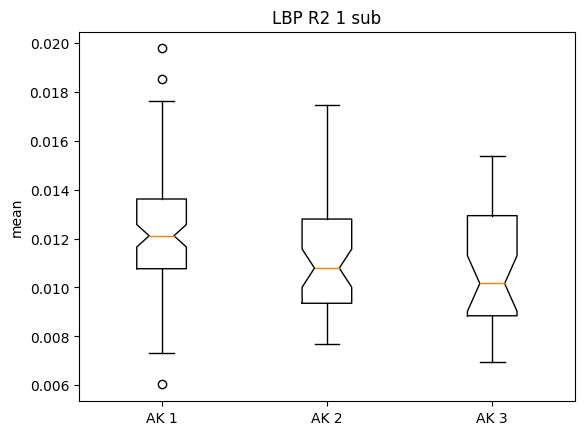

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.001     0.018     0.000     0.002
 (0 - 2)      0.002     0.003     0.000     0.003
 (1 - 0)     -0.001     0.018    -0.002    -0.000
 (1 - 2)      0.000     0.678    -0.001     0.002
 (2 - 0)     -0.002     0.003    -0.003    -0.000
 (2 - 1)     -0.000     0.678    -0.002     0.001

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9910790920257568, pvalue=0.7796362638473511)
ShapiroResult(statistic=0.978175938129425, pvalue=0.5051342844963074)
ShapiroResult(statistic=0.9660747051239014, pvalue=0.3986741006374359)
One-Way ANOVA: There is a significant difference between groups (p = 0.0014).


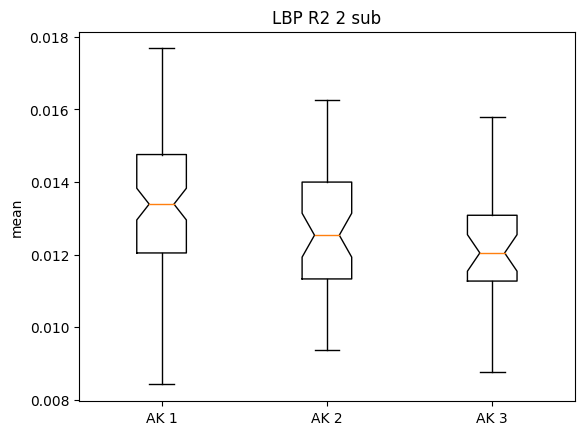

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.001     0.030     0.000     0.002
 (0 - 2)      0.001     0.003     0.000     0.002
 (1 - 0)     -0.001     0.030    -0.002    -0.000
 (1 - 2)      0.000     0.598    -0.001     0.001
 (2 - 0)     -0.001     0.003    -0.002    -0.000
 (2 - 1)     -0.000     0.598    -0.001     0.001

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9800928235054016, pvalue=0.15752455592155457)
ShapiroResult(statistic=0.9530000686645508, pvalue=0.0527024008333683)
ShapiroResult(statistic=0.961247444152832, pvalue=0.29703089594841003)
One-Way ANOVA: There is a significant difference between groups (p = 0.0026).


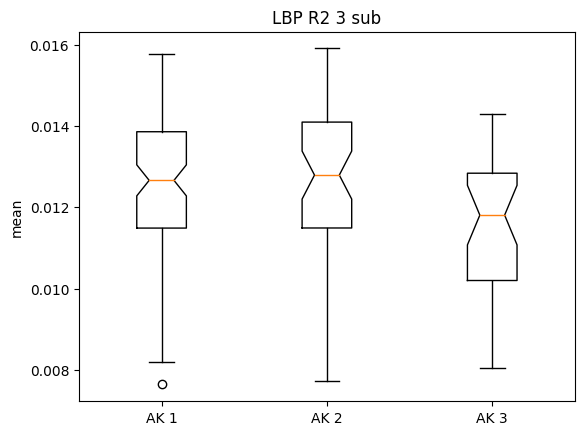

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.000     0.994    -0.001     0.001
 (0 - 2)      0.001     0.003     0.000     0.002
 (1 - 0)      0.000     0.994    -0.001     0.001
 (1 - 2)      0.001     0.007     0.000     0.002
 (2 - 0)     -0.001     0.003    -0.002    -0.000
 (2 - 1)     -0.001     0.007    -0.002    -0.000

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9825936555862427, pvalue=0.23956085741519928)
ShapiroResult(statistic=0.9472640156745911, pvalue=0.031147915869951248)
ShapiroResult(statistic=0.9407002925872803, pvalue=0.07837291806936264)
One-Way ANOVA: There is a significant difference between groups (p = 0.0042).


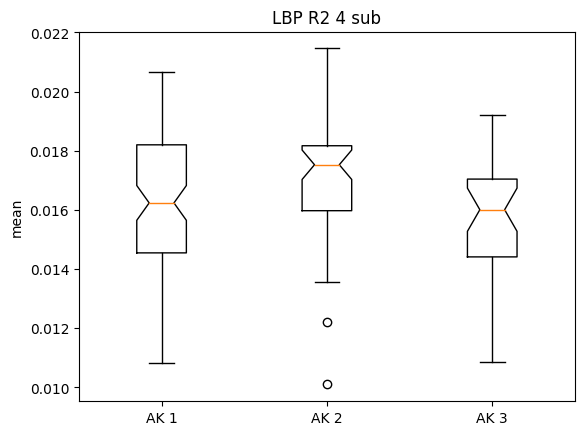

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.001     0.097    -0.002     0.000
 (0 - 2)      0.001     0.134    -0.000     0.002
 (1 - 0)      0.001     0.097    -0.000     0.002
 (1 - 2)      0.002     0.003     0.000     0.003
 (2 - 0)     -0.001     0.134    -0.002     0.000
 (2 - 1)     -0.002     0.003    -0.003    -0.000

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9774159789085388, pvalue=0.09961116313934326)
ShapiroResult(statistic=0.9208705425262451, pvalue=0.0031908892560750246)
ShapiroResult(statistic=0.9778741002082825, pvalue=0.7358233332633972)
One-Way ANOVA: There is a significant difference between groups (p = 0.0092).


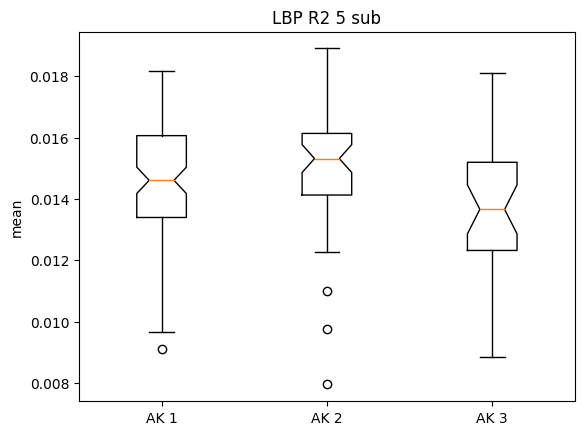

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.000     0.392    -0.001     0.000
 (0 - 2)      0.001     0.056    -0.000     0.002
 (1 - 0)      0.000     0.392    -0.000     0.001
 (1 - 2)      0.001     0.007     0.000     0.003
 (2 - 0)     -0.001     0.056    -0.002     0.000
 (2 - 1)     -0.001     0.007    -0.003    -0.000

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9843891263008118, pvalue=0.3202921152114868)
ShapiroResult(statistic=0.9370240569114685, pvalue=0.01248979289084673)
ShapiroResult(statistic=0.9701769948005676, pvalue=0.5042983889579773)
One-Way ANOVA: There is a significant difference between groups (p = 0.0108).


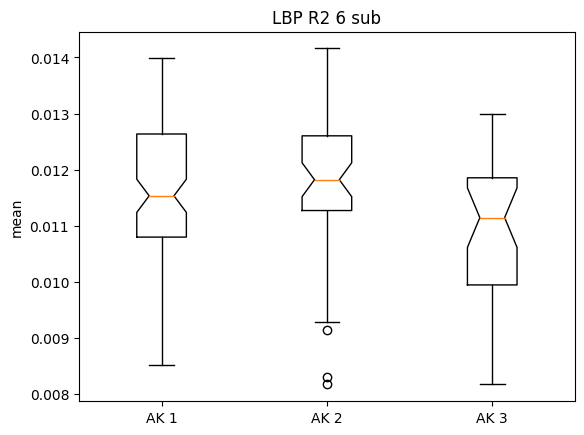

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.000     0.882    -0.001     0.000
 (0 - 2)      0.001     0.018     0.000     0.001
 (1 - 0)      0.000     0.882    -0.000     0.001
 (1 - 2)      0.001     0.014     0.000     0.001
 (2 - 0)     -0.001     0.018    -0.001    -0.000
 (2 - 1)     -0.001     0.014    -0.001    -0.000

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9746925830841064, pvalue=0.062314681708812714)
ShapiroResult(statistic=0.9289795756340027, pvalue=0.006254103500396013)
ShapiroResult(statistic=0.9548155665397644, pvalue=0.19717887043952942)
One-Way ANOVA: There is a significant difference between groups (p = 0.0012).


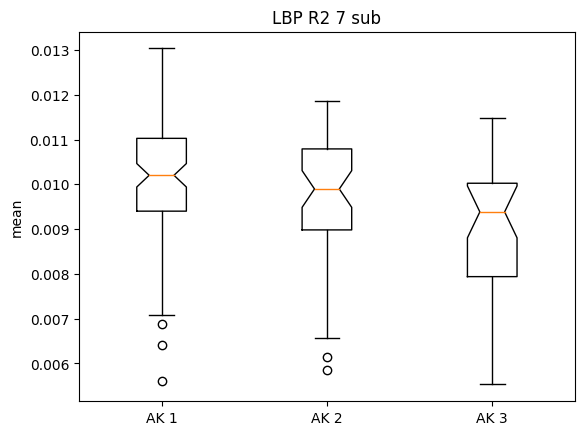

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.000     0.298    -0.000     0.001
 (0 - 2)      0.001     0.001     0.000     0.002
 (1 - 0)     -0.000     0.298    -0.001     0.000
 (1 - 2)      0.001     0.077    -0.000     0.002
 (2 - 0)     -0.001     0.001    -0.002    -0.000
 (2 - 1)     -0.001     0.077    -0.002     0.000

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9808645844459534, pvalue=0.17951487004756927)
ShapiroResult(statistic=0.8349549174308777, pvalue=8.874135346559342e-06)
ShapiroResult(statistic=0.8960512280464172, pvalue=0.004920896142721176)
One-Way ANOVA: No significant difference between groups (p = 0.9574).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.988404393196106, pvalue=0.575687050819397)
ShapiroResult(statistic=0.9772558808326721, pvalue=0.4701147973537445)
ShapiroResult(statistic=0.975549578666687, pvalue=0.6639004945755005)
One-Way ANOVA: There is a 

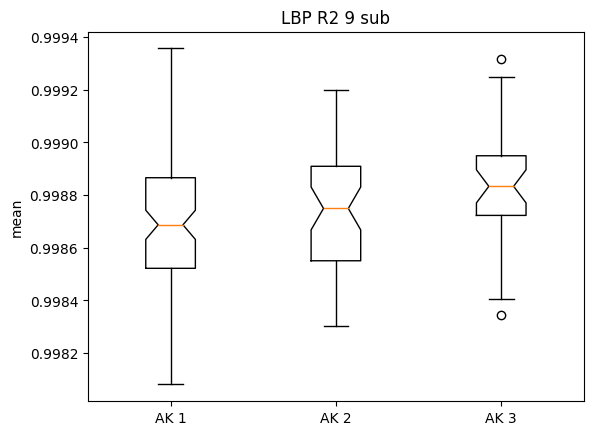

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.000     0.368    -0.000     0.000
 (0 - 2)     -0.000     0.007    -0.000    -0.000
 (1 - 0)      0.000     0.368    -0.000     0.000
 (1 - 2)     -0.000     0.207    -0.000     0.000
 (2 - 0)      0.000     0.007     0.000     0.000
 (2 - 1)      0.000     0.207    -0.000     0.000

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9840520620346069, pvalue=0.30357617139816284)
ShapiroResult(statistic=0.9760564565658569, pvalue=0.4268823564052582)
ShapiroResult(statistic=0.9715985655784607, pvalue=0.5446544885635376)
One-Way ANOVA: No significant difference between groups (p = 0.0584).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9677786827087402, pvalue=0.019229479134082794)
ShapiroResult(statistic=0.9733646512031555, pvalue=0.34054282307624817)
ShapiroResult(statistic=0.963990330696106, pvalue=0.35176339745521545)
One-Way ANOVA: There is a

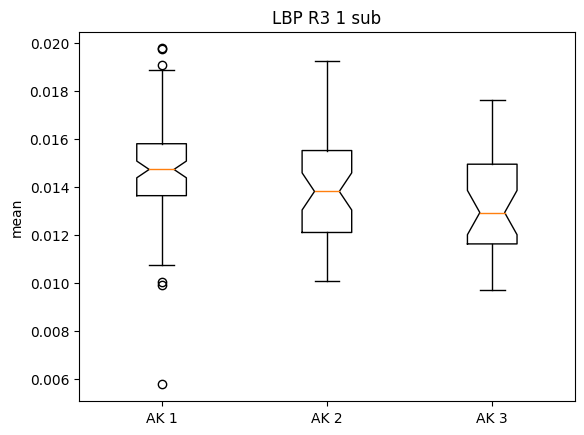

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.001     0.231    -0.000     0.002
 (0 - 2)      0.001     0.006     0.000     0.002
 (1 - 0)     -0.001     0.231    -0.002     0.000
 (1 - 2)      0.001     0.289    -0.000     0.002
 (2 - 0)     -0.001     0.006    -0.002    -0.000
 (2 - 1)     -0.001     0.289    -0.002     0.000

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9845922589302063, pvalue=0.33072569966316223)
ShapiroResult(statistic=0.9533012509346008, pvalue=0.054189443588256836)
ShapiroResult(statistic=0.9790340065956116, pvalue=0.7710503339767456)
One-Way ANOVA: There is a significant difference between groups (p = 0.0004).


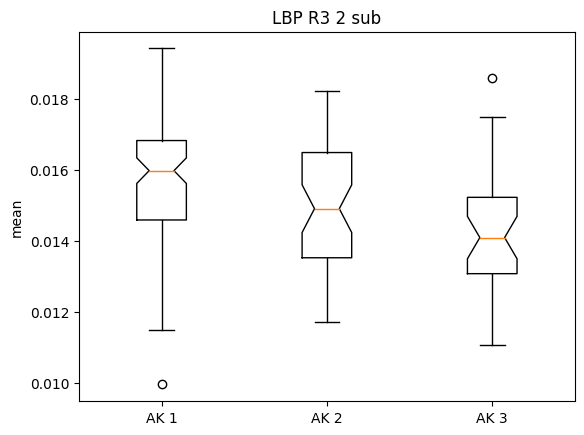

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.001     0.045     0.000     0.002
 (0 - 2)      0.001     0.001     0.001     0.002
 (1 - 0)     -0.001     0.045    -0.002    -0.000
 (1 - 2)      0.001     0.265    -0.000     0.002
 (2 - 0)     -0.001     0.001    -0.002    -0.001
 (2 - 1)     -0.001     0.265    -0.002     0.000

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9795758128166199, pvalue=0.14425425231456757)
ShapiroResult(statistic=0.9591122269630432, pvalue=0.09294961392879486)
ShapiroResult(statistic=0.965093731880188, pvalue=0.37601807713508606)
One-Way ANOVA: There is a significant difference between groups (p = 0.0045).


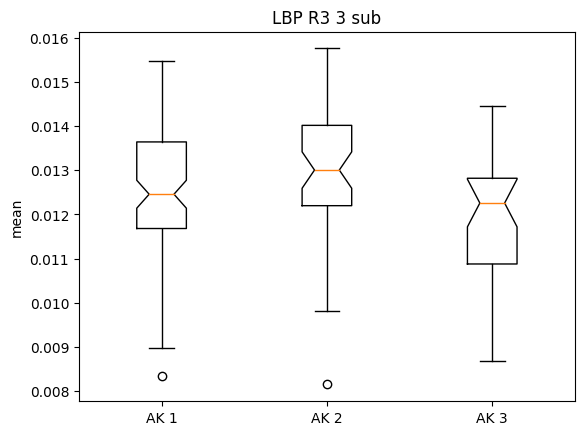

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.000     0.428    -0.001     0.000
 (0 - 2)      0.001     0.027     0.000     0.001
 (1 - 0)      0.000     0.428    -0.000     0.001
 (1 - 2)      0.001     0.003     0.000     0.002
 (2 - 0)     -0.001     0.027    -0.001    -0.000
 (2 - 1)     -0.001     0.003    -0.002    -0.000

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9929792284965515, pvalue=0.9033406376838684)
ShapiroResult(statistic=0.9746624231338501, pvalue=0.38029271364212036)
ShapiroResult(statistic=0.9692513942718506, pvalue=0.47899505496025085)
One-Way ANOVA: No significant difference between groups (p = 0.0685).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9848194718360901, pvalue=0.3427210748195648)
ShapiroResult(statistic=0.9413001537322998, pvalue=0.018213851377367973)
ShapiroResult(statistic=0.9886905550956726, pvalue=0.9785016775131226)
One-Way ANOVA: There is a

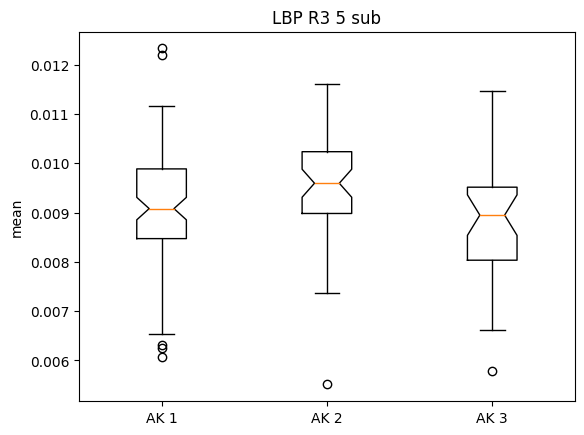

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.000     0.167    -0.001     0.000
 (0 - 2)      0.000     0.302    -0.000     0.001
 (1 - 0)      0.000     0.167    -0.000     0.001
 (1 - 2)      0.001     0.019     0.000     0.001
 (2 - 0)     -0.000     0.302    -0.001     0.000
 (2 - 1)     -0.001     0.019    -0.001    -0.000

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.99383944272995, pvalue=0.9440776109695435)
ShapiroResult(statistic=0.9737985730171204, pvalue=0.3534449636936188)
ShapiroResult(statistic=0.9711205959320068, pvalue=0.5308945178985596)
One-Way ANOVA: No significant difference between groups (p = 0.2084).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.988882839679718, pvalue=0.6118273138999939)
ShapiroResult(statistic=0.9219104647636414, pvalue=0.0034737770911306143)
ShapiroResult(statistic=0.9726669192314148, pvalue=0.5760358572006226)
One-Way ANOVA: There is a sig

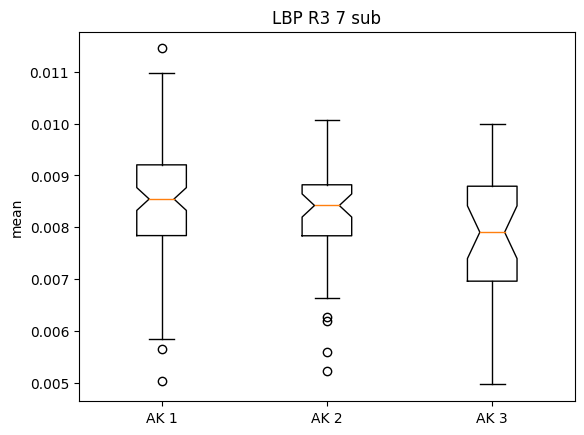

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.000     0.261    -0.000     0.001
 (0 - 2)      0.001     0.007     0.000     0.001
 (1 - 0)     -0.000     0.261    -0.001     0.000
 (1 - 2)      0.000     0.287    -0.000     0.001
 (2 - 0)     -0.001     0.007    -0.001    -0.000
 (2 - 1)     -0.000     0.287    -0.001     0.000

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9871960282325745, pvalue=0.48866477608680725)
ShapiroResult(statistic=0.8040761947631836, pvalue=1.609213882147742e-06)
ShapiroResult(statistic=0.8811925053596497, pvalue=0.0021268785931169987)
One-Way ANOVA: No significant difference between groups (p = 0.8614).
Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9869813919067383, pvalue=0.47401121258735657)
ShapiroResult(statistic=0.971601665019989, pvalue=0.2920742332935333)
ShapiroResult(statistic=0.9747907519340515, pvalue=0.6404587626457214)
One-Way ANOVA: There i

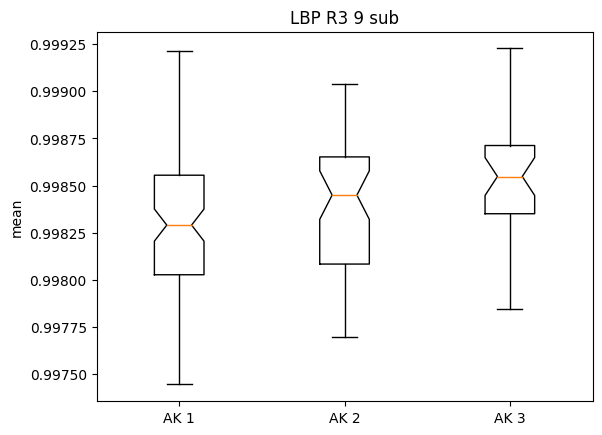

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.000     0.156    -0.000     0.000
 (0 - 2)     -0.000     0.002    -0.000    -0.000
 (1 - 0)      0.000     0.156    -0.000     0.000
 (1 - 2)     -0.000     0.241    -0.000     0.000
 (2 - 0)      0.000     0.002     0.000     0.000
 (2 - 1)      0.000     0.241    -0.000     0.000

Shapiro-Wilk Test p-values:
ShapiroResult(statistic=0.9865525960922241, pvalue=0.4455646574497223)
ShapiroResult(statistic=0.9761162996292114, pvalue=0.4289723336696625)
ShapiroResult(statistic=0.9679226875305176, pvalue=0.44413188099861145)
One-Way ANOVA: There is a significant difference between groups (p = 0.002).


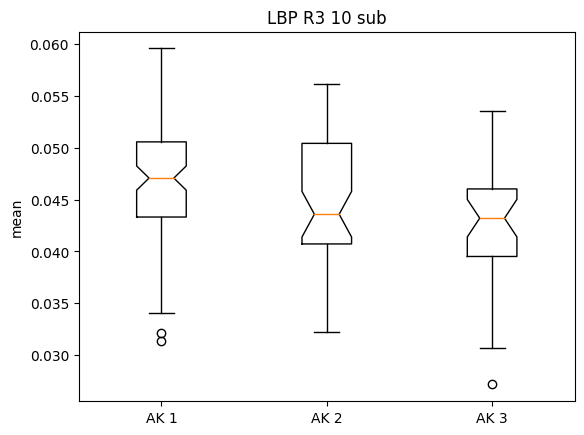

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.002     0.068    -0.000     0.005
 (0 - 2)      0.004     0.003     0.001     0.007
 (1 - 0)     -0.002     0.068    -0.005     0.000
 (1 - 2)      0.002     0.428    -0.002     0.005
 (2 - 0)     -0.004     0.003    -0.007    -0.001
 (2 - 1)     -0.002     0.428    -0.005     0.002



In [67]:

# Analiza dla każdej cechy
for i in range(0,k):
    ft_name = column_names[i]
    Group1, Group2, Group3 = ak1[:,i], ak2[:,i], ak3[:,i]
    wyniki_nom[i,0:3] = normality(Group1, Group2, Group3)
    # analiza wariacji
    wyniki_nom[i,3] = varin(Group1, Group2, Group3).pvalue

    p_anova = get_anova(Group1, Group2, Group3)
    wyniki_nom[i,4] = p_anova

    # Jeśli istnieje istotna różnica, generuj wykres pudełkowy i przeprowadź test Tukeya HSD
    if p_anova < 0.05 and wyniki_nom[i,3] >=0.05: #and all(wyniki_nom[i,0:4]>=0.05):
        fig, ax = plt.subplots(1, 1)
        ax.boxplot([Group1, Group2, Group3], 1)
        ax.set_xticklabels(["AK 1", "AK 2", "AK 3"])
        ax.set_ylabel("mean")
        ax.set_title(ft_name)
        plt.savefig(path_to_save_results+ft_name+"_tukey_results.png")
        plt.show()
        p_tukey = get_tukey(Group1, Group2, Group3)
        roznice_grupy[cnt,0] = p_tukey[0,1] # grupa 1 vs 2
        roznice_grupy[cnt,1] = p_tukey[0,2] # grupa 1 vs 3
        roznice_grupy[cnt,2] = p_tukey[1,2] # grupa 2 vs 3
        wyniki_nom2[cnt,:] = wyniki_nom[i,:]

        # zapis do datafame
        data_tmp.append({'variable_name': ft_name,
                    'norm1': wyniki_nom[i,0],
                    'norm2': wyniki_nom[i,1],
                    'norm3': wyniki_nom[i,2],
                    'vargrup':  wyniki_nom[i,3],
                    'anova_p': wyniki_nom[i,4],
                    'tuk12': roznice_grupy[cnt,0],
                    'tuk13': roznice_grupy[cnt,1],
                    'tuk23': roznice_grupy[cnt,2]})
        cnt=cnt+1
    else:
      # usuń kolumnę z kopii:
        CECHY_nowe = CECHY_nowe.drop(columns=[ft_name], axis=1)

# Zapis wyników do plików CSV
df = pd.DataFrame(wyniki_nom2)
df.to_csv(path_to_save_results+'results.csv', index=False)
df = pd.DataFrame(roznice_grupy)
df.to_csv(path_to_save_results+'roznice_grupy.csv', index=False)
df = pd.DataFrame(CECHY_nowe)
df.to_csv(path_to_save_results + 'CECHY_ANOVA_VAR.csv', index=False)
results_df = pd.DataFrame(data_tmp)
results_df.to_csv(path_to_save_results + 'RESULTS_ANOVA_TUKEY.csv', index=False)


In [68]:
results_df

variable_name         norm1     norm2     norm3   vargrup  \
0    perimeter to area epi  1.447700e-01  0.116496  0.611521  0.809755   
1            max depth epi  6.393087e-09  0.000006  0.002628  0.464634   
2         median depth epi  5.807404e-05  0.072147  0.240772  0.077816   
3           mean depth epi  3.489252e-03  0.296362  0.873259  0.112980   
4             q1 depth epi  1.291531e-05  0.052440  0.274829  0.105503   
..                     ...           ...       ...       ...       ...   
137           LBP R3 3 sub  1.442543e-01  0.092950  0.376018  0.584629   
138           LBP R3 5 sub  3.427211e-01  0.018214  0.978502  0.582126   
139           LBP R3 7 sub  6.118273e-01  0.003474  0.576036  0.139358   
140           LBP R3 9 sub  4.740112e-01  0.292074  0.640459  0.707707   
141          LBP R3 10 sub  4.455647e-01  0.428972  0.444132  0.733030   

      anova_p     tuk12     tuk13     tuk23  
0    0.001145  0.495786  0.000694  0.037001  
1    0.047690  0.964705  0.041037  0.117753  
2    0.000078  0.748547  0.000049  0.002350  
3    0.000056  0.816154  0.000038  0.001422  
4    0.000349  0.790355  0.000230  0.006028  
..        ...       ...       ...       ...  
137  0.004499  0.427870  0.027058  0.003380  
138  0.022960  0.167127  0.302029  0.018691  
139  0.008455  0.261306  0.007424  0.287025  
140  0.002459  0.155521  0.002316  0.241387  
141  0.002042  0.067761  0.003045  0.428334  

[142 rows x 9 columns]

from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['norm1'].plot(kind='hist', bins=20, title='norm1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['norm2'].plot(kind='hist', bins=20, title='norm2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['norm3'].plot(kind='hist', bins=20, title='norm3')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='norm1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='norm1', y='norm2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='norm2', y='norm3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='norm3', y='vargrup', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['norm1']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('norm1')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['norm2']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('norm2')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['norm3']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('norm3')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['vargrup']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('vargrup')

from matplotlib import pyplot as plt
_df_12['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['norm1'].plot(kind='line', figsize=(8, 4), title='norm1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['norm2'].plot(kind='line', figsize=(8, 4), title='norm2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['norm3'].plot(kind='line', figsize=(8, 4), title='norm3')
plt.gca().spines[['top', 'right']].set_visible(False)